# Sara Amjad 212071

In [ ]:
import requests
import re
import pandas as pd
from bs4 import BeautifulSoup
import math
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize']=(20,20)

In [2]:
r = requests.get('https://data.worldobesity.org/tables/prevalence-of-adult-overweight-obesity-2/')
# request to get the website content

In [3]:
print(r)
# print the request response

<Response [200]>


In [4]:
print(r.content)
#print the page content 

b'<!DOCTYPE html>\n<html lang="en">\n<head>\n<title>Data tables | World Obesity Federation Global Obesity Observatory</title>\n<meta http-equiv="Content-Type" content="text/html; charset=utf-8" />\n<meta name="viewport" content="width=device-width, initial-scale=1.0, maximum-scale=1.0, user-scalable=0" />\n<base href="https://data.worldobesity.org/"/>\n<link href="https://fonts.googleapis.com/css2?family=Nunito+Sans:ital,wght@0,400;0,600;0,700;1,400;1,600&amp;display=swap" rel="stylesheet"/>\n<link rel="stylesheet" type="text/css" href="templates/wod.max.css?1010" media="all"/>\n<script async src="scripting/plotly-latest.min.js?0608"></script>\n<link rel="image_src" href="https://data.worldobesity.org/gfx/world-obesity.svg"/>\n\n<meta property="og:site_name" content="World Obesity Federation Global Obesity Observatory"/><meta property="og:title" content="Data tables"/><meta property="og:image" content="https://data.worldobesity.org/gfx/world-obesity.svg"/>\n<script async src="https://w

In [5]:
page = r.text
#assign the text of the page to the variable 'page' .

In [6]:
soup = BeautifulSoup(page, 'html.parser')
#assign the Page to the library BeautifulSoup in order to access,extract and edit the page content

In [7]:
page
#print 'page'

'<!DOCTYPE html>\n<html lang="en">\n<head>\n<title>Data tables | World Obesity Federation Global Obesity Observatory</title>\n<meta http-equiv="Content-Type" content="text/html; charset=utf-8" />\n<meta name="viewport" content="width=device-width, initial-scale=1.0, maximum-scale=1.0, user-scalable=0" />\n<base href="https://data.worldobesity.org/"/>\n<link href="https://fonts.googleapis.com/css2?family=Nunito+Sans:ital,wght@0,400;0,600;0,700;1,400;1,600&amp;display=swap" rel="stylesheet"/>\n<link rel="stylesheet" type="text/css" href="templates/wod.max.css?1010" media="all"/>\n<script async src="scripting/plotly-latest.min.js?0608"></script>\n<link rel="image_src" href="https://data.worldobesity.org/gfx/world-obesity.svg"/>\n\n<meta property="og:site_name" content="World Obesity Federation Global Obesity Observatory"/><meta property="og:title" content="Data tables"/><meta property="og:image" content="https://data.worldobesity.org/gfx/world-obesity.svg"/>\n<script async src="https://ww

In [8]:
len(soup.find('table'))
# find the table in the page html through looking for the word table using soup.find('table')

2

In [9]:
# I found that the required table has this class name
class_='results'
table = soup.find('table',attrs={'class':class_})
table

<table class="results" id="results"><thead><tr><th class="sorttable_sorted">Country</th><th class="">Year</th><th class="">Area</th><th class="">Age</th><th class="">Males<br/>Overweight<br/>(BMI 25-29.9kg/m²)</th><th class="">Males<br/>Obesity<br/>(BMI ≥30kg/m²)</th><th class="">Females<br/>Overweight<br/>(BMI 25-29.9kg/m²)</th><th class="">Females<br/>Obesity<br/>(BMI ≥30kg/m²)</th><th class="">All adults<br/>Overweight<br/>(BMI 25-29.9kg/m²)</th><th class="">All adults<br/>Obesity<br/>(BMI ≥30kg/m²)</th></tr></thead><tbody><tr><td><span class="flag" style="background-image:url('gfx/flags-iso/AF.svg');"></span>Afghanistan</td><td>2018</td><td>National</td><td class="agebox">18-69</td><td>25.90</td><td>11.90</td><td>25.60</td><td>23.50</td><td>25.80</td><td>17.00</td><tr><td><span class="flag" style="background-image:url('gfx/flags-iso/AL.svg');"></span>Albania</td><td>2017-2018</td><td>National</td><td class="agebox">15-59</td><td>41.70</td><td>18.10</td><td>30.80</td><td>24.40</td><

In [10]:
#printing out the table type
type(table)

bs4.element.Tag

In [11]:
# Printing the table headers to convert the table to pandas dataframe
table.find_all('th')

[<th class="sorttable_sorted">Country</th>,
 <th class="">Year</th>,
 <th class="">Area</th>,
 <th class="">Age</th>,
 <th class="">Males<br/>Overweight<br/>(BMI 25-29.9kg/m²)</th>,
 <th class="">Males<br/>Obesity<br/>(BMI ≥30kg/m²)</th>,
 <th class="">Females<br/>Overweight<br/>(BMI 25-29.9kg/m²)</th>,
 <th class="">Females<br/>Obesity<br/>(BMI ≥30kg/m²)</th>,
 <th class="">All adults<br/>Overweight<br/>(BMI 25-29.9kg/m²)</th>,
 <th class="">All adults<br/>Obesity<br/>(BMI ≥30kg/m²)</th>]

In [12]:
# Seperate the data into lists
country = []
year = []
area = []
age = []
malesObes = []
malesOver = []
femaleObe = []
femaleOver = []
adultsOver = []
adultsObes = []

rows = table.find_all('tr')
rows[:10]



[<tr><th class="sorttable_sorted">Country</th><th class="">Year</th><th class="">Area</th><th class="">Age</th><th class="">Males<br/>Overweight<br/>(BMI 25-29.9kg/m²)</th><th class="">Males<br/>Obesity<br/>(BMI ≥30kg/m²)</th><th class="">Females<br/>Overweight<br/>(BMI 25-29.9kg/m²)</th><th class="">Females<br/>Obesity<br/>(BMI ≥30kg/m²)</th><th class="">All adults<br/>Overweight<br/>(BMI 25-29.9kg/m²)</th><th class="">All adults<br/>Obesity<br/>(BMI ≥30kg/m²)</th></tr>,
 <tr><td><span class="flag" style="background-image:url('gfx/flags-iso/AF.svg');"></span>Afghanistan</td><td>2018</td><td>National</td><td class="agebox">18-69</td><td>25.90</td><td>11.90</td><td>25.60</td><td>23.50</td><td>25.80</td><td>17.00</td><tr><td><span class="flag" style="background-image:url('gfx/flags-iso/AL.svg');"></span>Albania</td><td>2017-2018</td><td>National</td><td class="agebox">15-59</td><td>41.70</td><td>18.10</td><td>30.80</td><td>24.40</td><td>36.30</td><td>21.30</td><tr><td><span class="flag" 

In [13]:
# Printing the table data 
i = 0 
for row in rows:
    if i == 0: # to skip the header
        i += 1
        continue
    cols = row.find_all('td')
    print(cols)
    break

[<td><span class="flag" style="background-image:url('gfx/flags-iso/AF.svg');"></span>Afghanistan</td>, <td>2018</td>, <td>National</td>, <td class="agebox">18-69</td>, <td>25.90</td>, <td>11.90</td>, <td>25.60</td>, <td>23.50</td>, <td>25.80</td>, <td>17.00</td>, <td><span class="flag" style="background-image:url('gfx/flags-iso/AL.svg');"></span>Albania</td>, <td>2017-2018</td>, <td>National</td>, <td class="agebox">15-59</td>, <td>41.70</td>, <td>18.10</td>, <td>30.80</td>, <td>24.40</td>, <td>36.30</td>, <td>21.30</td>, <td><span class="flag" style="background-image:url('gfx/flags-iso/DZ.svg');"></span>Algeria</td>, <td>2016-2017</td>, <td>National</td>, <td class="agebox">18-69</td>, <td>34.20</td>, <td>14.10</td>, <td>33.20</td>, <td>30.10</td>, <td>33.80</td>, <td>21.80</td>, <td><span class="flag" style="background-image:url('gfx/flags-iso/AS.svg');"></span>American Samoa</td>, <td>2017-2018</td>, <td>National</td>, <td class="agebox">18+</td>, <td>-</td>, <td>77.10</td>, <td>-</

In [14]:
# assigning the table data to the suitable column(list)
i = 0 
for row in rows:
    if i == 0: # skip the header
        i += 1
        continue
    cols = row.find_all('td')
    country.append(cols[0].text)
    year.append(cols[1].text)
    area.append(cols[2].text)
    age.append(cols[3].text)
    malesOver.append(cols[4].text)
    malesObes.append(cols[5].text)
    femaleOver.append(cols[6].text)
    femaleObe.append(cols[7].text)
    adultsOver.append(cols[8].text)
    adultsObes.append(cols[9].text)
len(country), len(year), len(area), len(age), len(malesOver), len(malesObes), len(femaleOver), len(femaleObe), len(adultsOver), len(adultsObes)

(253, 253, 253, 253, 253, 253, 253, 253, 253, 253)

In [15]:
# create a dataframe
ObesityDataFrame = pd.DataFrame({'Country':country,'Year':year,'Area':area,'Age':age,'Males Overweight (BMI 25-29.9kg/m²)':malesOver,'Males Obesity (BMI ≥30kg/m²)':malesObes,'Females Overweight (BMI 25-29.9kg/m²)':femaleOver,'Females Obesity (BMI ≥30kg/m²)':femaleObe,'All Adults Overweight (BMI 25-29.9kg/m²)':adultsOver,'All Adults Obesity (BMI ≥30kg/m²)':adultsObes})
ObesityDataFrame.head()

,Country,Year,Area,Age,Males Overweight (BMI 25-29.9kg/m²),Males Obesity (BMI ≥30kg/m²),Females Overweight (BMI 25-29.9kg/m²),Females Obesity (BMI ≥30kg/m²),All Adults Overweight (BMI 25-29.9kg/m²),All Adults Obesity (BMI ≥30kg/m²)
0,Afghanistan,2018,National,18-69,25.90,11.90,25.60,23.50,25.80,17.00
1,Albania,2017-2018,National,15-59,41.70,18.10,30.80,24.40,36.30,21.30
2,Algeria,2016-2017,National,18-69,34.20,14.10,33.20,30.10,33.80,21.80
3,American Samoa,2017-2018,National,18+,-,77.10,-,82.70,-,80.20
4,Andorra,2017-2018,National,18-75,42.50,13.00,27.00,14.40,35.20,13.60


In [16]:
import requests
import re
import pandas as pd
from bs4 import BeautifulSoup
import math

In [17]:
# extracting the dataframe to a new excel called 'ObesityData.xlsx'
ObesityDataFrame.to_excel('ObesityData.xlsx')

In [18]:
# replace the '-' with a pd.NA (missing indicator) in the column 'All Adults Obesity (BMI ≥30kg/m²)'
#drop record from the dataframe if there is a null in the 'All Adults Obesity (BMI ≥30kg/m²)' cloumn 

ObesityDataFrame['All Adults Obesity (BMI ≥30kg/m²)'] = ObesityDataFrame['All Adults Obesity (BMI ≥30kg/m²)'].replace('-', pd.NA)
ObesityDataFrame = ObesityDataFrame.dropna(subset=['All Adults Obesity (BMI ≥30kg/m²)'])
print(ObesityDataFrame)

               Country       Year      Area    Age  \
0          Afghanistan       2018  National  18-69   
1              Albania  2017-2018  National  15-59   
2              Algeria  2016-2017  National  18-69   
3       American Samoa  2017-2018  National    18+   
4              Andorra  2017-2018  National  18-75   
..                 ...        ...       ...    ...   
247            Vietnam       2015  National          
248              Wales  2019-2020  National    16+   
249  Wallis and Futuna       2019  National  18-69   
251             Zambia       2017  National  18-69   
252           Zimbabwe       2015  National  15-49   

    Males Overweight (BMI 25-29.9kg/m²) Males Obesity (BMI ≥30kg/m²)  \
0                                 25.90                        11.90   
1                                 41.70                        18.10   
2                                 34.20                        14.10   
3                                     -                        

In [19]:
# drop the records that have any of the years that are in the list values in the year coloumn
values = ["2020","2019-2020","2021","2021-2022","2020-2021"]
result_df=ObesityDataFrame[ObesityDataFrame.Year.isin(values)==False]
print(result_df)

               Country       Year      Area    Age  \
0          Afghanistan       2018  National  18-69   
1              Albania  2017-2018  National  15-59   
2              Algeria  2016-2017  National  18-69   
3       American Samoa  2017-2018  National    18+   
4              Andorra  2017-2018  National  18-75   
..                 ...        ...       ...    ...   
246            Vietnam       2015  National  18-69   
247            Vietnam       2015  National          
249  Wallis and Futuna       2019  National  18-69   
251             Zambia       2017  National  18-69   
252           Zimbabwe       2015  National  15-49   

    Males Overweight (BMI 25-29.9kg/m²) Males Obesity (BMI ≥30kg/m²)  \
0                                 25.90                        11.90   
1                                 41.70                        18.10   
2                                 34.20                        14.10   
3                                     -                        

In [20]:
#get rid of the duplicates through keeping the first record of each country since the goal is to the all adults obesity rate of each with the condition of it having the year stated to be before covid in order to compare it with after covid.
result_df = result_df.drop_duplicates(subset=['Country'], keep='first')
print(result_df)

               Country       Year      Area    Age  \
0          Afghanistan       2018  National  18-69   
1              Albania  2017-2018  National  15-59   
2              Algeria  2016-2017  National  18-69   
3       American Samoa  2017-2018  National    18+   
4              Andorra  2017-2018  National  18-75   
..                 ...        ...       ...    ...   
245          Venezuela  2014-2017  National    20+   
246            Vietnam       2015  National  18-69   
249  Wallis and Futuna       2019  National  18-69   
251             Zambia       2017  National  18-69   
252           Zimbabwe       2015  National  15-49   

    Males Overweight (BMI 25-29.9kg/m²) Males Obesity (BMI ≥30kg/m²)  \
0                                 25.90                        11.90   
1                                 41.70                        18.10   
2                                 34.20                        14.10   
3                                     -                        

In [21]:
#drop age coloumn since its not going to be used 
result_df.drop(["Age"],axis=1, inplace=True)
result_df.head()

,Country,Year,Area,Males Overweight (BMI 25-29.9kg/m²),Males Obesity (BMI ≥30kg/m²),Females Overweight (BMI 25-29.9kg/m²),Females Obesity (BMI ≥30kg/m²),All Adults Overweight (BMI 25-29.9kg/m²),All Adults Obesity (BMI ≥30kg/m²)
0,Afghanistan,2018,National,25.90,11.90,25.60,23.50,25.80,17.00
1,Albania,2017-2018,National,41.70,18.10,30.80,24.40,36.30,21.30
2,Algeria,2016-2017,National,34.20,14.10,33.20,30.10,33.80,21.80
3,American Samoa,2017-2018,National,-,77.10,-,82.70,-,80.20
4,Andorra,2017-2018,National,42.50,13.00,27.00,14.40,35.20,13.60


In [22]:
#exporting the data frame to an excel
result_df.to_excel('ObesityDataN.xlsx')

In [23]:
# request to get the second website content
p = requests.get('https://en.m.wikipedia.org/wiki/List_of_countries_by_obesity_rate')

In [24]:
# print the request response 
print(p)

<Response [200]>


In [25]:
# print the page content
print(p.content)

b'<!DOCTYPE html>\n<html class="client-nojs" lang="en" dir="ltr">\n<head>\n<meta charset="UTF-8"/>\n<title>List of countries by obesity rate - Wikipedia</title>\n<script>document.documentElement.className="client-js";(function(){var cookie=document.cookie.match(/(?:^|; )enwikimwclientprefs=([^;]+)/);if(cookie){var featureName=cookie[1];document.documentElement.className=document.documentElement.className.replace(featureName+\'-enabled\',featureName+\'-disabled\');}}());RLCONF={"wgBreakFrames":false,"wgSeparatorTransformTable":["",""],"wgDigitTransformTable":["",""],"wgDefaultDateFormat":"dmy","wgMonthNames":["","January","February","March","April","May","June","July","August","September","October","November","December"],"wgRequestId":"0ecf5c35-0aaf-4d97-bc5c-19ada5282da7","wgCSPNonce":false,"wgCanonicalNamespace":"","wgCanonicalSpecialPageName":false,"wgNamespaceNumber":0,"wgPageName":"List_of_countries_by_obesity_rate","wgTitle":"List of countries by obesity rate","wgCurRevisionId":11

In [26]:
#assign the text of the page to the variable 'pages' .
pages = p.text

In [27]:
#assign the 'pages' to the library BeautifulSoup in order to access,extract and edit the page content
soup = BeautifulSoup(pages, 'html.parser')

In [28]:
#print the 'pages' content
pages

'<!DOCTYPE html>\n<html class="client-nojs" lang="en" dir="ltr">\n<head>\n<meta charset="UTF-8"/>\n<title>List of countries by obesity rate - Wikipedia</title>\n<script>document.documentElement.className="client-js";(function(){var cookie=document.cookie.match(/(?:^|; )enwikimwclientprefs=([^;]+)/);if(cookie){var featureName=cookie[1];document.documentElement.className=document.documentElement.className.replace(featureName+\'-enabled\',featureName+\'-disabled\');}}());RLCONF={"wgBreakFrames":false,"wgSeparatorTransformTable":["",""],"wgDigitTransformTable":["",""],"wgDefaultDateFormat":"dmy","wgMonthNames":["","January","February","March","April","May","June","July","August","September","October","November","December"],"wgRequestId":"0ecf5c35-0aaf-4d97-bc5c-19ada5282da7","wgCSPNonce":false,"wgCanonicalNamespace":"","wgCanonicalSpecialPageName":false,"wgNamespaceNumber":0,"wgPageName":"List_of_countries_by_obesity_rate","wgTitle":"List of countries by obesity rate","wgCurRevisionId":114

In [29]:
# find the table in the page html through looking for the word table using soup.find('table')
len(soup.find('table'))

3

In [30]:
# I found that the required table has this class name
class_='wikitable sortable mw-datatable static-row-numbers'
table = soup.find('table',attrs={'class':class_})
table

<table class="wikitable sortable mw-datatable static-row-numbers" style="text-align:left"><caption>Obesity rates by country (The World Factbook – Central Intelligence Agency, 2016)
</caption>
<tbody><tr class="static-row-header"><th>Country
</th>
<th>Obesity rate (%)
</th></tr><tr><td><span class="flagicon"><img alt="" class="thumbborder" data-file-height="300" data-file-width="600" decoding="async" height="12" src="//upload.wikimedia.org/wikipedia/commons/thumb/3/30/Flag_of_Nauru.svg/23px-Flag_of_Nauru.svg.png" srcset="//upload.wikimedia.org/wikipedia/commons/thumb/3/30/Flag_of_Nauru.svg/35px-Flag_of_Nauru.svg.png 1.5x, //upload.wikimedia.org/wikipedia/commons/thumb/3/30/Flag_of_Nauru.svg/46px-Flag_of_Nauru.svg.png 2x" width="23"/> </span><a href="/wiki/Nauru" title="Nauru">Nauru</a>
</td>
<td>61.0
</td></tr><tr><td><span class="flagicon"><img alt="" class="thumbborder" data-file-height="600" data-file-width="1200" decoding="async" height="12" src="//upload.wikimedia.org/wikipedia/com

In [31]:
#printing out the table type
type(table)

bs4.element.Tag

In [32]:
# Printing the table headers to convert the table to pandas dataframe
table.find_all('th')

[<th>Country
 </th>,
 <th>Obesity rate (%)
 </th>]

In [33]:
# Seperate the data into lists
country = []
obesity = []


rows = table.find_all('tr')
rows[:2]

[<tr class="static-row-header"><th>Country
 </th>
 <th>Obesity rate (%)
 </th></tr>,
 <tr><td><span class="flagicon"><img alt="" class="thumbborder" data-file-height="300" data-file-width="600" decoding="async" height="12" src="//upload.wikimedia.org/wikipedia/commons/thumb/3/30/Flag_of_Nauru.svg/23px-Flag_of_Nauru.svg.png" srcset="//upload.wikimedia.org/wikipedia/commons/thumb/3/30/Flag_of_Nauru.svg/35px-Flag_of_Nauru.svg.png 1.5x, //upload.wikimedia.org/wikipedia/commons/thumb/3/30/Flag_of_Nauru.svg/46px-Flag_of_Nauru.svg.png 2x" width="23"/> </span><a href="/wiki/Nauru" title="Nauru">Nauru</a>
 </td>
 <td>61.0
 </td></tr>]

In [34]:
# Printing the table data 
i = 0 
for row in rows:
    if i == 0: # skip the header
        i += 1
        continue
    cols = row.find_all('td')
    print(cols)
    break

[<td><span class="flagicon"><img alt="" class="thumbborder" data-file-height="300" data-file-width="600" decoding="async" height="12" src="//upload.wikimedia.org/wikipedia/commons/thumb/3/30/Flag_of_Nauru.svg/23px-Flag_of_Nauru.svg.png" srcset="//upload.wikimedia.org/wikipedia/commons/thumb/3/30/Flag_of_Nauru.svg/35px-Flag_of_Nauru.svg.png 1.5x, //upload.wikimedia.org/wikipedia/commons/thumb/3/30/Flag_of_Nauru.svg/46px-Flag_of_Nauru.svg.png 2x" width="23"/> </span><a href="/wiki/Nauru" title="Nauru">Nauru</a>
</td>, <td>61.0
</td>]


In [35]:
# assigning the table data to the suitable column header(list)
i = 0 
for row in rows:
    if i == 0: # skip the header
        i += 1
        continue
    cols = row.find_all('td')
    country.append(cols[0].text)
    obesity.append(cols[1].text)
    
len(country), len(obesity)

(191, 191)

In [36]:
# create a dataframe
Obesity2DataFrame = pd.DataFrame({'Country':country,'Obesity Rate':obesity})
Obesity2DataFrame.head()

,Country,Obesity Rate
0,Nauru\n,61.0\n
1,Cook Islands\n,55.9\n
2,Palau\n,55.3\n
3,Marshall Islands\n,52.9\n
4,Tuvalu\n,51.6\n


In [37]:
#remove the'\n' from the coloumns Country and Obesity Rate
Obesity2DataFrame['Country'] = Obesity2DataFrame['Country'].str.rstrip('\n')
Obesity2DataFrame['Obesity Rate'] = Obesity2DataFrame['Obesity Rate'].str.rstrip('\n')

In [38]:
# display the headers of the coloumns 
Obesity2DataFrame.head()

,Country,Obesity Rate
0,Nauru,61.0
1,Cook Islands,55.9
2,Palau,55.3
3,Marshall Islands,52.9
4,Tuvalu,51.6


In [39]:
# extracting the dataframe to a new excel called 'ObesityData2.xlsx'
Obesity2DataFrame.to_excel('ObesityData2.xlsx')

In [40]:
#sort the dataframe through sorting the country colouumn ascending 
Obesity2DataFrame = Obesity2DataFrame.sort_values(['Country'], ascending=True)
Obesity2DataFrame.head()


,Country,Obesity Rate
175,Afghanistan,5.5
84,Albania,21.7
37,Algeria,27.4
48,Andorra,25.6
153,Angola,8.2


In [41]:
#sort the dataframe through sorting the country colouumn ascending in order to merge 
result_df= result_df.sort_values(['Country'], ascending=True)
result_df.head()

,Country,Year,Area,Males Overweight (BMI 25-29.9kg/m²),Males Obesity (BMI ≥30kg/m²),Females Overweight (BMI 25-29.9kg/m²),Females Obesity (BMI ≥30kg/m²),All Adults Overweight (BMI 25-29.9kg/m²),All Adults Obesity (BMI ≥30kg/m²)
0,Afghanistan,2018,National,25.90,11.90,25.60,23.50,25.80,17.00
1,Albania,2017-2018,National,41.70,18.10,30.80,24.40,36.30,21.30
2,Algeria,2016-2017,National,34.20,14.10,33.20,30.10,33.80,21.80
3,American Samoa,2017-2018,National,-,77.10,-,82.70,-,80.20
4,Andorra,2017-2018,National,42.50,13.00,27.00,14.40,35.20,13.60


In [42]:
#remove the white space in the coulumn country
Obesity2DataFrame['Country'] = Obesity2DataFrame['Country'].str.strip()

In [43]:
#merge the 2 dataframes then display the tail
merged = pd.merge(result_df,Obesity2DataFrame, how = 'outer', on = 'Country')

merged.tail()


,Country,Year,Area,Males Overweight (BMI 25-29.9kg/m²),Males Obesity (BMI ≥30kg/m²),Females Overweight (BMI 25-29.9kg/m²),Females Obesity (BMI ≥30kg/m²),All Adults Overweight (BMI 25-29.9kg/m²),All Adults Obesity (BMI ≥30kg/m²),Obesity Rate
215,Suriname,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,26.4
216,Sweden,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20.6
217,Syria,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,27.8
218,São Tomé and Príncipe,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12.4
219,Yemen,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,17.1


In [44]:
# Rename coloum
merged.rename(columns = {'All Adults Obesity (BMI ≥30kg/m²)':'Obesity Rate Before Covid'}, inplace = True)

In [45]:
# Rename coloum
merged.rename(columns = {'Obesity Rate':'Obesity Rate After Covid'}, inplace = True)

In [46]:
# drop records that have nulls in the any of these coloumns
merged = merged.dropna(axis=0,subset=['Obesity Rate Before Covid','Obesity Rate After Covid'])

In [47]:
# Rename coloum
merged.rename(columns = {'Obesity Rate':'Obesity Rate After Covid'}, inplace = True)

In [48]:
# fill the nulls with '-'
merged['Area'] = merged['Area'].fillna('-')

In [49]:
#replace the '-' with pd.NA in order to convert the coloumns to numeric
merged['Males Overweight (BMI 25-29.9kg/m²)'] = merged['Males Overweight (BMI 25-29.9kg/m²)'].replace('-', pd.NA)
merged['Males Obesity (BMI ≥30kg/m²)'] = merged['Males Obesity (BMI ≥30kg/m²)'].replace('-', pd.NA)
merged['Females Overweight (BMI 25-29.9kg/m²)'] = merged['Females Overweight (BMI 25-29.9kg/m²)'].replace('-', pd.NA)
merged['Females Obesity (BMI ≥30kg/m²)'] = merged['Females Obesity (BMI ≥30kg/m²)'].replace('-', pd.NA)
merged['All Adults Overweight (BMI 25-29.9kg/m²)'] = merged['All Adults Overweight (BMI 25-29.9kg/m²)'].replace('-', pd.NA)
merged['Obesity Rate Before Covid'] = merged['Obesity Rate Before Covid'].replace('-', pd.NA)
merged['Obesity Rate After Covid'] = merged['Obesity Rate After Covid'].replace('-', pd.NA)

In [50]:
#convert the coloumns to numeric 
merged['Males Overweight (BMI 25-29.9kg/m²)'] = pd.to_numeric(merged['Males Overweight (BMI 25-29.9kg/m²)'])
merged['Males Obesity (BMI ≥30kg/m²)'] = pd.to_numeric(merged['Males Obesity (BMI ≥30kg/m²)'])
merged['Females Overweight (BMI 25-29.9kg/m²)'] = pd.to_numeric(merged['Females Overweight (BMI 25-29.9kg/m²)'])
merged['Females Obesity (BMI ≥30kg/m²)'] = pd.to_numeric(merged['Females Obesity (BMI ≥30kg/m²)'])
merged['All Adults Overweight (BMI 25-29.9kg/m²)'] = pd.to_numeric(merged['All Adults Overweight (BMI 25-29.9kg/m²)'])
merged['Obesity Rate Before Covid'] = pd.to_numeric(merged['Obesity Rate Before Covid'])
merged['Obesity Rate After Covid'] = pd.to_numeric(merged['Obesity Rate After Covid'])


In [51]:
#fill the nulls in this coloumn with 0 since its numeric 
merged['Males Overweight (BMI 25-29.9kg/m²)'] = merged['Males Overweight (BMI 25-29.9kg/m²)'].fillna(0)

In [52]:
#fill the nulls in these coloumns with 0 since its numeric 
merged['Males Obesity (BMI ≥30kg/m²)'] = merged['Males Obesity (BMI ≥30kg/m²)'].fillna(0)
merged['Females Overweight (BMI 25-29.9kg/m²)'] = merged['Females Overweight (BMI 25-29.9kg/m²)'].fillna(0)
merged['Females Obesity (BMI ≥30kg/m²)'] = merged['Females Obesity (BMI ≥30kg/m²)'].fillna(0)
merged['All Adults Overweight (BMI 25-29.9kg/m²)'] = merged['All Adults Overweight (BMI 25-29.9kg/m²)'].fillna(0)
merged['Obesity Rate Before Covid'] = merged['Obesity Rate Before Covid'].fillna(0)
merged['Obesity Rate After Covid'] = merged['Obesity Rate After Covid'].fillna(0)

In [53]:
#exporting the data frame to an excel
merged.to_excel('TMergedObesityData.xlsx')

In [54]:
# Display the headers of the data frame 
merged.head()


,Country,Year,Area,Males Overweight (BMI 25-29.9kg/m²),Males Obesity (BMI ≥30kg/m²),Females Overweight (BMI 25-29.9kg/m²),Females Obesity (BMI ≥30kg/m²),All Adults Overweight (BMI 25-29.9kg/m²),Obesity Rate Before Covid,Obesity Rate After Covid
0,Afghanistan,2018,National,25.9,11.9,25.6,23.5,25.8,17.0,5.5
1,Albania,2017-2018,National,41.7,18.1,30.8,24.4,36.3,21.3,21.7
2,Algeria,2016-2017,National,34.2,14.1,33.2,30.1,33.8,21.8,27.4
4,Andorra,2017-2018,National,42.5,13.0,27.0,14.4,35.2,13.6,25.6
5,Angola,2013-2014,Regional,10.7,2.8,20.5,10.6,15.8,6.8,8.2


In [55]:
# Display the type of the data 
result_df.dtypes

Country                                     object
Year                                        object
Area                                        object
Males Overweight (BMI 25-29.9kg/m²)         object
Males Obesity (BMI ≥30kg/m²)                object
Females Overweight (BMI 25-29.9kg/m²)       object
Females Obesity (BMI ≥30kg/m²)              object
All Adults Overweight (BMI 25-29.9kg/m²)    object
All Adults Obesity (BMI ≥30kg/m²)           object
dtype: object

In [56]:
# Display the type of the data 
Obesity2DataFrame.dtypes

Country         object
Obesity Rate    object
dtype: object

In [57]:
# read the excel with the name "country_vaccinations.csv" annd assign it to covac
covac = pd.read_csv("country_vaccinations.csv")

In [58]:
# display the headers of covac
covac.head()

,country,iso_code,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million,vaccines,source_name,source_website
0,Afghanistan,AFG,2/22/2021,0.0,0.0,NaN,NaN,NaN,0.0,0.0,NaN,NaN,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...",World Health Organization,https://covid19.who.int/
1,Afghanistan,AFG,2/23/2021,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,34.0,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...",World Health Organization,https://covid19.who.int/
2,Afghanistan,AFG,2/24/2021,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,34.0,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...",World Health Organization,https://covid19.who.int/
3,Afghanistan,AFG,2/25/2021,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,34.0,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...",World Health Organization,https://covid19.who.int/
4,Afghanistan,AFG,2/26/2021,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,34.0,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...",World Health Organization,https://covid19.who.int/


In [59]:
# convert the coloumn type of 'data' to datetime
covac["date"]=pd.to_datetime(covac["date"])

In [60]:
# drop the coloumns since they will not be used
covac.drop(["daily_vaccinations_raw","daily_vaccinations_per_million"], axis=1, inplace=True)
covac.head()

,country,iso_code,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,vaccines,source_name,source_website
0,Afghanistan,AFG,2021-02-22,0.0,0.0,NaN,NaN,0.0,0.0,NaN,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...",World Health Organization,https://covid19.who.int/
1,Afghanistan,AFG,2021-02-23,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...",World Health Organization,https://covid19.who.int/
2,Afghanistan,AFG,2021-02-24,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...",World Health Organization,https://covid19.who.int/
3,Afghanistan,AFG,2021-02-25,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...",World Health Organization,https://covid19.who.int/
4,Afghanistan,AFG,2021-02-26,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...",World Health Organization,https://covid19.who.int/


In [61]:
#Exract the covac to a new excel
covac.to_csv("newcovidvaccine.csv")

In [62]:
# clean the dataset through replacing the nulls with 0 
values1=["total_vaccinations","people_vaccinated","people_fully_vaccinated","daily_vaccinations","total_vaccinations_per_hundred","people_vaccinated_per_hundred"]
covac[values1]=covac[values1].fillna(0)
covac.head()

,country,iso_code,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,vaccines,source_name,source_website
0,Afghanistan,AFG,2021-02-22,0.0,0.0,0.0,0.0,0.0,0.0,NaN,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...",World Health Organization,https://covid19.who.int/
1,Afghanistan,AFG,2021-02-23,0.0,0.0,0.0,1367.0,0.0,0.0,NaN,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...",World Health Organization,https://covid19.who.int/
2,Afghanistan,AFG,2021-02-24,0.0,0.0,0.0,1367.0,0.0,0.0,NaN,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...",World Health Organization,https://covid19.who.int/
3,Afghanistan,AFG,2021-02-25,0.0,0.0,0.0,1367.0,0.0,0.0,NaN,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...",World Health Organization,https://covid19.who.int/
4,Afghanistan,AFG,2021-02-26,0.0,0.0,0.0,1367.0,0.0,0.0,NaN,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...",World Health Organization,https://covid19.who.int/


In [63]:
# clean the dataset through replacing the nulls with 0 
covac["people_fully_vaccinated_per_hundred"]=covac["people_fully_vaccinated_per_hundred"].fillna(0)
covac.head()

,country,iso_code,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,vaccines,source_name,source_website
0,Afghanistan,AFG,2021-02-22,0.0,0.0,0.0,0.0,0.0,0.0,0.0,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...",World Health Organization,https://covid19.who.int/
1,Afghanistan,AFG,2021-02-23,0.0,0.0,0.0,1367.0,0.0,0.0,0.0,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...",World Health Organization,https://covid19.who.int/
2,Afghanistan,AFG,2021-02-24,0.0,0.0,0.0,1367.0,0.0,0.0,0.0,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...",World Health Organization,https://covid19.who.int/
3,Afghanistan,AFG,2021-02-25,0.0,0.0,0.0,1367.0,0.0,0.0,0.0,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...",World Health Organization,https://covid19.who.int/
4,Afghanistan,AFG,2021-02-26,0.0,0.0,0.0,1367.0,0.0,0.0,0.0,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...",World Health Organization,https://covid19.who.int/


In [64]:
# Rename the coloumn to have the same name of the other dataframe in order to merge
covac.rename(columns = {'country':'Country'}, inplace = True)

In [65]:
 #get rid of the duplicates through keeping the last record of each country
covac = covac.drop_duplicates(subset=['Country'], keep='last')
print(covac)

                 Country  iso_code       date  total_vaccinations  \
393          Afghanistan       AFG 2022-03-22           5751015.0   
832              Albania       ALB 2022-03-24           2754244.0   
1237             Algeria       DZA 2022-03-09          13704895.0   
1650             Andorra       AND 2022-03-13            151997.0   
2040              Angola       AGO 2022-03-25          17535411.0   
...                  ...       ...        ...                 ...   
85073              Wales  OWID_WLS 2022-03-28           6927437.0   
85444  Wallis and Futuna       WLF 2022-03-28             13073.0   
85756              Yemen       YEM 2022-03-16            807502.0   
86106             Zambia       ZMB 2022-03-29           3402612.0   
86511           Zimbabwe       ZWE 2022-03-29           9039729.0   

       people_vaccinated  people_fully_vaccinated  daily_vaccinations  \
393            5082824.0                4420127.0              6319.0   
832            1278902.0 

In [66]:
# drop the coloumns since they are unused 
covac.drop(["date","daily_vaccinations","total_vaccinations_per_hundred","people_vaccinated_per_hundred","people_fully_vaccinated_per_hundred"],axis=1, inplace=True)

In [67]:
#display the covac headers 
covac.head()

,Country,iso_code,total_vaccinations,people_vaccinated,people_fully_vaccinated,vaccines,source_name,source_website
393,Afghanistan,AFG,5751015.0,5082824.0,4420127.0,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...",World Health Organization,https://covid19.who.int/
832,Albania,ALB,2754244.0,1278902.0,1215199.0,"Oxford/AstraZeneca, Pfizer/BioNTech, Sinovac, ...",Ministry of Health,https://shendetesia.gov.al/vaksinimi-anticovid...
1237,Algeria,DZA,13704895.0,7461932.0,6110712.0,"Oxford/AstraZeneca, Sinopharm/Beijing, Sinovac...",World Health Organization,https://covid19.who.int/
1650,Andorra,AND,151997.0,57817.0,53367.0,"Moderna, Oxford/AstraZeneca, Pfizer/BioNTech",World Health Organization,https://covid19.who.int/
2040,Angola,AGO,17535411.0,11235059.0,5993792.0,Oxford/AstraZeneca,World Health Organization,https://covid19.who.int/


In [68]:
#display the covac tail
covac.tail()

,Country,iso_code,total_vaccinations,people_vaccinated,people_fully_vaccinated,vaccines,source_name,source_website
85073,Wales,OWID_WLS,6927437.0,2528664.0,2399341.0,"Moderna, Oxford/AstraZeneca, Pfizer/BioNTech",Government of the United Kingdom,https://coronavirus.data.gov.uk/details/vaccin...
85444,Wallis and Futuna,WLF,13073.0,0.0,0.0,Moderna,SPC Public Health Division,https://stats.pacificdata.org/vis?tm=covid&pg=...
85756,Yemen,YEM,807502.0,643501.0,404781.0,"Johnson&Johnson, Oxford/AstraZeneca, Sinovac",World Health Organization,https://covid19.who.int/
86106,Zambia,ZMB,3402612.0,0.0,2182849.0,"Johnson&Johnson, Oxford/AstraZeneca, Sinopharm...",Government of Zambia,https://rtc-planning.maps.arcgis.com/apps/dash...
86511,Zimbabwe,ZWE,9039729.0,5053114.0,3510256.0,"Oxford/AstraZeneca, Sinopharm/Beijing, Sinovac...",Ministry of Health,https://www.arcgis.com/home/webmap/viewer.html...


In [69]:
# extract covac to excel 
covac.to_excel('Tvaccines.xlsx')

In [70]:
# Merge merged and covac and assign it to covacLast
covacLast = pd.merge(merged,covac, how = 'outer', on = 'Country')

In [71]:
# display the covacLast headers 
covacLast.head()

,Country,Year,Area,Males Overweight (BMI 25-29.9kg/m²),Males Obesity (BMI ≥30kg/m²),Females Overweight (BMI 25-29.9kg/m²),Females Obesity (BMI ≥30kg/m²),All Adults Overweight (BMI 25-29.9kg/m²),Obesity Rate Before Covid,Obesity Rate After Covid,iso_code,total_vaccinations,people_vaccinated,people_fully_vaccinated,vaccines,source_name,source_website
0,Afghanistan,2018,National,25.9,11.9,25.6,23.5,25.8,17.0,5.5,AFG,5751015.0,5082824.0,4420127.0,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...",World Health Organization,https://covid19.who.int/
1,Albania,2017-2018,National,41.7,18.1,30.8,24.4,36.3,21.3,21.7,ALB,2754244.0,1278902.0,1215199.0,"Oxford/AstraZeneca, Pfizer/BioNTech, Sinovac, ...",Ministry of Health,https://shendetesia.gov.al/vaksinimi-anticovid...
2,Algeria,2016-2017,National,34.2,14.1,33.2,30.1,33.8,21.8,27.4,DZA,13704895.0,7461932.0,6110712.0,"Oxford/AstraZeneca, Sinopharm/Beijing, Sinovac...",World Health Organization,https://covid19.who.int/
3,Andorra,2017-2018,National,42.5,13.0,27.0,14.4,35.2,13.6,25.6,AND,151997.0,57817.0,53367.0,"Moderna, Oxford/AstraZeneca, Pfizer/BioNTech",World Health Organization,https://covid19.who.int/
4,Angola,2013-2014,Regional,10.7,2.8,20.5,10.6,15.8,6.8,8.2,AGO,17535411.0,11235059.0,5993792.0,Oxford/AstraZeneca,World Health Organization,https://covid19.who.int/


In [72]:
# display the covacLast tail 
covacLast.tail()

,Country,Year,Area,Males Overweight (BMI 25-29.9kg/m²),Males Obesity (BMI ≥30kg/m²),Females Overweight (BMI 25-29.9kg/m²),Females Obesity (BMI ≥30kg/m²),All Adults Overweight (BMI 25-29.9kg/m²),Obesity Rate Before Covid,Obesity Rate After Covid,iso_code,total_vaccinations,people_vaccinated,people_fully_vaccinated,vaccines,source_name,source_website
223,Tokelau,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,TKL,1936.0,968.0,968.0,Pfizer/BioNTech,SPC Public Health Division,https://stats.pacificdata.org/vis?tm=covid&pg=...
224,Turks and Caicos Islands,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,TCA,68670.0,31419.0,29400.0,Pfizer/BioNTech,World Health Organization,https://covid19.who.int/
225,Wales,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,OWID_WLS,6927437.0,2528664.0,2399341.0,"Moderna, Oxford/AstraZeneca, Pfizer/BioNTech",Government of the United Kingdom,https://coronavirus.data.gov.uk/details/vaccin...
226,Wallis and Futuna,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,WLF,13073.0,0.0,0.0,Moderna,SPC Public Health Division,https://stats.pacificdata.org/vis?tm=covid&pg=...
227,Yemen,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,YEM,807502.0,643501.0,404781.0,"Johnson&Johnson, Oxford/AstraZeneca, Sinovac",World Health Organization,https://covid19.who.int/


In [73]:
#drop the coloumn Year since its unused
covacLast.drop(["Year"],axis=1, inplace=True)

In [74]:
#display the headers of covacLast
covacLast.head()

,Country,Area,Males Overweight (BMI 25-29.9kg/m²),Males Obesity (BMI ≥30kg/m²),Females Overweight (BMI 25-29.9kg/m²),Females Obesity (BMI ≥30kg/m²),All Adults Overweight (BMI 25-29.9kg/m²),Obesity Rate Before Covid,Obesity Rate After Covid,iso_code,total_vaccinations,people_vaccinated,people_fully_vaccinated,vaccines,source_name,source_website
0,Afghanistan,National,25.9,11.9,25.6,23.5,25.8,17.0,5.5,AFG,5751015.0,5082824.0,4420127.0,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...",World Health Organization,https://covid19.who.int/
1,Albania,National,41.7,18.1,30.8,24.4,36.3,21.3,21.7,ALB,2754244.0,1278902.0,1215199.0,"Oxford/AstraZeneca, Pfizer/BioNTech, Sinovac, ...",Ministry of Health,https://shendetesia.gov.al/vaksinimi-anticovid...
2,Algeria,National,34.2,14.1,33.2,30.1,33.8,21.8,27.4,DZA,13704895.0,7461932.0,6110712.0,"Oxford/AstraZeneca, Sinopharm/Beijing, Sinovac...",World Health Organization,https://covid19.who.int/
3,Andorra,National,42.5,13.0,27.0,14.4,35.2,13.6,25.6,AND,151997.0,57817.0,53367.0,"Moderna, Oxford/AstraZeneca, Pfizer/BioNTech",World Health Organization,https://covid19.who.int/
4,Angola,Regional,10.7,2.8,20.5,10.6,15.8,6.8,8.2,AGO,17535411.0,11235059.0,5993792.0,Oxford/AstraZeneca,World Health Organization,https://covid19.who.int/


In [75]:
# drop records that have nulls in the any of these coloumns since the records without these are useless in my case
covacLast = covacLast.dropna(axis=0,subset=['Obesity Rate Before Covid','Obesity Rate After Covid'])

In [76]:
# fill nulls with '-'
covacLast['Area'] = covacLast['Area'].fillna('-')

In [77]:
# display the headers of covacLast
covacLast.head()

,Country,Area,Males Overweight (BMI 25-29.9kg/m²),Males Obesity (BMI ≥30kg/m²),Females Overweight (BMI 25-29.9kg/m²),Females Obesity (BMI ≥30kg/m²),All Adults Overweight (BMI 25-29.9kg/m²),Obesity Rate Before Covid,Obesity Rate After Covid,iso_code,total_vaccinations,people_vaccinated,people_fully_vaccinated,vaccines,source_name,source_website
0,Afghanistan,National,25.9,11.9,25.6,23.5,25.8,17.0,5.5,AFG,5751015.0,5082824.0,4420127.0,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...",World Health Organization,https://covid19.who.int/
1,Albania,National,41.7,18.1,30.8,24.4,36.3,21.3,21.7,ALB,2754244.0,1278902.0,1215199.0,"Oxford/AstraZeneca, Pfizer/BioNTech, Sinovac, ...",Ministry of Health,https://shendetesia.gov.al/vaksinimi-anticovid...
2,Algeria,National,34.2,14.1,33.2,30.1,33.8,21.8,27.4,DZA,13704895.0,7461932.0,6110712.0,"Oxford/AstraZeneca, Sinopharm/Beijing, Sinovac...",World Health Organization,https://covid19.who.int/
3,Andorra,National,42.5,13.0,27.0,14.4,35.2,13.6,25.6,AND,151997.0,57817.0,53367.0,"Moderna, Oxford/AstraZeneca, Pfizer/BioNTech",World Health Organization,https://covid19.who.int/
4,Angola,Regional,10.7,2.8,20.5,10.6,15.8,6.8,8.2,AGO,17535411.0,11235059.0,5993792.0,Oxford/AstraZeneca,World Health Organization,https://covid19.who.int/


In [78]:
# display the tail of covacLast
covacLast.tail()

,Country,Area,Males Overweight (BMI 25-29.9kg/m²),Males Obesity (BMI ≥30kg/m²),Females Overweight (BMI 25-29.9kg/m²),Females Obesity (BMI ≥30kg/m²),All Adults Overweight (BMI 25-29.9kg/m²),Obesity Rate Before Covid,Obesity Rate After Covid,iso_code,total_vaccinations,people_vaccinated,people_fully_vaccinated,vaccines,source_name,source_website
147,Vanuatu,National,24.8,11.1,30.8,18.8,27.8,14.9,25.2,VUT,199464.0,114284.0,85180.0,Oxford/AstraZeneca,SPC Public Health Division,https://stats.pacificdata.org/vis?tm=covid&pg=...
148,Venezuela,National,38.2,22.2,31.2,26.7,34.5,24.6,25.6,VEN,37860994.0,22157232.0,14287370.0,"Abdala, Sinopharm/Beijing, Sinovac, Soberana02...",Pan American Health Organization,https://covid19.who.int/
149,Vietnam,National,13.2,1.7,14.7,1.7,13.9,1.7,2.1,VNM,203144374.0,79947189.0,77754108.0,"Abdala, Moderna, Oxford/AstraZeneca, Pfizer/Bi...",World Health Organization,https://covid19.gov.vn/ngay-23-3-so-mac-moi-co...
150,Zambia,National,13.2,3.0,20.2,12.3,16.7,7.5,8.1,ZMB,3402612.0,0.0,2182849.0,"Johnson&Johnson, Oxford/AstraZeneca, Sinopharm...",Government of Zambia,https://rtc-planning.maps.arcgis.com/apps/dash...
151,Zimbabwe,National,9.7,2.3,22.3,12.6,16.3,7.7,15.5,ZWE,9039729.0,5053114.0,3510256.0,"Oxford/AstraZeneca, Sinopharm/Beijing, Sinovac...",Ministry of Health,https://www.arcgis.com/home/webmap/viewer.html...


In [79]:
# extract the covacLast to an excel
covacLast.to_excel('LastMerge.xlsx')

In [80]:
# Read the excel newowid and assign it to owid
owid = pd.read_csv("newowid.csv")
owid

,Unnamed: 0,iso_code,continent,location,date,total_cases,new_cases,total_deaths,new_deaths,positive_rate,...,aged_70_older,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,smoker_male_number,smoker_female_number,total_smokers_death,normal_deaths,deathratio
0,0,AFG,Asia,Afghanistan,2020-02-24,5.0,5.0,0.0,0.0,0.0,...,1.337,597.029,9.59,0.0,0.0,0.000,0.000,0.000,0.000,0.000000
1,1,AFG,Asia,Afghanistan,2020-02-25,5.0,0.0,0.0,0.0,0.0,...,1.337,597.029,9.59,0.0,0.0,0.000,0.000,0.000,0.000,0.000000
2,2,AFG,Asia,Afghanistan,2020-02-26,5.0,0.0,0.0,0.0,0.0,...,1.337,597.029,9.59,0.0,0.0,0.000,0.000,0.000,0.000,0.000000
3,3,AFG,Asia,Afghanistan,2020-02-27,5.0,0.0,0.0,0.0,0.0,...,1.337,597.029,9.59,0.0,0.0,0.000,0.000,0.000,0.000,0.000000
4,4,AFG,Asia,Afghanistan,2020-02-28,5.0,0.0,0.0,0.0,0.0,...,1.337,597.029,9.59,0.0,0.0,0.000,0.000,0.000,0.000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
247072,247072,ZWE,Africa,Zimbabwe,2023-02-23,263921.0,0.0,5663.0,0.0,0.0,...,1.882,307.846,1.82,1.6,30.7,1738.541,90.608,1829.149,3833.851,2.095975
247073,247073,ZWE,Africa,Zimbabwe,2023-02-24,263921.0,0.0,5663.0,0.0,0.0,...,1.882,307.846,1.82,1.6,30.7,1738.541,90.608,1829.149,3833.851,2.095975
247074,247074,ZWE,Africa,Zimbabwe,2023-02-25,263921.0,0.0,5663.0,0.0,0.0,...,1.882,307.846,1.82,1.6,30.7,1738.541,90.608,1829.149,3833.851,2.095975
247075,247075,ZWE,Africa,Zimbabwe,2023-02-26,263921.0,0.0,5663.0,0.0,0.0,...,1.882,307.846,1.82,1.6,30.7,1738.541,90.608,1829.149,3833.851,2.095975


In [81]:
# drop coloumn
owid.drop(["Unnamed: 0"], axis=1, inplace=True)
owid

,iso_code,continent,location,date,total_cases,new_cases,total_deaths,new_deaths,positive_rate,total_vaccinations,...,aged_70_older,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,smoker_male_number,smoker_female_number,total_smokers_death,normal_deaths,deathratio
0,AFG,Asia,Afghanistan,2020-02-24,5.0,5.0,0.0,0.0,0.0,0.0,...,1.337,597.029,9.59,0.0,0.0,0.000,0.000,0.000,0.000,0.000000
1,AFG,Asia,Afghanistan,2020-02-25,5.0,0.0,0.0,0.0,0.0,0.0,...,1.337,597.029,9.59,0.0,0.0,0.000,0.000,0.000,0.000,0.000000
2,AFG,Asia,Afghanistan,2020-02-26,5.0,0.0,0.0,0.0,0.0,0.0,...,1.337,597.029,9.59,0.0,0.0,0.000,0.000,0.000,0.000,0.000000
3,AFG,Asia,Afghanistan,2020-02-27,5.0,0.0,0.0,0.0,0.0,0.0,...,1.337,597.029,9.59,0.0,0.0,0.000,0.000,0.000,0.000,0.000000
4,AFG,Asia,Afghanistan,2020-02-28,5.0,0.0,0.0,0.0,0.0,0.0,...,1.337,597.029,9.59,0.0,0.0,0.000,0.000,0.000,0.000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
247072,ZWE,Africa,Zimbabwe,2023-02-23,263921.0,0.0,5663.0,0.0,0.0,0.0,...,1.882,307.846,1.82,1.6,30.7,1738.541,90.608,1829.149,3833.851,2.095975
247073,ZWE,Africa,Zimbabwe,2023-02-24,263921.0,0.0,5663.0,0.0,0.0,0.0,...,1.882,307.846,1.82,1.6,30.7,1738.541,90.608,1829.149,3833.851,2.095975
247074,ZWE,Africa,Zimbabwe,2023-02-25,263921.0,0.0,5663.0,0.0,0.0,0.0,...,1.882,307.846,1.82,1.6,30.7,1738.541,90.608,1829.149,3833.851,2.095975
247075,ZWE,Africa,Zimbabwe,2023-02-26,263921.0,0.0,5663.0,0.0,0.0,0.0,...,1.882,307.846,1.82,1.6,30.7,1738.541,90.608,1829.149,3833.851,2.095975


In [82]:
# rename the coloumn in order to have the same name of the dataframe that it will be merged to.
owid=owid.rename(columns={'location':'Country'})
owid

,iso_code,continent,Country,date,total_cases,new_cases,total_deaths,new_deaths,positive_rate,total_vaccinations,...,aged_70_older,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,smoker_male_number,smoker_female_number,total_smokers_death,normal_deaths,deathratio
0,AFG,Asia,Afghanistan,2020-02-24,5.0,5.0,0.0,0.0,0.0,0.0,...,1.337,597.029,9.59,0.0,0.0,0.000,0.000,0.000,0.000,0.000000
1,AFG,Asia,Afghanistan,2020-02-25,5.0,0.0,0.0,0.0,0.0,0.0,...,1.337,597.029,9.59,0.0,0.0,0.000,0.000,0.000,0.000,0.000000
2,AFG,Asia,Afghanistan,2020-02-26,5.0,0.0,0.0,0.0,0.0,0.0,...,1.337,597.029,9.59,0.0,0.0,0.000,0.000,0.000,0.000,0.000000
3,AFG,Asia,Afghanistan,2020-02-27,5.0,0.0,0.0,0.0,0.0,0.0,...,1.337,597.029,9.59,0.0,0.0,0.000,0.000,0.000,0.000,0.000000
4,AFG,Asia,Afghanistan,2020-02-28,5.0,0.0,0.0,0.0,0.0,0.0,...,1.337,597.029,9.59,0.0,0.0,0.000,0.000,0.000,0.000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
247072,ZWE,Africa,Zimbabwe,2023-02-23,263921.0,0.0,5663.0,0.0,0.0,0.0,...,1.882,307.846,1.82,1.6,30.7,1738.541,90.608,1829.149,3833.851,2.095975
247073,ZWE,Africa,Zimbabwe,2023-02-24,263921.0,0.0,5663.0,0.0,0.0,0.0,...,1.882,307.846,1.82,1.6,30.7,1738.541,90.608,1829.149,3833.851,2.095975
247074,ZWE,Africa,Zimbabwe,2023-02-25,263921.0,0.0,5663.0,0.0,0.0,0.0,...,1.882,307.846,1.82,1.6,30.7,1738.541,90.608,1829.149,3833.851,2.095975
247075,ZWE,Africa,Zimbabwe,2023-02-26,263921.0,0.0,5663.0,0.0,0.0,0.0,...,1.882,307.846,1.82,1.6,30.7,1738.541,90.608,1829.149,3833.851,2.095975


In [83]:
#merge in order to get the diabetes prevalence and continent of each country from the owid dataframe 
mergedd=pd.merge(owid,covacLast,how='outer', on=['Country'])
mergedd

,iso_code_x,continent,Country,date,total_cases,new_cases,total_deaths,new_deaths,positive_rate,total_vaccinations_x,...,All Adults Overweight (BMI 25-29.9kg/m²),Obesity Rate Before Covid,Obesity Rate After Covid,iso_code_y,total_vaccinations_y,people_vaccinated_y,people_fully_vaccinated_y,vaccines,source_name,source_website
0,AFG,Asia,Afghanistan,2020-02-24,5.0,5.0,0.0,0.0,0.0,0.0,...,25.8,17.0,5.5,AFG,5751015.0,5082824.0,4420127.0,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...",World Health Organization,https://covid19.who.int/
1,AFG,Asia,Afghanistan,2020-02-25,5.0,0.0,0.0,0.0,0.0,0.0,...,25.8,17.0,5.5,AFG,5751015.0,5082824.0,4420127.0,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...",World Health Organization,https://covid19.who.int/
2,AFG,Asia,Afghanistan,2020-02-26,5.0,0.0,0.0,0.0,0.0,0.0,...,25.8,17.0,5.5,AFG,5751015.0,5082824.0,4420127.0,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...",World Health Organization,https://covid19.who.int/
3,AFG,Asia,Afghanistan,2020-02-27,5.0,0.0,0.0,0.0,0.0,0.0,...,25.8,17.0,5.5,AFG,5751015.0,5082824.0,4420127.0,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...",World Health Organization,https://covid19.who.int/
4,AFG,Asia,Afghanistan,2020-02-28,5.0,0.0,0.0,0.0,0.0,0.0,...,25.8,17.0,5.5,AFG,5751015.0,5082824.0,4420127.0,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...",World Health Organization,https://covid19.who.int/
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
247074,ZWE,Africa,Zimbabwe,2023-02-25,263921.0,0.0,5663.0,0.0,0.0,0.0,...,16.3,7.7,15.5,ZWE,9039729.0,5053114.0,3510256.0,"Oxford/AstraZeneca, Sinopharm/Beijing, Sinovac...",Ministry of Health,https://www.arcgis.com/home/webmap/viewer.html...
247075,ZWE,Africa,Zimbabwe,2023-02-26,263921.0,0.0,5663.0,0.0,0.0,0.0,...,16.3,7.7,15.5,ZWE,9039729.0,5053114.0,3510256.0,"Oxford/AstraZeneca, Sinopharm/Beijing, Sinovac...",Ministry of Health,https://www.arcgis.com/home/webmap/viewer.html...
247076,ZWE,Africa,Zimbabwe,2023-02-27,263921.0,0.0,5663.0,0.0,0.0,0.0,...,16.3,7.7,15.5,ZWE,9039729.0,5053114.0,3510256.0,"Oxford/AstraZeneca, Sinopharm/Beijing, Sinovac...",Ministry of Health,https://www.arcgis.com/home/webmap/viewer.html...
247077,NaN,NaN,Federated States of Micronesia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,26.0,37.1,45.8,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [84]:
#get rid of the duplicates through keeping the last record of each country since te coloumns gets updated each time so the last record of each country is the most updated one 
mergedd = mergedd.drop_duplicates(subset=['Country'], keep='last')
print(mergedd)

       iso_code_x continent                         Country        date  \
1099          AFG      Asia                     Afghanistan  2023-02-27   
2198          ALB    Europe                         Albania  2023-02-27   
3297          DZA    Africa                         Algeria  2023-02-27   
4390          AND    Europe                         Andorra  2023-02-27   
5465          AGO    Africa                          Angola  2023-02-27   
...           ...       ...                             ...         ...   
244924        YEM      Asia                           Yemen  2023-02-27   
246001        ZMB    Africa                          Zambia  2023-02-27   
247076        ZWE    Africa                        Zimbabwe  2023-02-27   
247077        NaN       NaN  Federated States of Micronesia         NaN   
247078        NaN       NaN                     Timor-Leste         NaN   

        total_cases  new_cases  total_deaths  new_deaths  positive_rate  \
1099       209308.0     

In [85]:
# drop records that have nulls in the any of these coloumns since the records without these are useless in my case
mergedd = mergedd.dropna(axis=0,subset=['Obesity Rate Before Covid','Obesity Rate After Covid',"continent"])
mergedd

,iso_code_x,continent,Country,date,total_cases,new_cases,total_deaths,new_deaths,positive_rate,total_vaccinations_x,...,All Adults Overweight (BMI 25-29.9kg/m²),Obesity Rate Before Covid,Obesity Rate After Covid,iso_code_y,total_vaccinations_y,people_vaccinated_y,people_fully_vaccinated_y,vaccines,source_name,source_website
1099,AFG,Asia,Afghanistan,2023-02-27,209308.0,34.0,7896.0,0.0,0.0,0.0,...,25.8,17.0,5.5,AFG,5751015.0,5082824.0,4420127.0,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...",World Health Organization,https://covid19.who.int/
2198,ALB,Europe,Albania,2023-02-27,334380.0,2.0,3598.0,0.0,0.0,0.0,...,36.3,21.3,21.7,ALB,2754244.0,1278902.0,1215199.0,"Oxford/AstraZeneca, Pfizer/BioNTech, Sinovac, ...",Ministry of Health,https://shendetesia.gov.al/vaksinimi-anticovid...
3297,DZA,Africa,Algeria,2023-02-27,271440.0,0.0,6881.0,0.0,0.0,0.0,...,33.8,21.8,27.4,DZA,13704895.0,7461932.0,6110712.0,"Oxford/AstraZeneca, Sinopharm/Beijing, Sinovac...",World Health Organization,https://covid19.who.int/
4390,AND,Europe,Andorra,2023-02-27,47866.0,0.0,165.0,0.0,0.0,0.0,...,35.2,13.6,25.6,AND,151997.0,57817.0,53367.0,"Moderna, Oxford/AstraZeneca, Pfizer/BioNTech",World Health Organization,https://covid19.who.int/
5465,AGO,Africa,Angola,2023-02-27,105255.0,50.0,1933.0,2.0,0.0,0.0,...,15.8,6.8,8.2,AGO,17535411.0,11235059.0,5993792.0,Oxford/AstraZeneca,World Health Organization,https://covid19.who.int/
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
238638,VUT,Oceania,Vanuatu,2023-02-27,12014.0,0.0,14.0,0.0,0.0,0.0,...,27.8,14.9,25.2,VUT,199464.0,114284.0,85180.0,Oxford/AstraZeneca,SPC Public Health Division,https://stats.pacificdata.org/vis?tm=covid&pg=...
240808,VEN,South America,Venezuela,2023-02-27,551974.0,0.0,5853.0,0.0,0.0,0.0,...,34.5,24.6,25.6,VEN,37860994.0,22157232.0,14287370.0,"Abdala, Sinopharm/Beijing, Sinovac, Soberana02...",Pan American Health Organization,https://covid19.who.int/
241940,VNM,Asia,Vietnam,2023-02-27,11526905.0,4.0,43186.0,0.0,0.0,0.0,...,13.9,1.7,2.1,VNM,203144374.0,79947189.0,77754108.0,"Abdala, Moderna, Oxford/AstraZeneca, Pfizer/Bi...",World Health Organization,https://covid19.gov.vn/ngay-23-3-so-mac-moi-co...
246001,ZMB,Africa,Zambia,2023-02-27,342831.0,0.0,4055.0,0.0,0.0,0.0,...,16.7,7.5,8.1,ZMB,3402612.0,0.0,2182849.0,"Johnson&Johnson, Oxford/AstraZeneca, Sinopharm...",Government of Zambia,https://rtc-planning.maps.arcgis.com/apps/dash...


In [86]:
# drop these specific coloumns since they are not needed in my case then display the headers 
mergedd.drop(["date","new_cases","new_deaths","positive_rate","total_vaccinations_x"],axis=1, inplace=True)
mergedd.head()

,iso_code_x,continent,Country,total_cases,total_deaths,people_vaccinated_x,people_fully_vaccinated_x,total_boosters,new_vaccinations,median_age,...,All Adults Overweight (BMI 25-29.9kg/m²),Obesity Rate Before Covid,Obesity Rate After Covid,iso_code_y,total_vaccinations_y,people_vaccinated_y,people_fully_vaccinated_y,vaccines,source_name,source_website
1099,AFG,Asia,Afghanistan,209308.0,7896.0,0.0,0.0,0.0,0.0,18.6,...,25.8,17.0,5.5,AFG,5751015.0,5082824.0,4420127.0,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...",World Health Organization,https://covid19.who.int/
2198,ALB,Europe,Albania,334380.0,3598.0,0.0,0.0,0.0,0.0,38.0,...,36.3,21.3,21.7,ALB,2754244.0,1278902.0,1215199.0,"Oxford/AstraZeneca, Pfizer/BioNTech, Sinovac, ...",Ministry of Health,https://shendetesia.gov.al/vaksinimi-anticovid...
3297,DZA,Africa,Algeria,271440.0,6881.0,0.0,0.0,0.0,0.0,29.1,...,33.8,21.8,27.4,DZA,13704895.0,7461932.0,6110712.0,"Oxford/AstraZeneca, Sinopharm/Beijing, Sinovac...",World Health Organization,https://covid19.who.int/
4390,AND,Europe,Andorra,47866.0,165.0,0.0,0.0,0.0,0.0,0.0,...,35.2,13.6,25.6,AND,151997.0,57817.0,53367.0,"Moderna, Oxford/AstraZeneca, Pfizer/BioNTech",World Health Organization,https://covid19.who.int/
5465,AGO,Africa,Angola,105255.0,1933.0,0.0,0.0,0.0,0.0,16.8,...,15.8,6.8,8.2,AGO,17535411.0,11235059.0,5993792.0,Oxford/AstraZeneca,World Health Organization,https://covid19.who.int/


In [87]:
# drop these specific coloumns since they are not needed in my case then display the headers 
mergedd.drop(["people_vaccinated_x","people_fully_vaccinated_x","total_boosters","new_vaccinations","median_age"],axis=1, inplace=True)
mergedd.head()

,iso_code_x,continent,Country,total_cases,total_deaths,aged_65_older,aged_70_older,cardiovasc_death_rate,diabetes_prevalence,female_smokers,...,All Adults Overweight (BMI 25-29.9kg/m²),Obesity Rate Before Covid,Obesity Rate After Covid,iso_code_y,total_vaccinations_y,people_vaccinated_y,people_fully_vaccinated_y,vaccines,source_name,source_website
1099,AFG,Asia,Afghanistan,209308.0,7896.0,2.581,1.337,597.029,9.59,0.0,...,25.8,17.0,5.5,AFG,5751015.0,5082824.0,4420127.0,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...",World Health Organization,https://covid19.who.int/
2198,ALB,Europe,Albania,334380.0,3598.0,13.188,8.643,304.195,10.08,7.1,...,36.3,21.3,21.7,ALB,2754244.0,1278902.0,1215199.0,"Oxford/AstraZeneca, Pfizer/BioNTech, Sinovac, ...",Ministry of Health,https://shendetesia.gov.al/vaksinimi-anticovid...
3297,DZA,Africa,Algeria,271440.0,6881.0,6.211,3.857,278.364,6.73,0.7,...,33.8,21.8,27.4,DZA,13704895.0,7461932.0,6110712.0,"Oxford/AstraZeneca, Sinopharm/Beijing, Sinovac...",World Health Organization,https://covid19.who.int/
4390,AND,Europe,Andorra,47866.0,165.0,0.000,0.000,109.135,7.97,29.0,...,35.2,13.6,25.6,AND,151997.0,57817.0,53367.0,"Moderna, Oxford/AstraZeneca, Pfizer/BioNTech",World Health Organization,https://covid19.who.int/
5465,AGO,Africa,Angola,105255.0,1933.0,2.405,1.362,276.045,3.94,0.0,...,15.8,6.8,8.2,AGO,17535411.0,11235059.0,5993792.0,Oxford/AstraZeneca,World Health Organization,https://covid19.who.int/


In [88]:
mergedd.drop(["cardiovasc_death_rate","female_smokers","aged_65_older","aged_70_older"],axis=1, inplace=True)
mergedd.head()

,iso_code_x,continent,Country,total_cases,total_deaths,diabetes_prevalence,male_smokers,smoker_male_number,smoker_female_number,total_smokers_death,...,All Adults Overweight (BMI 25-29.9kg/m²),Obesity Rate Before Covid,Obesity Rate After Covid,iso_code_y,total_vaccinations_y,people_vaccinated_y,people_fully_vaccinated_y,vaccines,source_name,source_website
1099,AFG,Asia,Afghanistan,209308.0,7896.0,9.59,0.0,0.000,0.000,0.000,...,25.8,17.0,5.5,AFG,5751015.0,5082824.0,4420127.0,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...",World Health Organization,https://covid19.who.int/
2198,ALB,Europe,Albania,334380.0,3598.0,10.08,51.2,1842.176,255.458,2097.634,...,36.3,21.3,21.7,ALB,2754244.0,1278902.0,1215199.0,"Oxford/AstraZeneca, Pfizer/BioNTech, Sinovac, ...",Ministry of Health,https://shendetesia.gov.al/vaksinimi-anticovid...
3297,DZA,Africa,Algeria,271440.0,6881.0,6.73,30.4,2091.824,48.167,2139.991,...,33.8,21.8,27.4,DZA,13704895.0,7461932.0,6110712.0,"Oxford/AstraZeneca, Sinopharm/Beijing, Sinovac...",World Health Organization,https://covid19.who.int/
4390,AND,Europe,Andorra,47866.0,165.0,7.97,37.8,62.370,47.850,110.220,...,35.2,13.6,25.6,AND,151997.0,57817.0,53367.0,"Moderna, Oxford/AstraZeneca, Pfizer/BioNTech",World Health Organization,https://covid19.who.int/
5465,AGO,Africa,Angola,105255.0,1933.0,3.94,0.0,0.000,0.000,0.000,...,15.8,6.8,8.2,AGO,17535411.0,11235059.0,5993792.0,Oxford/AstraZeneca,World Health Organization,https://covid19.who.int/


In [89]:
#melt the continents diabetes_prevalence and  All Adults Overweight (BMI 25-29.9kg/m²) in order to visualize
merges = pd.melt(mergedd, id_vars=["continent"], value_vars=["diabetes_prevalence", "All Adults Overweight (BMI 25-29.9kg/m²)"])
merges

,continent,variable,value
0,Asia,diabetes_prevalence,9.59
1,Europe,diabetes_prevalence,10.08
2,Africa,diabetes_prevalence,6.73
3,Europe,diabetes_prevalence,7.97
4,Africa,diabetes_prevalence,3.94
...,...,...,...
295,Oceania,All Adults Overweight (BMI 25-29.9kg/m²),27.80
296,South America,All Adults Overweight (BMI 25-29.9kg/m²),34.50
297,Asia,All Adults Overweight (BMI 25-29.9kg/m²),13.90
298,Africa,All Adults Overweight (BMI 25-29.9kg/m²),16.70


In [90]:
# group by the continent and variable as well as sum up the values.
merges = merges.groupby(["continent","variable"]).sum().reset_index()
merges

,continent,variable,value
0,Africa,All Adults Overweight (BMI 25-29.9kg/m²),768.60
1,Africa,diabetes_prevalence,241.74
2,Asia,All Adults Overweight (BMI 25-29.9kg/m²),1049.58
3,Asia,diabetes_prevalence,334.30
4,Europe,All Adults Overweight (BMI 25-29.9kg/m²),1135.70
5,Europe,diabetes_prevalence,209.78
6,North America,All Adults Overweight (BMI 25-29.9kg/m²),599.10
7,North America,diabetes_prevalence,209.76
8,Oceania,All Adults Overweight (BMI 25-29.9kg/m²),374.50
9,Oceania,diabetes_prevalence,212.94


In [91]:
#rename the coloumns
mergess = merges.rename(columns={'variable': 'diabetes_prevalence/Adults Overweight rate', 'value': 'Percentage'})

In [92]:
#display mergess
mergess

,continent,diabetes_prevalence/Adults Overweight rate,Percentage
0,Africa,All Adults Overweight (BMI 25-29.9kg/m²),768.60
1,Africa,diabetes_prevalence,241.74
2,Asia,All Adults Overweight (BMI 25-29.9kg/m²),1049.58
3,Asia,diabetes_prevalence,334.30
4,Europe,All Adults Overweight (BMI 25-29.9kg/m²),1135.70
5,Europe,diabetes_prevalence,209.78
6,North America,All Adults Overweight (BMI 25-29.9kg/m²),599.10
7,North America,diabetes_prevalence,209.76
8,Oceania,All Adults Overweight (BMI 25-29.9kg/m²),374.50
9,Oceania,diabetes_prevalence,212.94


<Axes: xlabel='continent', ylabel='Percentage'>

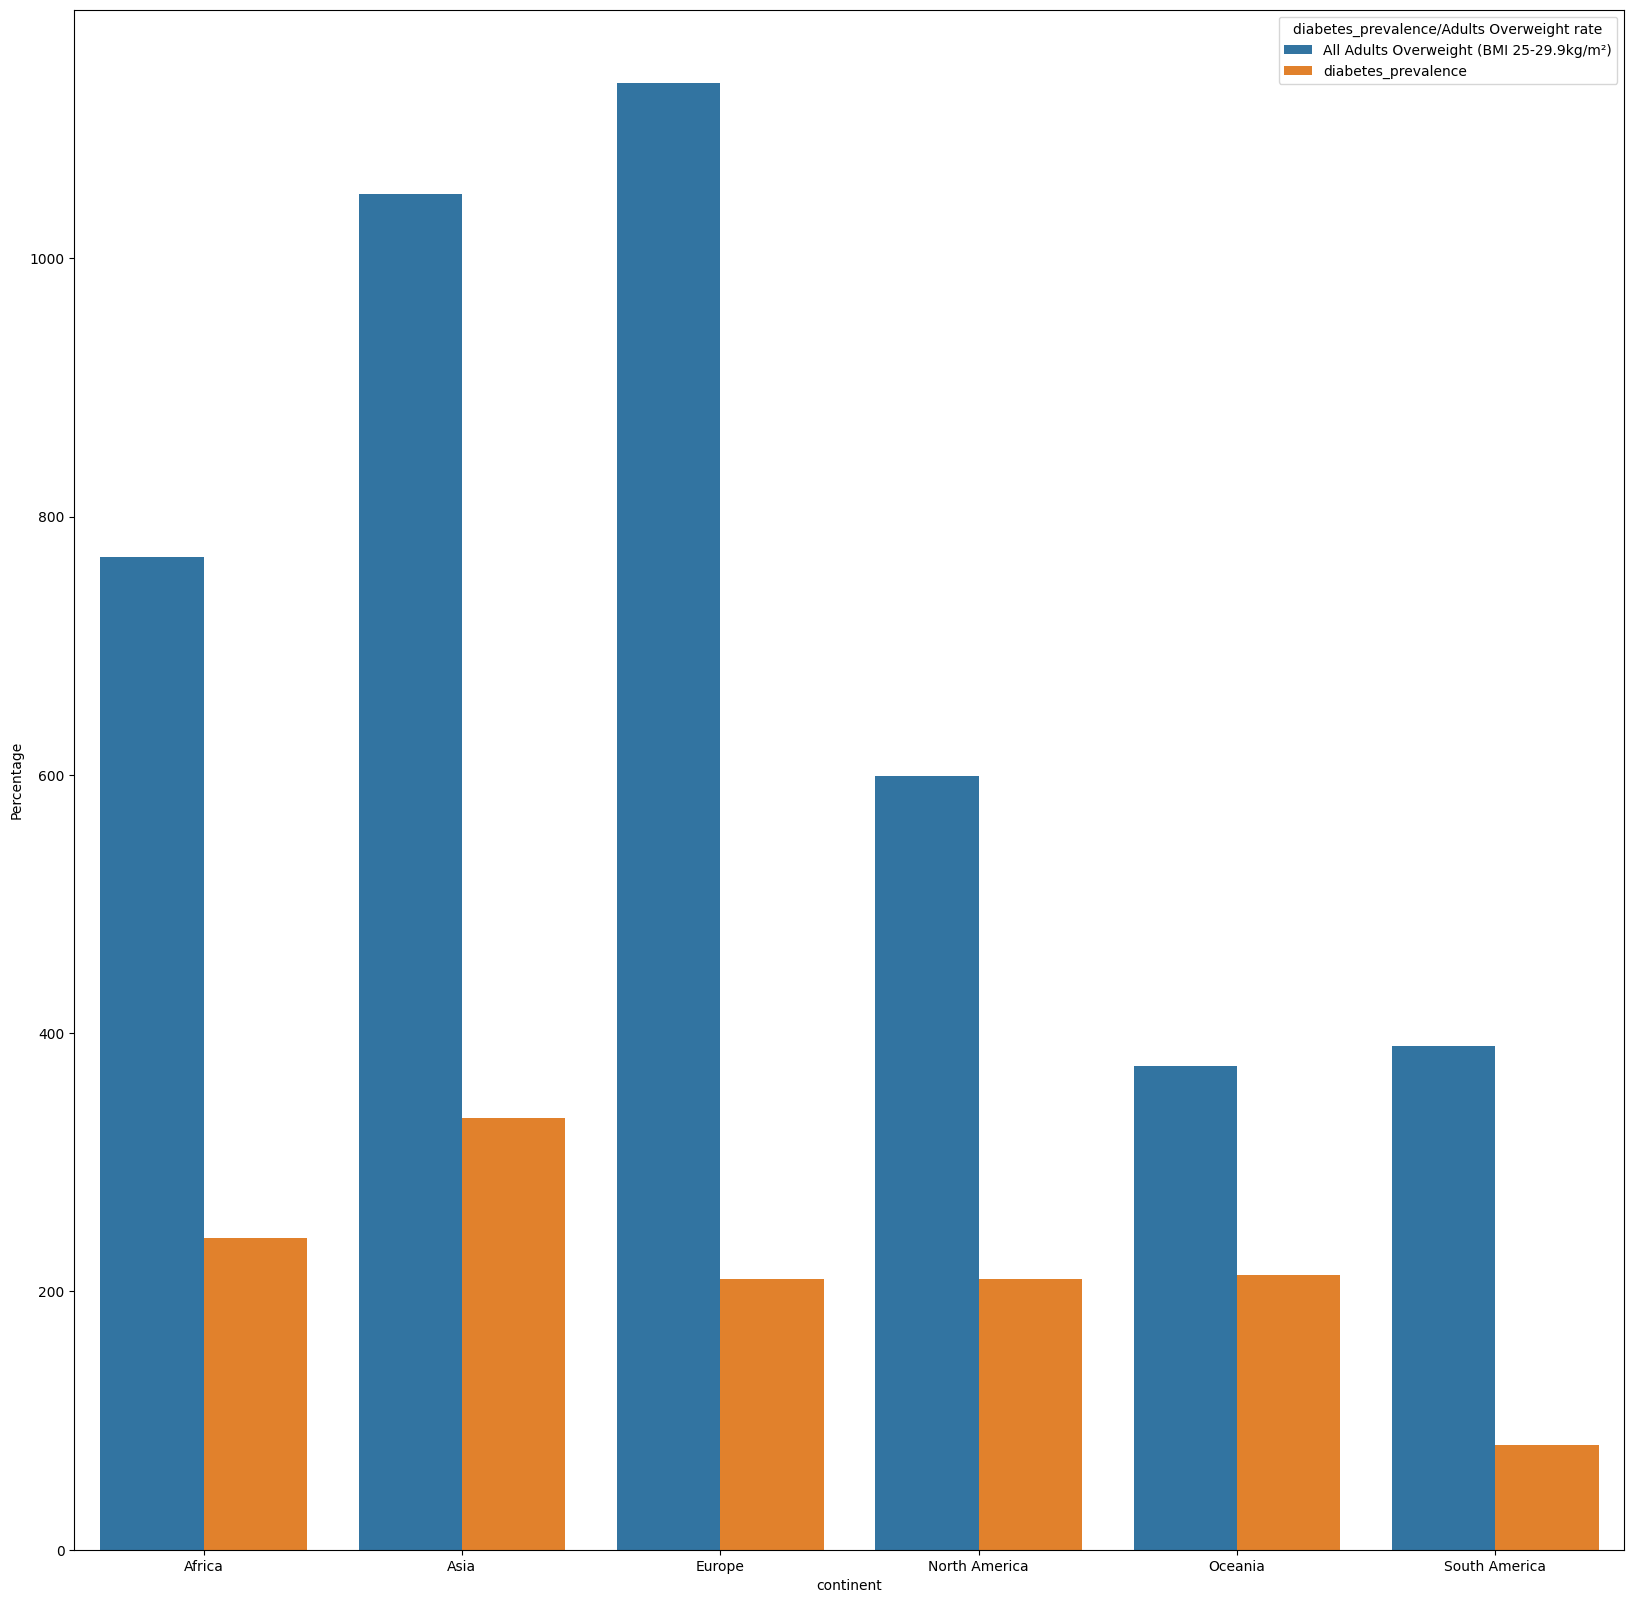

In [93]:
#Does the Overweight rate affect the Diabetes rate of each continent? If so, how?
# in the following bar plot the diabetes_prevalence and adult's overweight rates of each continent are displayed in order to specify whether the adult overweight rate affects the diabetes_prevalence rate and as you can see in the bar plot according to our datasets having a high overweight rate affects the diabetes_prevalence but not fully since there are other factors that affects the diabetes_prevalence rate.
sns.barplot(data = mergess, x = 'continent', y= 'Percentage' , hue='diabetes_prevalence/Adults Overweight rate')

In [94]:
#melt the continents Obesity Rate Before Covid" and "Obesity Rate After Covid" in order to have them in the same coloumn and visualize a comparison
mergedd = pd.melt(mergedd, id_vars=["continent"], value_vars=["Obesity Rate Before Covid", "Obesity Rate After Covid"])
mergedd

,continent,variable,value
0,Asia,Obesity Rate Before Covid,17.0
1,Europe,Obesity Rate Before Covid,21.3
2,Africa,Obesity Rate Before Covid,21.8
3,Europe,Obesity Rate Before Covid,13.6
4,Africa,Obesity Rate Before Covid,6.8
...,...,...,...
295,Oceania,Obesity Rate After Covid,25.2
296,South America,Obesity Rate After Covid,25.6
297,Asia,Obesity Rate After Covid,2.1
298,Africa,Obesity Rate After Covid,8.1


In [95]:
# group by the continent and variable as well as sum up the values which are the Obesity rate before and after Covid.
mergedd = mergedd.groupby(["continent","variable"]).sum().reset_index()
mergedd

,continent,variable,value
0,Africa,Obesity Rate After Covid,499.50
1,Africa,Obesity Rate Before Covid,506.20
2,Asia,Obesity Rate After Covid,618.20
3,Asia,Obesity Rate Before Covid,636.56
4,Europe,Obesity Rate After Covid,705.20
5,Europe,Obesity Rate Before Covid,581.00
6,North America,Obesity Rate After Covid,476.90
7,North America,Obesity Rate Before Covid,570.60
8,Oceania,Obesity Rate After Covid,596.40
9,Oceania,Obesity Rate Before Covid,620.60


In [96]:
# Rename the coloumn in order to be more clear
merge = mergedd.rename(columns={'variable': 'Obesity Rate Before/After Covid', 'value': 'Rate'})

In [97]:
# Display the merge 
merge

,continent,Obesity Rate Before/After Covid,Rate
0,Africa,Obesity Rate After Covid,499.50
1,Africa,Obesity Rate Before Covid,506.20
2,Asia,Obesity Rate After Covid,618.20
3,Asia,Obesity Rate Before Covid,636.56
4,Europe,Obesity Rate After Covid,705.20
5,Europe,Obesity Rate Before Covid,581.00
6,North America,Obesity Rate After Covid,476.90
7,North America,Obesity Rate Before Covid,570.60
8,Oceania,Obesity Rate After Covid,596.40
9,Oceania,Obesity Rate Before Covid,620.60


<Axes: xlabel='continent', ylabel='Rate'>

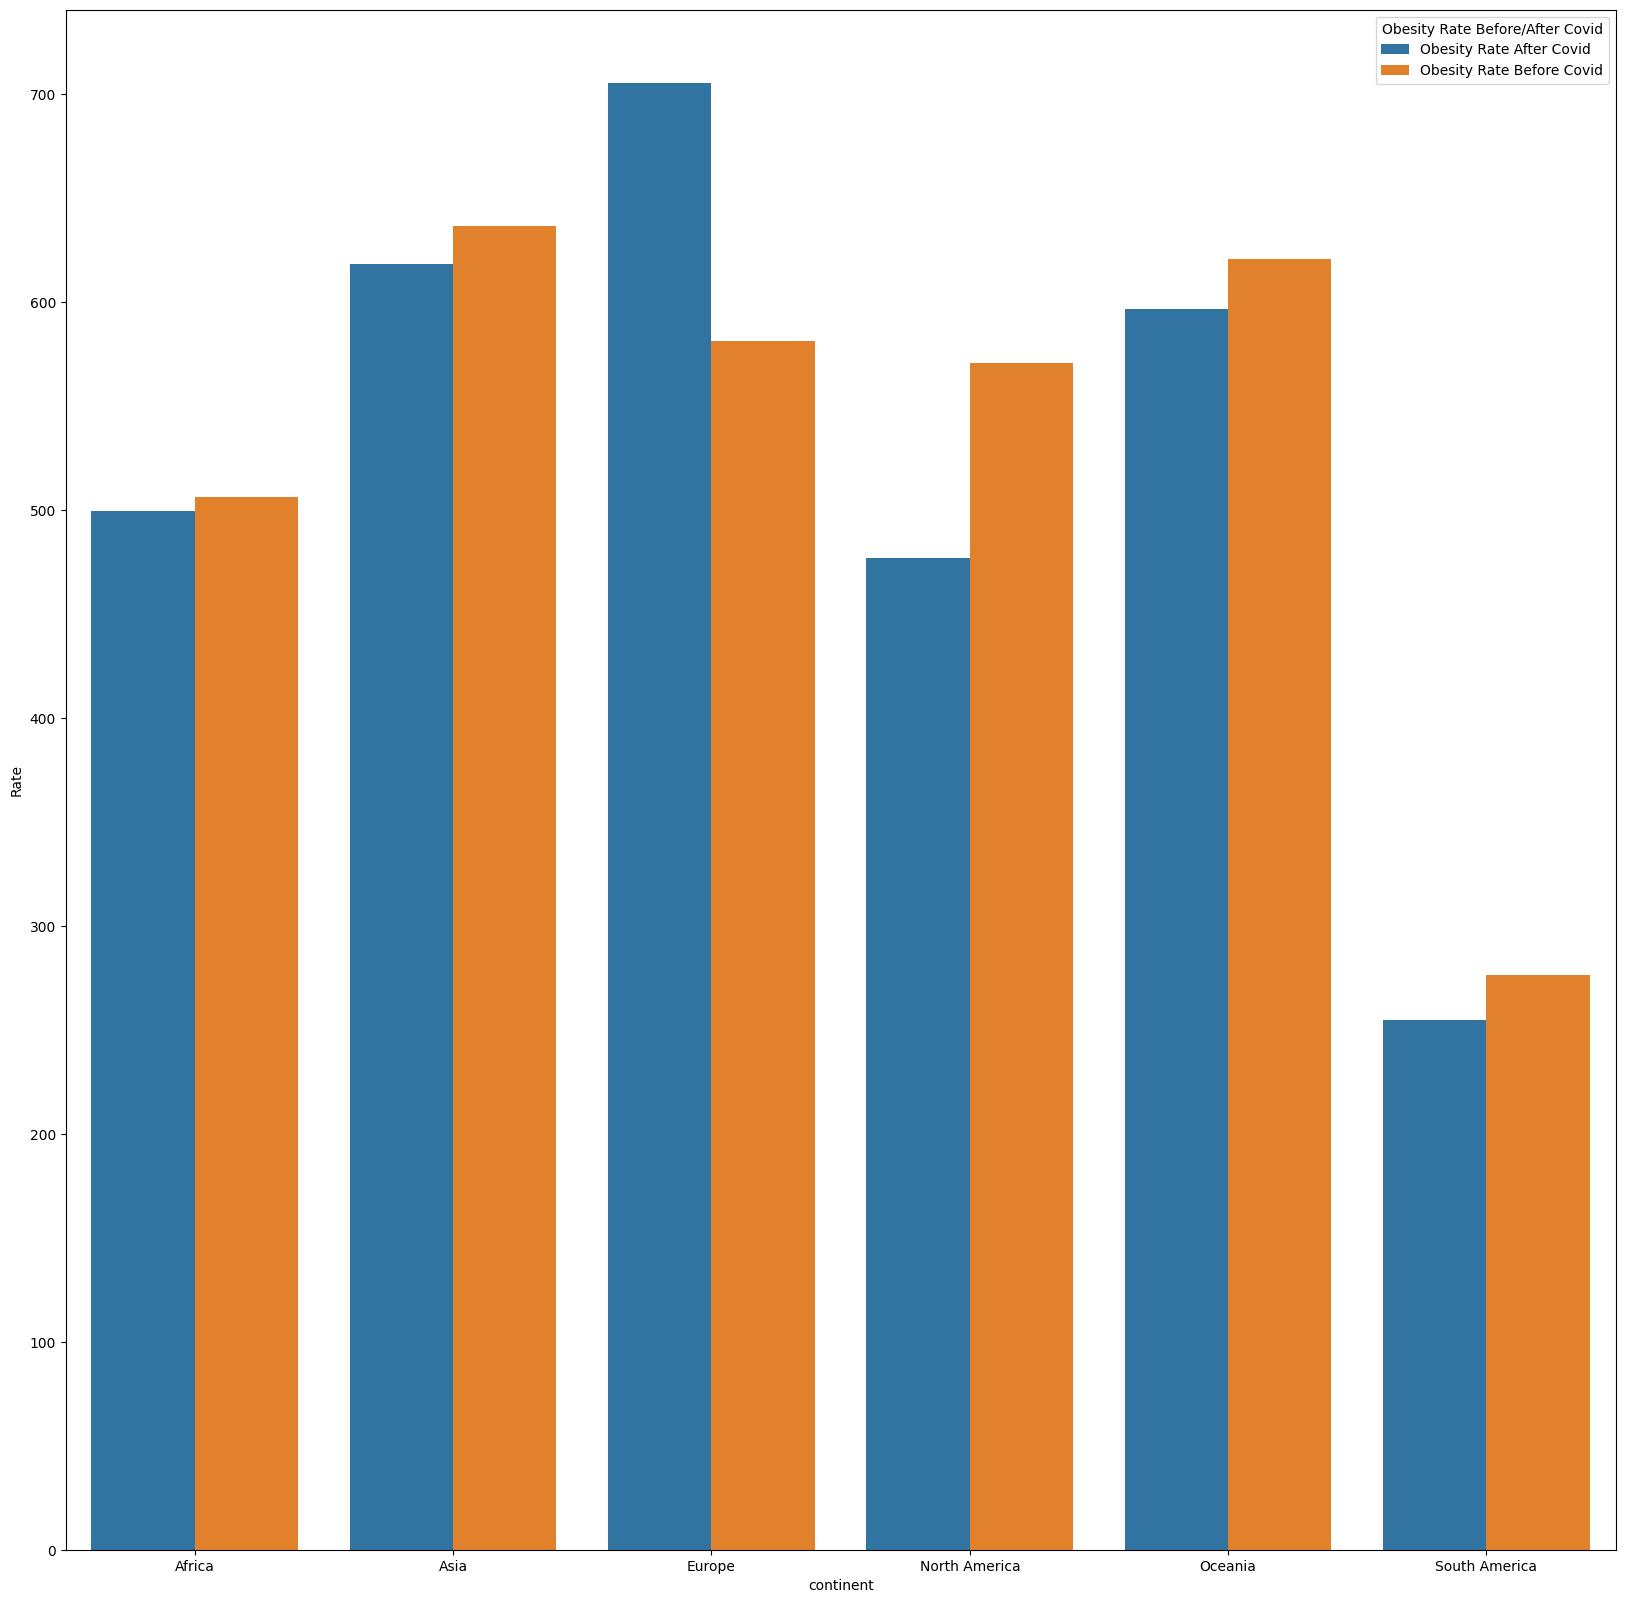

In [98]:
# Did Covid cause a drastic change in the Obesity Rate of each Continent? If so, how? Which Continent has the highest Obesity rate before covid? And after Covid?
# in the following bar plot the Obesity Rate Before Covid and  Obesity Rate After Covid of each continent are displayed in order to compare and specify  whether the Obesity rate is affected by Covid or not through comparing the obesity rate before and after covid of each continent and according to the plot and our dataset the Obesity rates went through a drastic change after covid in some of the continent such as Europe since it highly increased after covid as well as North America since it highly decreased after covid. moreover, all the continents had a change after covid. The Continent with the highest obesity rate before Covid is Asia however after covid the continent with the highest obesity rate became Europe.
sns.barplot(data = merge, x = 'continent', y= 'Rate' , hue='Obesity Rate Before/After Covid')

# Ahmed sameh 211392

In [100]:
import requests
import urllib.request
import time
from bs4 import BeautifulSoup
import numpy as np
import pandas as pd
from urllib.request import urlopen
import lxml.html as lh

In [101]:
url = 'https://www.cdc.gov/mmwr/volumes/70/wr/mm7013e2.htm'
dfs = pd.read_html(url)

print(len(dfs))    #read the html from the given  url

1


In [102]:
print(dfs[0])

                                       Characteristic  \
                                       Characteristic   
                                       Characteristic   
0                                               Total   
1                                      Age group, yrs   
2                                               18–29   
3                                               30–39   
4                                               40–49   
5                                               50–59   
6                                               60–69   
7                                               70–79   
8                                                 ≥80   
9                                                 Sex   
10                                               Male   
11                                             Female   
12                                     Race/Ethnicity   
13                                 Hispanic or Latino   
14                             

In [5]:
df = dfs[0] # select the first table from the list of scraped tables

In [6]:
df

Characteristic  \
                                       Characteristic   
                                       Characteristic   
0                                               Total   
1                                      Age group, yrs   
2                                               18–29   
3                                               30–39   
4                                               40–49   
5                                               50–59   
6                                               60–69   
7                                               70–79   
8                                                 ≥80   
9                                                 Sex   
10                                               Male   
11                                             Female   
12                                     Race/Ethnicity   
13                                 Hispanic or Latino   
14                                White, non-Hispanic   
15                                Black, non-Hispanic   
16                                Asian, non-Hispanic   
17                 Other/Multiple races, non-Hispanic   
18                                    Education level   
19                      Less than high school diploma   
20             High school diploma or GED certificate   
21                 Some college or associate’s degree   
22                        Bachelor’s degree or higher   
23  Symptoms of anxiety or depressive disorder dur...   
24                        Did not experience symptoms   
25                               Experienced symptoms   

                                                      % (95% CI)  \
   Symptoms of anxiety or depressive disorder during past 7 days   
                                                 Aug 19–31, 2020   
0                                    36.4 (35.9–36.9)              
1                                      Age group, yrs              
2                                    49.0 (47.5–50.5)              
3                                    42.5 (40.8–44.1)              
4                                    37.6 (36.3–39.0)              
5                                    34.9 (33.6–36.3)              
6                                    29.3 (28.0–30.6)              
7                                    23.2 (21.6–25.0)              
8                                    19.4 (16.3–22.9)              
9                                                 Sex              
10                                   31.8 (30.8–32.8)              
11                                   40.7 (39.9–41.5)              
12                                     Race/Ethnicity              
13                                   40.2 (38.0–42.3)              
14                                   35.4 (34.8–35.9)              
15                                   37.7 (35.7–39.8)              
16                                   30.5 (28.2–32.8)              
17                                   43.1 (40.2–46.1)              
18                                    Education level              
19                                   41.8 (38.4–45.2)              
20                                   36.3 (35.0–37.7)              
21                                   39.4 (38.5–40.3)              
22                                   32.4 (31.7–33.0)              
23  Symptoms of anxiety or depressive disorder dur...              
24                                                NaN              
25                                                NaN              

                                                       \
                                                        
                                   Jan 20–Feb 1, 2021   
0                                   41.5 (40.7–42.2)†   
1                                      Age group, yrs   
2                                   57.0 (54.2–59.8)†   
3                                   45.9 (44.5–47.3)†   
4            

In [8]:
df.to_excel('python.xlsx')  # put the tabel extracted in excel


In [9]:
read_file = pd.read_excel ("python.xlsx")
  
# Write the dataframe object
# into csv file
read_file.to_csv ("Depressionrates.csv", 
                  index = None,
                  header=True)
    
# read csv file and convert 
# into a dataframe object
df = pd.DataFrame(pd.read_csv("Depressionrates.csv"))
  
# show the dataframe
df

,Unnamed: 0,Characteristic,% (95% CI),Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7
0,NaN,Characteristic,Symptoms of anxiety or depressive disorder dur...,NaN,Took prescription medication for mental health...,NaN,Needed but did not receive counseling or thera...,NaN
1,NaN,Characteristic,"Aug 19–31, 2020","Jan 20–Feb 1, 2021","Aug 19–31, 2020","Jan 20–Feb 1, 2021","Aug 19–31, 2020","Jan 20–Feb 1, 2021"
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,0.0,Total,36.4 (35.9–36.9),41.5 (40.7–42.2)†,22.4 (22.0–22.9),24.8 (24.2–25.4)†,9.2 (8.8–9.6),11.7 (11.1–12.2)†
4,1.0,"Age group, yrs","Age group, yrs","Age group, yrs","Age group, yrs","Age group, yrs","Age group, yrs","Age group, yrs"
5,2.0,18–29,49.0 (47.5–50.5),57.0 (54.2–59.8)†,23.3 (21.5–25.2),26.9 (24.9–29.0)†,15.6 (14.5–16.7),22.8 (20.3–25.4)†
6,3.0,30–39,42.5 (40.8–44.1),45.9 (44.5–47.3)†,23.1 (22.1–24.1),27.1 (25.8–28.4)†,12.9 (11.9–13.9),16.1 (14.8–17.5)†
7,4.0,40–49,37.6 (36.3–39.0),41.1 (38.9–43.2)†,23.6 (22.8–24.5),25.0 (23.7–26.3),10.0 (9.3–10.7),11.0 (10.0–11.9)
8,5.0,50–59,34.9 (33.6–36.3),41.2 (39.8–42.6)†,23.9 (22.8–25.1),25.4 (24.0–26.9),7.7 (6.9–8.5),9.5 (8.6–10.4)†
9,6.0,60–69,29.3 (28.0–30.6),33.4 (31.6–35.4)†,21.2 (20.2–22.2),23.3 (22.0–24.6)†,5.3 (4.8–5.9),5.4 (4.8–6.0)


In [10]:
Depra = pd.read_csv("Depressionrates.csv")

In [12]:
Depra.head(10) # show first 10 indexes

,Unnamed: 0,Characteristic,% (95% CI),Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7
0,NaN,Characteristic,Symptoms of anxiety or depressive disorder dur...,NaN,Took prescription medication for mental health...,NaN,Needed but did not receive counseling or thera...,NaN
1,NaN,Characteristic,"Aug 19–31, 2020","Jan 20–Feb 1, 2021","Aug 19–31, 2020","Jan 20–Feb 1, 2021","Aug 19–31, 2020","Jan 20–Feb 1, 2021"
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,0.0,Total,36.4 (35.9–36.9),41.5 (40.7–42.2)†,22.4 (22.0–22.9),24.8 (24.2–25.4)†,9.2 (8.8–9.6),11.7 (11.1–12.2)†
4,1.0,"Age group, yrs","Age group, yrs","Age group, yrs","Age group, yrs","Age group, yrs","Age group, yrs","Age group, yrs"
5,2.0,18–29,49.0 (47.5–50.5),57.0 (54.2–59.8)†,23.3 (21.5–25.2),26.9 (24.9–29.0)†,15.6 (14.5–16.7),22.8 (20.3–25.4)†
6,3.0,30–39,42.5 (40.8–44.1),45.9 (44.5–47.3)†,23.1 (22.1–24.1),27.1 (25.8–28.4)†,12.9 (11.9–13.9),16.1 (14.8–17.5)†
7,4.0,40–49,37.6 (36.3–39.0),41.1 (38.9–43.2)†,23.6 (22.8–24.5),25.0 (23.7–26.3),10.0 (9.3–10.7),11.0 (10.0–11.9)
8,5.0,50–59,34.9 (33.6–36.3),41.2 (39.8–42.6)†,23.9 (22.8–25.1),25.4 (24.0–26.9),7.7 (6.9–8.5),9.5 (8.6–10.4)†
9,6.0,60–69,29.3 (28.0–30.6),33.4 (31.6–35.4)†,21.2 (20.2–22.2),23.3 (22.0–24.6)†,5.3 (4.8–5.9),5.4 (4.8–6.0)


In [15]:
Depra.head(10)# show first 10 indexes

,Unnamed: 0,Characteristic,% (95% CI),Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7
0,NaN,Characteristic,Symptoms of anxiety or depressive disorder dur...,NaN,Took prescription medication for mental health...,NaN,Needed but did not receive counseling or thera...,NaN
1,NaN,Characteristic,"Aug 19–31, 2020","Jan 20–Feb 1, 2021","Aug 19–31, 2020","Jan 20–Feb 1, 2021","Aug 19–31, 2020","Jan 20–Feb 1, 2021"
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,0.0,Total,36.4 (35.9–36.9),41.5 (40.7–42.2)†,22.4 (22.0–22.9),24.8 (24.2–25.4)†,9.2 (8.8–9.6),11.7 (11.1–12.2)†
4,1.0,"Age group, yrs","Age group, yrs","Age group, yrs","Age group, yrs","Age group, yrs","Age group, yrs","Age group, yrs"
5,2.0,18–29,49.0 (47.5–50.5),57.0 (54.2–59.8)†,23.3 (21.5–25.2),26.9 (24.9–29.0)†,15.6 (14.5–16.7),22.8 (20.3–25.4)†
6,3.0,30–39,42.5 (40.8–44.1),45.9 (44.5–47.3)†,23.1 (22.1–24.1),27.1 (25.8–28.4)†,12.9 (11.9–13.9),16.1 (14.8–17.5)†
7,4.0,40–49,37.6 (36.3–39.0),41.1 (38.9–43.2)†,23.6 (22.8–24.5),25.0 (23.7–26.3),10.0 (9.3–10.7),11.0 (10.0–11.9)
8,5.0,50–59,34.9 (33.6–36.3),41.2 (39.8–42.6)†,23.9 (22.8–25.1),25.4 (24.0–26.9),7.7 (6.9–8.5),9.5 (8.6–10.4)†
9,6.0,60–69,29.3 (28.0–30.6),33.4 (31.6–35.4)†,21.2 (20.2–22.2),23.3 (22.0–24.6)†,5.3 (4.8–5.9),5.4 (4.8–6.0)


In [16]:
Depra.drop(['Unnamed: 4', 'Unnamed: 5','Unnamed: 6','Unnamed: 7'], axis=1, inplace=True) # drop the values that we will not need in our dataset because it is not related to our chosen topic

In [17]:
Depra.head(10)

,Unnamed: 0,Characteristic,% (95% CI),Unnamed: 3
0,NaN,Characteristic,Symptoms of anxiety or depressive disorder dur...,NaN
1,NaN,Characteristic,"Aug 19–31, 2020","Jan 20–Feb 1, 2021"
2,NaN,NaN,NaN,NaN
3,0.0,Total,36.4 (35.9–36.9),41.5 (40.7–42.2)†
4,1.0,"Age group, yrs","Age group, yrs","Age group, yrs"
5,2.0,18–29,49.0 (47.5–50.5),57.0 (54.2–59.8)†
6,3.0,30–39,42.5 (40.8–44.1),45.9 (44.5–47.3)†
7,4.0,40–49,37.6 (36.3–39.0),41.1 (38.9–43.2)†
8,5.0,50–59,34.9 (33.6–36.3),41.2 (39.8–42.6)†
9,6.0,60–69,29.3 (28.0–30.6),33.4 (31.6–35.4)†


In [19]:
Depra.drop(0, inplace=True)
Depra.head(10)  #drop unwanted rows because it has unuseful information

,Unnamed: 0,Characteristic,% (95% CI),Unnamed: 3
1,NaN,Characteristic,"Aug 19–31, 2020","Jan 20–Feb 1, 2021"
2,NaN,NaN,NaN,NaN
3,0.0,Total,36.4 (35.9–36.9),41.5 (40.7–42.2)†
4,1.0,"Age group, yrs","Age group, yrs","Age group, yrs"
5,2.0,18–29,49.0 (47.5–50.5),57.0 (54.2–59.8)†
6,3.0,30–39,42.5 (40.8–44.1),45.9 (44.5–47.3)†
7,4.0,40–49,37.6 (36.3–39.0),41.1 (38.9–43.2)†
8,5.0,50–59,34.9 (33.6–36.3),41.2 (39.8–42.6)†
9,6.0,60–69,29.3 (28.0–30.6),33.4 (31.6–35.4)†
10,7.0,70–79,23.2 (21.6–25.0),26.3 (24.6–28.0)†


In [20]:
Depra.drop(2, inplace=True)
Depra.head(10)  #drop unwanted rows because it has unuseful information

,Unnamed: 0,Characteristic,% (95% CI),Unnamed: 3
1,NaN,Characteristic,"Aug 19–31, 2020","Jan 20–Feb 1, 2021"
3,0.0,Total,36.4 (35.9–36.9),41.5 (40.7–42.2)†
4,1.0,"Age group, yrs","Age group, yrs","Age group, yrs"
5,2.0,18–29,49.0 (47.5–50.5),57.0 (54.2–59.8)†
6,3.0,30–39,42.5 (40.8–44.1),45.9 (44.5–47.3)†
7,4.0,40–49,37.6 (36.3–39.0),41.1 (38.9–43.2)†
8,5.0,50–59,34.9 (33.6–36.3),41.2 (39.8–42.6)†
9,6.0,60–69,29.3 (28.0–30.6),33.4 (31.6–35.4)†
10,7.0,70–79,23.2 (21.6–25.0),26.3 (24.6–28.0)†
11,8.0,≥80,19.4 (16.3–22.9),22.5 (18.5–27.0)


In [21]:
Depra.drop(3, inplace=True)
Depra.head(10)  #drop unwanted rows because it has unuseful information

,Unnamed: 0,Characteristic,% (95% CI),Unnamed: 3
1,NaN,Characteristic,"Aug 19–31, 2020","Jan 20–Feb 1, 2021"
4,1.0,"Age group, yrs","Age group, yrs","Age group, yrs"
5,2.0,18–29,49.0 (47.5–50.5),57.0 (54.2–59.8)†
6,3.0,30–39,42.5 (40.8–44.1),45.9 (44.5–47.3)†
7,4.0,40–49,37.6 (36.3–39.0),41.1 (38.9–43.2)†
8,5.0,50–59,34.9 (33.6–36.3),41.2 (39.8–42.6)†
9,6.0,60–69,29.3 (28.0–30.6),33.4 (31.6–35.4)†
10,7.0,70–79,23.2 (21.6–25.0),26.3 (24.6–28.0)†
11,8.0,≥80,19.4 (16.3–22.9),22.5 (18.5–27.0)
12,9.0,Sex,Sex,Sex


In [22]:
Depra.head

<bound method NDFrame.head of     Unnamed: 0                                     Characteristic  \
1          NaN                                     Characteristic   
4          1.0                                     Age group, yrs   
5          2.0                                              18–29   
6          3.0                                              30–39   
7          4.0                                              40–49   
8          5.0                                              50–59   
9          6.0                                              60–69   
10         7.0                                              70–79   
11         8.0                                                ≥80   
12         9.0                                                Sex   
13        10.0                                               Male   
14        11.0                                             Female   
15        12.0                                     Race/Ethnicity   
16  

In [23]:
Depra.drop([12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28], inplace=True)
Depra   #drop unwanted rows because it has unuseful information

,Unnamed: 0,Characteristic,% (95% CI),Unnamed: 3
1,NaN,Characteristic,"Aug 19–31, 2020","Jan 20–Feb 1, 2021"
4,1.0,"Age group, yrs","Age group, yrs","Age group, yrs"
5,2.0,18–29,49.0 (47.5–50.5),57.0 (54.2–59.8)†
6,3.0,30–39,42.5 (40.8–44.1),45.9 (44.5–47.3)†
7,4.0,40–49,37.6 (36.3–39.0),41.1 (38.9–43.2)†


In [24]:
Depra

,Unnamed: 0,Characteristic,% (95% CI),Unnamed: 3
1,NaN,Characteristic,"Aug 19–31, 2020","Jan 20–Feb 1, 2021"
4,1.0,"Age group, yrs","Age group, yrs","Age group, yrs"
5,2.0,18–29,49.0 (47.5–50.5),57.0 (54.2–59.8)†
6,3.0,30–39,42.5 (40.8–44.1),45.9 (44.5–47.3)†
7,4.0,40–49,37.6 (36.3–39.0),41.1 (38.9–43.2)†
8,5.0,50–59,34.9 (33.6–36.3),41.2 (39.8–42.6)†
9,6.0,60–69,29.3 (28.0–30.6),33.4 (31.6–35.4)†
10,7.0,70–79,23.2 (21.6–25.0),26.3 (24.6–28.0)†
11,8.0,≥80,19.4 (16.3–22.9),22.5 (18.5–27.0)


In [25]:
Depra.drop(['Unnamed: 0'], axis=1, inplace=True)
Depra  #drop the extra ciolumn has no value

,Characteristic,% (95% CI),Unnamed: 3
1,Characteristic,"Aug 19–31, 2020","Jan 20–Feb 1, 2021"
4,"Age group, yrs","Age group, yrs","Age group, yrs"
5,18–29,49.0 (47.5–50.5),57.0 (54.2–59.8)†
6,30–39,42.5 (40.8–44.1),45.9 (44.5–47.3)†
7,40–49,37.6 (36.3–39.0),41.1 (38.9–43.2)†
8,50–59,34.9 (33.6–36.3),41.2 (39.8–42.6)†
9,60–69,29.3 (28.0–30.6),33.4 (31.6–35.4)†
10,70–79,23.2 (21.6–25.0),26.3 (24.6–28.0)†
11,≥80,19.4 (16.3–22.9),22.5 (18.5–27.0)


In [26]:
Depra.drop([1], inplace=True)
Depra #drop unwanted rows because it has unuseful information

,Characteristic,% (95% CI),Unnamed: 3
4,"Age group, yrs","Age group, yrs","Age group, yrs"
5,18–29,49.0 (47.5–50.5),57.0 (54.2–59.8)†
6,30–39,42.5 (40.8–44.1),45.9 (44.5–47.3)†
7,40–49,37.6 (36.3–39.0),41.1 (38.9–43.2)†
8,50–59,34.9 (33.6–36.3),41.2 (39.8–42.6)†
9,60–69,29.3 (28.0–30.6),33.4 (31.6–35.4)†
10,70–79,23.2 (21.6–25.0),26.3 (24.6–28.0)†
11,≥80,19.4 (16.3–22.9),22.5 (18.5–27.0)


In [27]:
Depra.drop([4], inplace=True)
Depra #drop unwanted rows because it has unuseful information

,Characteristic,% (95% CI),Unnamed: 3
5,18–29,49.0 (47.5–50.5),57.0 (54.2–59.8)†
6,30–39,42.5 (40.8–44.1),45.9 (44.5–47.3)†
7,40–49,37.6 (36.3–39.0),41.1 (38.9–43.2)†
8,50–59,34.9 (33.6–36.3),41.2 (39.8–42.6)†
9,60–69,29.3 (28.0–30.6),33.4 (31.6–35.4)†
10,70–79,23.2 (21.6–25.0),26.3 (24.6–28.0)†
11,≥80,19.4 (16.3–22.9),22.5 (18.5–27.0)


In [28]:
Depra = Depra.rename(columns={'Characteristic': 'Age', '% (95% CI)': '2020_rate', 'Unnamed: 3': '2021_rate'}) # rename the column names to clearer and more simple ones

In [29]:
Depra

,Age,2020_rate,2021_rate
5,18–29,49.0 (47.5–50.5),57.0 (54.2–59.8)†
6,30–39,42.5 (40.8–44.1),45.9 (44.5–47.3)†
7,40–49,37.6 (36.3–39.0),41.1 (38.9–43.2)†
8,50–59,34.9 (33.6–36.3),41.2 (39.8–42.6)†
9,60–69,29.3 (28.0–30.6),33.4 (31.6–35.4)†
10,70–79,23.2 (21.6–25.0),26.3 (24.6–28.0)†
11,≥80,19.4 (16.3–22.9),22.5 (18.5–27.0)


In [30]:
Depra.to_csv("DepressionAge.csv")

In [7]:
Depra = Depra.rename(index={5: 'first'})


In [8]:
Depra

,Unnamed: 0,Age,2020_rate,2021_rate
0,5,18–29,49.0 (47.5–50.5),57.0 (54.2–59.8)†
1,6,30–39,42.5 (40.8–44.1),45.9 (44.5–47.3)†
2,7,40–49,37.6 (36.3–39.0),41.1 (38.9–43.2)†
3,8,50–59,34.9 (33.6–36.3),41.2 (39.8–42.6)†
4,9,60–69,29.3 (28.0–30.6),33.4 (31.6–35.4)†
first,10,70–79,23.2 (21.6–25.0),26.3 (24.6–28.0)†
6,11,≥80,19.4 (16.3–22.9),22.5 (18.5–27.0)


In [37]:
Depra = Depra.rename(index={6: 'second'})

In [38]:
Depra = Depra.rename(index={7: 'third'})

In [39]:
Depra = Depra.rename(index={8: 'fourth'})

In [40]:
Depra = Depra.rename(index={9: 'fifth'})

In [41]:
Depra = Depra.rename(index={10: 'sixth'})

In [42]:
Depra = Depra.rename(index={11: 'seventh'})

In [43]:
Depra

,Age,2020_rate,2021_rate
first,18–29,49.0 (47.5–50.5),57.0 (54.2–59.8)†
second,30–39,42.5 (40.8–44.1),45.9 (44.5–47.3)†
third,40–49,37.6 (36.3–39.0),41.1 (38.9–43.2)†
fourth,50–59,34.9 (33.6–36.3),41.2 (39.8–42.6)†
fifth,60–69,29.3 (28.0–30.6),33.4 (31.6–35.4)†
sixth,70–79,23.2 (21.6–25.0),26.3 (24.6–28.0)†
seventh,≥80,19.4 (16.3–22.9),22.5 (18.5–27.0)


In [10]:
Deprag = pd.read_csv("DepressionAge.csv") #read the csv file

In [11]:
Deprag

,Unnamed: 0,Age,2020_rate,2021_rate
0,5,18–29,49.0 (47.5–50.5),57.0 (54.2–59.8)†
1,6,30–39,42.5 (40.8–44.1),45.9 (44.5–47.3)†
2,7,40–49,37.6 (36.3–39.0),41.1 (38.9–43.2)†
3,8,50–59,34.9 (33.6–36.3),41.2 (39.8–42.6)†
4,9,60–69,29.3 (28.0–30.6),33.4 (31.6–35.4)†
5,10,70–79,23.2 (21.6–25.0),26.3 (24.6–28.0)†
6,11,≥80,19.4 (16.3–22.9),22.5 (18.5–27.0)


In [12]:
Deprag.drop(['Unnamed: 0'], axis=1, inplace=True)
Deprag #drop the extra ciolumn has no value

,Age,2020_rate,2021_rate
0,18–29,49.0 (47.5–50.5),57.0 (54.2–59.8)†
1,30–39,42.5 (40.8–44.1),45.9 (44.5–47.3)†
2,40–49,37.6 (36.3–39.0),41.1 (38.9–43.2)†
3,50–59,34.9 (33.6–36.3),41.2 (39.8–42.6)†
4,60–69,29.3 (28.0–30.6),33.4 (31.6–35.4)†
5,70–79,23.2 (21.6–25.0),26.3 (24.6–28.0)†
6,≥80,19.4 (16.3–22.9),22.5 (18.5–27.0)


In [58]:
Deprag.to_csv("DepressionAge.csv") #save the csv file

In [15]:
Deprag 

,Age,2020_rate,2021_rate
0,18–29,49.0 (47.5–50.5),57.0 (54.2–59.8)†
1,30–39,42.5 (40.8–44.1),45.9 (44.5–47.3)†
2,40–49,37.6 (36.3–39.0),41.1 (38.9–43.2)†
3,50–59,34.9 (33.6–36.3),41.2 (39.8–42.6)†
4,60–69,29.3 (28.0–30.6),33.4 (31.6–35.4)†
5,70–79,23.2 (21.6–25.0),26.3 (24.6–28.0)†
6,≥80,19.4 (16.3–22.9),22.5 (18.5–27.0)


In [17]:
Deprag['2020_rate'] = Deprag['2020_rate'].replace(['49.0 (47.5–50.5)'], '49') # make the data much simple with only the things needed woithout the range

In [18]:
Deprag

,Age,2020_rate,2021_rate
0,18–29,49,57.0 (54.2–59.8)†
1,30–39,42.5 (40.8–44.1),45.9 (44.5–47.3)†
2,40–49,37.6 (36.3–39.0),41.1 (38.9–43.2)†
3,50–59,34.9 (33.6–36.3),41.2 (39.8–42.6)†
4,60–69,29.3 (28.0–30.6),33.4 (31.6–35.4)†
5,70–79,23.2 (21.6–25.0),26.3 (24.6–28.0)†
6,≥80,19.4 (16.3–22.9),22.5 (18.5–27.0)


In [19]:
Deprag['2020_rate'] = Deprag['2020_rate'].replace(['42.5 (40.8–44.1)'], '42.5') # make the data much simple with only the things needed woithout the range

In [20]:
Deprag['2020_rate'] = Deprag['2020_rate'].replace(['37.6 (36.3–39.0)'], '37.6') # make the data much simple with only the things needed woithout the range

In [21]:
Deprag['2020_rate'] = Deprag['2020_rate'].replace(['34.9 (33.6–36.3)'], '34.9 ') # make the data much simple with only the things needed woithout the range

In [22]:
Deprag['2020_rate'] = Deprag['2020_rate'].replace(['29.3 (28.0–30.6)'], '29.3') # make the data much simple with only the things needed woithout the range

In [23]:
Deprag['2020_rate'] = Deprag['2020_rate'].replace(['23.2 (21.6–25.0)'], '23.2') # make the data much simple with only the things needed woithout the range

In [24]:
Deprag['2020_rate'] = Deprag['2020_rate'].replace(['19.4 (16.3–22.9)'], '19.4') # make the data much simple with only the things needed woithout the range

In [25]:
Deprag

,Age,2020_rate,2021_rate
0,18–29,49,57.0 (54.2–59.8)†
1,30–39,42.5,45.9 (44.5–47.3)†
2,40–49,37.6,41.1 (38.9–43.2)†
3,50–59,34.9,41.2 (39.8–42.6)†
4,60–69,29.3,33.4 (31.6–35.4)†
5,70–79,23.2,26.3 (24.6–28.0)†
6,≥80,19.4,22.5 (18.5–27.0)


In [26]:
Deprag['2021_rate'] = Deprag['2021_rate'].replace(['57.0 (54.2–59.8)†'], '57.0')
Deprag # make the data much simple with only the things needed woithout the range

,Age,2020_rate,2021_rate
0,18–29,49,57.0
1,30–39,42.5,45.9 (44.5–47.3)†
2,40–49,37.6,41.1 (38.9–43.2)†
3,50–59,34.9,41.2 (39.8–42.6)†
4,60–69,29.3,33.4 (31.6–35.4)†
5,70–79,23.2,26.3 (24.6–28.0)†
6,≥80,19.4,22.5 (18.5–27.0)


In [27]:
Deprag['2021_rate'] = Deprag['2021_rate'].replace(['45.9 (44.5–47.3)†'], '45.9') # make the data much simple with only the things needed woithout the range

In [28]:
Deprag['2021_rate'] = Deprag['2021_rate'].replace(['41.1 (38.9–43.2)†'], '41.1') # make the data much simple with only the things needed woithout the range

In [29]:
Deprag['2021_rate'] = Deprag['2021_rate'].replace(['41.2 (39.8–42.6)†'], '41.2') # make the data much simple with only the things needed woithout the range

In [34]:
Deprag['2021_rate'] = Deprag['2021_rate'].replace(['33.4 (31.6–35.4)†'], '33.4') # make the data much simple with only the things needed woithout the range

In [31]:
Deprag['2021_rate'] = Deprag['2021_rate'].replace(['26.3 (24.6–28.0)†'], '26.3') # make the data much simple with only the things needed woithout the range

In [32]:
Deprag['2021_rate'] = Deprag['2021_rate'].replace(['22.5 (18.5–27.0)'], '22.5') # make the data much simple with only the things needed woithout the range

In [35]:
Deprag

,Age,2020_rate,2021_rate
0,18–29,49,57.0
1,30–39,42.5,45.9
2,40–49,37.6,41.1
3,50–59,34.9,41.2
4,60–69,29.3,33.4
5,70–79,23.2,26.3
6,≥80,19.4,22.5


In [36]:
Deprag['Age'] = Deprag['Age'].replace(['≥80'], '80+')
Deprag #make the value clearer inorder for it to be easy to merge

,Age,2020_rate,2021_rate
0,18–29,49,57.0
1,30–39,42.5,45.9
2,40–49,37.6,41.1
3,50–59,34.9,41.2
4,60–69,29.3,33.4
5,70–79,23.2,26.3
6,80+,19.4,22.5


In [38]:
Deprag['Age'] = Deprag['Age'].replace(['18–29'], '20-29') #change the datatype to string inorder for it to be read

In [39]:
Deprag['Age'] = Deprag['Age'].replace(['30–39'], '30-39') #change the datatype to string inorder for it to be read

In [40]:
Deprag['Age'] = Deprag['Age'].replace(['40–49'], '40-49') #change the datatype to string inorder for it to be read

In [41]:
Deprag['Age'] = Deprag['Age'].replace(['50–59'], '50-59') #change the datatype to string inorder for it to be read

In [42]:
Deprag['Age'] = Deprag['Age'].replace(['60–69'], '60-69') #change the datatype to string inorder for it to be read

In [43]:
Deprag['Age'] = Deprag['Age'].replace(['70–79'], '70-79') #change the datatype to string inorder for it to be read

In [46]:
Deprag

,Age,2020_rate,2021_rate
0,20–29,49,57.0
1,30–39,42.5,45.9
2,40–49,37.6,41.1
3,50–59,34.9,41.2
4,60–69,29.3,33.4
5,70–79,23.2,26.3
6,80+,19.4,22.5


In [47]:
Deprag.rename(columns = {'Age':'AgeGroups'}, inplace = True)
Deprag #rename the column to be able to merge later on

,AgeGroups,2020_rate,2021_rate
0,20–29,49,57.0
1,30–39,42.5,45.9
2,40–49,37.6,41.1
3,50–59,34.9,41.2
4,60–69,29.3,33.4
5,70–79,23.2,26.3
6,80+,19.4,22.5


In [50]:
Deprag['AgeGroups'] = Deprag['AgeGroups'].replace(['20–29'], '20-29')
Deprag #change the datatype to string inorder for it to be read

,AgeGroups,2020_rate,2021_rate
0,20-29,49,57.0
1,30–39,42.5,45.9
2,40–49,37.6,41.1
3,50–59,34.9,41.2
4,60–69,29.3,33.4
5,70–79,23.2,26.3
6,80+,19.4,22.5


In [52]:
Deprag['AgeGroups'] = Deprag['AgeGroups'].replace(['30–39'], '30-39') #change the datatype to string inorder for it to be read

In [53]:
Deprag['AgeGroups'] = Deprag['AgeGroups'].replace(['40–49'], '40-49') #change the datatype to string inorder for it to be read

In [54]:
Deprag['AgeGroups'] = Deprag['AgeGroups'].replace(['50–59'], '50-59') #change the datatype to string inorder for it to be read

In [55]:
Deprag['AgeGroups'] = Deprag['AgeGroups'].replace(['60–69'], '60-69') #change the datatype to string inorder for it to be read

In [56]:
Deprag['AgeGroups'] = Deprag['AgeGroups'].replace(['70–79'], '70-79') #change the datatype to string inorder for it to be read

In [57]:
Deprag

,AgeGroups,2020_rate,2021_rate
0,20-29,49,57.0
1,30-39,42.5,45.9
2,40-49,37.6,41.1
3,50-59,34.9,41.2
4,60-69,29.3,33.4
5,70-79,23.2,26.3
6,80+,19.4,22.5


In [60]:
Deprag.rename(columns = {'2020_rate':'2020'}, inplace = True)
Deprag  #change the column name  inorder for it to be used in merging with date

,AgeGroups,2020,2021_rate
0,20-29,49,57.0
1,30-39,42.5,45.9
2,40-49,37.6,41.1
3,50-59,34.9,41.2
4,60-69,29.3,33.4
5,70-79,23.2,26.3
6,80+,19.4,22.5


In [61]:
Deprag.rename(columns = {'2021_rate':'2021'}, inplace = True)
Deprag  #change the column name  inorder for it to be used in merging with date

,AgeGroups,2020,2021
0,20-29,49,57.0
1,30-39,42.5,45.9
2,40-49,37.6,41.1
3,50-59,34.9,41.2
4,60-69,29.3,33.4
5,70-79,23.2,26.3
6,80+,19.4,22.5


In [62]:
Demelt = pd.melt(Deprag, id_vars=["AgeGroups"], value_vars=["2020", "2021"])
Demelt  # change the dataframe form for it to be more clear 

,AgeGroups,variable,value
0,20-29,2020,49
1,30-39,2020,42.5
2,40-49,2020,37.6
3,50-59,2020,34.9
4,60-69,2020,29.3
5,70-79,2020,23.2
6,80+,2020,19.4
7,20-29,2021,57.0
8,30-39,2021,45.9
9,40-49,2021,41.1


In [71]:
Demelt.to_csv("DepressionAge.csv")

In [66]:
Demelt

,AgeGroups,variable,value
0,20-29,2020,49
1,30-39,2020,42.5
2,40-49,2020,37.6
3,50-59,2020,34.9
4,60-69,2020,29.3
5,70-79,2020,23.2
6,80+,2020,19.4
7,20-29,2021,57.0
8,30-39,2021,45.9
9,40-49,2021,41.1


In [68]:
Demelt.rename(columns = {'variable':'Year'}, inplace = True)
Demelt #rename the column to Year to be able to merge

,AgeGroups,Year,value
0,20-29,2020,49
1,30-39,2020,42.5
2,40-49,2020,37.6
3,50-59,2020,34.9
4,60-69,2020,29.3
5,70-79,2020,23.2
6,80+,2020,19.4
7,20-29,2021,57.0
8,30-39,2021,45.9
9,40-49,2021,41.1


In [69]:
Demelt['Year']=Demelt['Year'].astype('int') #change data type to integer

In [70]:
Demelt

,AgeGroups,Year,value
0,20-29,2020,49
1,30-39,2020,42.5
2,40-49,2020,37.6
3,50-59,2020,34.9
4,60-69,2020,29.3
5,70-79,2020,23.2
6,80+,2020,19.4
7,20-29,2021,57.0
8,30-39,2021,45.9
9,40-49,2021,41.1


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
coage = pd.read_csv("covidagegroup.csv")
coage  #read the excel file of age

,Unnamed: 0,DateUpdated,AgeGroups,Total cases,Confirmed cases,Total case rate,Total deaths,Confirmed deaths,Probable deaths
0,0,5/27/2021,0-9,21266,19931.0,5649.0,1,1.0,0.0
1,2,5/27/2021,20-29,60808,54548.0,13066.0,10,10.0,0.0
2,3,5/27/2021,30-39,53926,48970.0,12189.0,41,39.0,2.0
3,4,5/27/2021,40-49,48453,44467.0,11196.0,150,119.0,31.0
4,5,5/27/2021,50-59,51855,48017.0,9984.0,453,383.0,70.0
...,...,...,...,...,...,...,...,...,...
4739,5332,5/26/2021,40-49,48434,44453.0,11191.0,149,119.0,30.0
4740,5333,5/26/2021,50-59,51834,48000.0,9980.0,452,383.0,69.0
4741,5334,5/26/2021,60-69,34348,32177.0,7796.0,1084,934.0,150.0
4742,5335,5/26/2021,70-79,17626,16584.0,6528.0,1845,1561.0,284.0


In [3]:
coage.drop(["Unnamed: 0"], axis=1, inplace=True)
coage #drop the extra column added

,DateUpdated,AgeGroups,Total cases,Confirmed cases,Total case rate,Total deaths,Confirmed deaths,Probable deaths
0,5/27/2021,0-9,21266,19931.0,5649.0,1,1.0,0.0
1,5/27/2021,20-29,60808,54548.0,13066.0,10,10.0,0.0
2,5/27/2021,30-39,53926,48970.0,12189.0,41,39.0,2.0
3,5/27/2021,40-49,48453,44467.0,11196.0,150,119.0,31.0
4,5/27/2021,50-59,51855,48017.0,9984.0,453,383.0,70.0
...,...,...,...,...,...,...,...,...
4739,5/26/2021,40-49,48434,44453.0,11191.0,149,119.0,30.0
4740,5/26/2021,50-59,51834,48000.0,9980.0,452,383.0,69.0
4741,5/26/2021,60-69,34348,32177.0,7796.0,1084,934.0,150.0
4742,5/26/2021,70-79,17626,16584.0,6528.0,1845,1561.0,284.0


In [11]:
coage["DateUpdated"]=pd.to_datetime(coage["DateUpdated"])
coage #puts the Dateupdated in datetime format

,DateUpdated,AgeGroups,Total cases,Confirmed cases,Total case rate,Total deaths,Confirmed deaths,Probable deaths
0,2021-05-27,0-9,21266,19931.0,5649.0,1,1.0,0.0
1,2021-05-27,20-29,60808,54548.0,13066.0,10,10.0,0.0
2,2021-05-27,30-39,53926,48970.0,12189.0,41,39.0,2.0
3,2021-05-27,40-49,48453,44467.0,11196.0,150,119.0,31.0
4,2021-05-27,50-59,51855,48017.0,9984.0,453,383.0,70.0
...,...,...,...,...,...,...,...,...
4739,2021-05-26,40-49,48434,44453.0,11191.0,149,119.0,30.0
4740,2021-05-26,50-59,51834,48000.0,9980.0,452,383.0,69.0
4741,2021-05-26,60-69,34348,32177.0,7796.0,1084,934.0,150.0
4742,2021-05-26,70-79,17626,16584.0,6528.0,1845,1561.0,284.0


In [14]:
coage['Year'] = coage['DateUpdated'].dt.year
coage # extract the year from the date and put it in a new column 

,DateUpdated,AgeGroups,Total cases,Confirmed cases,Total case rate,Total deaths,Confirmed deaths,Probable deaths,Year
0,2021-05-27,0-9,21266,19931.0,5649.0,1,1.0,0.0,2021
1,2021-05-27,20-29,60808,54548.0,13066.0,10,10.0,0.0,2021
2,2021-05-27,30-39,53926,48970.0,12189.0,41,39.0,2.0,2021
3,2021-05-27,40-49,48453,44467.0,11196.0,150,119.0,31.0,2021
4,2021-05-27,50-59,51855,48017.0,9984.0,453,383.0,70.0,2021
...,...,...,...,...,...,...,...,...,...
4739,2021-05-26,40-49,48434,44453.0,11191.0,149,119.0,30.0,2021
4740,2021-05-26,50-59,51834,48000.0,9980.0,452,383.0,69.0,2021
4741,2021-05-26,60-69,34348,32177.0,7796.0,1084,934.0,150.0,2021
4742,2021-05-26,70-79,17626,16584.0,6528.0,1845,1561.0,284.0,2021


In [16]:
coage.isnull().sum() #check sum of null values

DateUpdated         0
AgeGroups           0
Total cases         0
Confirmed cases     0
Total case rate     0
Total deaths        0
Confirmed deaths    0
Probable deaths     0
Year                0
dtype: int64

In [12]:
Depmelt = pd.read_csv("DepressionAge.csv")
Depmelt #open the excel file of depression

,Unnamed: 0,AgeGroups,Year,value
0,0,20-29,2020,49.0
1,1,30-39,2020,42.5
2,2,40-49,2020,37.6
3,3,50-59,2020,34.9
4,4,60-69,2020,29.3
5,5,70-79,2020,23.2
6,6,80+,2020,19.4
7,7,20-29,2021,57.0
8,8,30-39,2021,45.9
9,9,40-49,2021,41.1


In [13]:
Depmelt.drop(["Unnamed: 0"], axis=1, inplace=True)
Depmelt #drop extra addded column

,AgeGroups,Year,value
0,20-29,2020,49.0
1,30-39,2020,42.5
2,40-49,2020,37.6
3,50-59,2020,34.9
4,60-69,2020,29.3
5,70-79,2020,23.2
6,80+,2020,19.4
7,20-29,2021,57.0
8,30-39,2021,45.9
9,40-49,2021,41.1


In [17]:
Depmerge=pd.merge(coage,Depmelt,how='outer', on=['AgeGroups', 'Year'])
Depmerge #merging the datasets using the  outer join

,DateUpdated,AgeGroups,Total cases,Confirmed cases,Total case rate,Total deaths,Confirmed deaths,Probable deaths,Year,value
0,2021-05-27,0-9,21266,19931.0,5649.0,1,1.0,0.0,2021,NaN
1,2021-05-28,0-9,21298,19963.0,5658.0,1,1.0,0.0,2021,NaN
2,2021-06-01,0-9,21335,19988.0,5667.0,1,1.0,0.0,2021,NaN
3,2021-06-02,0-9,21343,19992.0,5670.0,1,1.0,0.0,2021,NaN
4,2021-06-03,0-9,21359,20006.0,5674.0,1,1.0,0.0,2021,NaN
...,...,...,...,...,...,...,...,...,...,...
4739,2020-09-28,80+,7221,6552.0,4399.0,2694,2095.0,599.0,2020,19.4
4740,2020-09-29,80+,7226,6556.0,4402.0,2695,2095.0,600.0,2020,19.4
4741,2020-09-30,80+,7232,6562.0,4405.0,2695,2095.0,600.0,2020,19.4
4742,2020-10-01,80+,7237,6566.0,4408.0,2697,2096.0,601.0,2020,19.4


In [22]:
Depmerge.to_csv("DepressionmeeAge.csv") #save the values in excel

In [19]:
Depmerge.isnull().sum() #check for null values

DateUpdated            0
AgeGroups              0
Total cases            0
Confirmed cases        0
Total case rate        0
Total deaths           0
Confirmed deaths       0
Probable deaths        0
Year                   0
value               1461
dtype: int64

In [20]:
Depmerge["value"]=Depmerge["value"].fillna(0)
Depmerge # fill the null values with zero for a chance of them being needed later on 

,DateUpdated,AgeGroups,Total cases,Confirmed cases,Total case rate,Total deaths,Confirmed deaths,Probable deaths,Year,value
0,2021-05-27,0-9,21266,19931.0,5649.0,1,1.0,0.0,2021,0.0
1,2021-05-28,0-9,21298,19963.0,5658.0,1,1.0,0.0,2021,0.0
2,2021-06-01,0-9,21335,19988.0,5667.0,1,1.0,0.0,2021,0.0
3,2021-06-02,0-9,21343,19992.0,5670.0,1,1.0,0.0,2021,0.0
4,2021-06-03,0-9,21359,20006.0,5674.0,1,1.0,0.0,2021,0.0
...,...,...,...,...,...,...,...,...,...,...
4739,2020-09-28,80+,7221,6552.0,4399.0,2694,2095.0,599.0,2020,19.4
4740,2020-09-29,80+,7226,6556.0,4402.0,2695,2095.0,600.0,2020,19.4
4741,2020-09-30,80+,7232,6562.0,4405.0,2695,2095.0,600.0,2020,19.4
4742,2020-10-01,80+,7237,6566.0,4408.0,2697,2096.0,601.0,2020,19.4


In [21]:
Depmerge.isnull().sum() # no null values found

DateUpdated         0
AgeGroups           0
Total cases         0
Confirmed cases     0
Total case rate     0
Total deaths        0
Confirmed deaths    0
Probable deaths     0
Year                0
value               0
dtype: int64

In [31]:
Depmerge.head()

,DateUpdated,AgeGroups,Total cases,Confirmed cases,Total case rate,Total deaths,Confirmed deaths,Probable deaths,Year,value
0,2021-05-27,0-9,21266,19931.0,5649.0,1,1.0,0.0,2021,0.0
1,2021-05-28,0-9,21298,19963.0,5658.0,1,1.0,0.0,2021,0.0
2,2021-06-01,0-9,21335,19988.0,5667.0,1,1.0,0.0,2021,0.0
3,2021-06-02,0-9,21343,19992.0,5670.0,1,1.0,0.0,2021,0.0
4,2021-06-03,0-9,21359,20006.0,5674.0,1,1.0,0.0,2021,0.0


In [39]:
ind = Depmerge[ (Depmerge['Year'] == 2022)].index
Depmerge.drop(ind , inplace=True)
Depmerge #drop the rows that contain the values of 2022 as it is out of the years needed

,DateUpdated,AgeGroups,Total cases,Confirmed cases,Total case rate,Total deaths,Confirmed deaths,Probable deaths,Year,value
0,2021-05-27,0-9,21266,19931.0,5649.0,1,1.0,0.0,2021,0.0
1,2021-05-28,0-9,21298,19963.0,5658.0,1,1.0,0.0,2021,0.0
2,2021-06-01,0-9,21335,19988.0,5667.0,1,1.0,0.0,2021,0.0
3,2021-06-02,0-9,21343,19992.0,5670.0,1,1.0,0.0,2021,0.0
4,2021-06-03,0-9,21359,20006.0,5674.0,1,1.0,0.0,2021,0.0
...,...,...,...,...,...,...,...,...,...,...
4739,2020-09-28,80+,7221,6552.0,4399.0,2694,2095.0,599.0,2020,19.4
4740,2020-09-29,80+,7226,6556.0,4402.0,2695,2095.0,600.0,2020,19.4
4741,2020-09-30,80+,7232,6562.0,4405.0,2695,2095.0,600.0,2020,19.4
4742,2020-10-01,80+,7237,6566.0,4408.0,2697,2096.0,601.0,2020,19.4


In [41]:
Depmerge = Depmerge[(Depmerge['Year'] == 2020) | (Depmerge['Year'] == 2021)] #DataFrame to include only rows where the Year column is equal to 2020 or 2021. The resulting DataFrame is stored in the Depmerge variable.

In [50]:
dep_group = Depmerge.groupby(["AgeGroups", "Year"]).sum().reset_index() #alculates the sum of each group, and resets the index of the resulting DataFrame. The resulting DataFrame is stored in the dep_group variable

C:\Users\20102\AppData\Local\Temp\ipykernel_24728\354438666.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  dep_group = Depmerge.groupby(["AgeGroups", "Year"]).sum().reset_index()


In [51]:
dep_group

,AgeGroups,Year,Total cases,Confirmed cases,Total case rate,Total deaths,Confirmed deaths,Probable deaths,value
0,0-9,2020,333264,305236.0,87902.0,216,160.0,0.0,0.0
1,0-9,2021,5584850,5225846.0,1482068.0,296,273.0,23.0,0.0
2,20-29,2020,1869742,1608429.0,401196.0,867,676.0,17.0,10535.0
3,20-29,2021,15384425,13788436.0,3304956.0,2776,2682.0,94.0,14478.0
4,30-39,2020,1904553,1614101.0,432520.0,4300,3438.0,23.0,9137.5
5,30-39,2021,13741993,12469982.0,3108505.0,11296,10551.0,745.0,11658.6
6,40-49,2020,1807351,1516702.0,410355.0,11555,7635.0,2005.0,8084.0
7,40-49,2021,12274053,11266477.0,2827665.0,36897,29611.0,7286.0,10439.4
8,50-59,2020,2085215,1734305.0,393853.0,35584,25147.0,5056.0,7503.5
9,50-59,2021,13081803,12103843.0,2510281.0,114424,96630.0,17794.0,10464.8


In [52]:
f_pivot = dep_group.pivot(index='AgeGroups', columns='Year', values='value')
f_pivot #This creates a new DataFrame with AgeGroups as the index, Year as the columns, and value as the values

Year,2020,2021
AgeGroups,,
0-9,0.0,0.0
20-29,10535.0,14478.0
30-39,9137.5,11658.6
40-49,8084.0,10439.4
50-59,7503.5,10464.8
60-69,6299.5,8483.6
70-79,4988.0,6680.2
80+,4171.0,5715.0


<Axes: xlabel='AgeGroups', ylabel='value'>

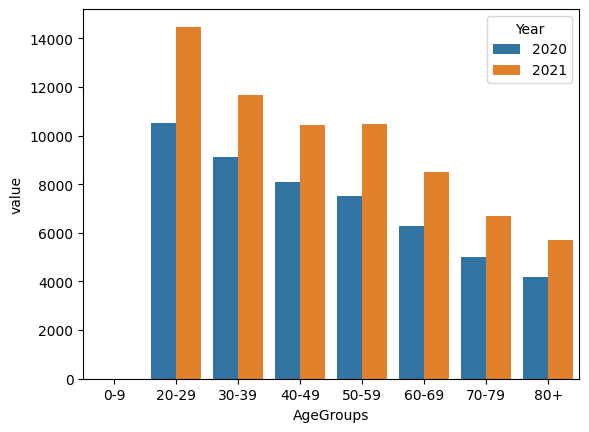

In [56]:
sns.barplot(data = dep_group , x = 'AgeGroups' , y = 'value' ,hue = 'Year', estimator=sum)
# the plot below shows the relationship between The Agegroups , the depression values and the Year  where in age ranges 0-9 there was no  depression value where in 20-29 it is seen that in 2020 and 2021 has hit its highest depression value between the rest of the age ranges with this information we can reach a conclusion that the most age-range with depression is the ages 20-29.  

# Abdulrahman ayman 211896

In [31]:
import requests
import urllib.request
import time
from bs4 import BeautifulSoup
import numpy as np
import pandas as pd
from urllib.request import urlopen
import lxml.html as lh
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams['figure.figsize']=(10,10)

In [2]:
url = 'https://www.macrotrends.net/countries/ranking/gdp-per-capita'
dfs = pd.read_html(url)

print(len(dfs)) #read the html from the given  url

1


In [3]:
response = requests.get(url)
response   #check if the request is accepted or rejected

<Response [200]>

In [4]:
print(dfs[0]) # print the first table

                 Country Name      2021      2020      2019      2018  \
0                      Monaco  $234,315  $182,539  $199,377  $194,281   
1                  Luxembourg  $133,590  $117,370  $112,622  $116,787   
2                     Bermuda  $114,090  $107,792  $116,153  $113,051   
3                     Ireland  $100,172   $85,420   $80,927   $79,250   
4                 Switzerland   $91,992   $85,656   $84,122   $85,217   
..                        ...       ...       ...       ...       ...   
203                San Marino        $0   $45,320   $47,287   $48,463   
204      Syrian Arab Republic        $0      $533    $1,117    $1,104   
205  Northern Mariana Islands        $0        $0   $23,707   $25,883   
206             Liechtenstein        $0  $157,755  $167,020  $175,284   
207     Virgin Islands (U.S.)        $0   $39,552   $38,596   $36,654   

         2017  
0    $173,613  
1    $110,193  
2    $111,821  
3     $69,971  
4     $82,254  
..        ...  
203   $44,8

In [5]:
df = dfs[0] #read the first table and put it in a dataframe

In [6]:
df

,Country Name,2021,2020,2019,2018,2017
0,Monaco,"$234,315","$182,539","$199,377","$194,281","$173,613"
1,Luxembourg,"$133,590","$117,370","$112,622","$116,787","$110,193"
2,Bermuda,"$114,090","$107,792","$116,153","$113,051","$111,821"
3,Ireland,"$100,172","$85,420","$80,927","$79,250","$69,971"
4,Switzerland,"$91,992","$85,656","$84,122","$85,217","$82,254"
...,...,...,...,...,...,...
203,San Marino,$0,"$45,320","$47,287","$48,463","$44,886"
204,Syrian Arab Republic,$0,$533,"$1,117","$1,104",$862
205,Northern Mariana Islands,$0,$0,"$23,707","$25,883","$30,752"
206,Liechtenstein,$0,"$157,755","$167,020","$175,284","$170,874"


In [7]:
df.to_csv('GDP.csv')  # save it to this excel

In [8]:
GDP = pd.read_csv("gdp.csv")
GDP #read this excel

,Unnamed: 0,Country Name,2021,2020,2019,2018,2017
0,0,Monaco,"$234,315","$182,539","$199,377","$194,281","$173,613"
1,1,Luxembourg,"$133,590","$117,370","$112,622","$116,787","$110,193"
2,2,Bermuda,"$114,090","$107,792","$116,153","$113,051","$111,821"
3,3,Ireland,"$100,172","$85,420","$80,927","$79,250","$69,971"
4,4,Switzerland,"$91,992","$85,656","$84,122","$85,217","$82,254"
...,...,...,...,...,...,...,...
203,203,San Marino,$0,"$45,320","$47,287","$48,463","$44,886"
204,204,Syrian Arab Republic,$0,$533,"$1,117","$1,104",$862
205,205,Northern Mariana Islands,$0,$0,"$23,707","$25,883","$30,752"
206,206,Liechtenstein,$0,"$157,755","$167,020","$175,284","$170,874"


In [9]:
GDP.drop(["Unnamed: 0"], axis=1, inplace=True)
GDP #drop the unwanted added column

,Country Name,2021,2020,2019,2018,2017
0,Monaco,"$234,315","$182,539","$199,377","$194,281","$173,613"
1,Luxembourg,"$133,590","$117,370","$112,622","$116,787","$110,193"
2,Bermuda,"$114,090","$107,792","$116,153","$113,051","$111,821"
3,Ireland,"$100,172","$85,420","$80,927","$79,250","$69,971"
4,Switzerland,"$91,992","$85,656","$84,122","$85,217","$82,254"
...,...,...,...,...,...,...
203,San Marino,$0,"$45,320","$47,287","$48,463","$44,886"
204,Syrian Arab Republic,$0,$533,"$1,117","$1,104",$862
205,Northern Mariana Islands,$0,$0,"$23,707","$25,883","$30,752"
206,Liechtenstein,$0,"$157,755","$167,020","$175,284","$170,874"


In [10]:
GDP.drop(['2019', '2018','2017'], axis=1, inplace=True)
GDP #drop the years that will not be used 

,Country Name,2021,2020
0,Monaco,"$234,315","$182,539"
1,Luxembourg,"$133,590","$117,370"
2,Bermuda,"$114,090","$107,792"
3,Ireland,"$100,172","$85,420"
4,Switzerland,"$91,992","$85,656"
...,...,...,...
203,San Marino,$0,"$45,320"
204,Syrian Arab Republic,$0,$533
205,Northern Mariana Islands,$0,$0
206,Liechtenstein,$0,"$157,755"


In [11]:
GDP_melted = pd.melt(GDP, id_vars=["Country Name"], value_vars=["2020", "2021"])
GDP_melted # It creates a new DataFrame by melting an existing DataFrame ,The resulting DataFrame will have three columns: Country Name, variable, and value 

,Country Name,variable,value
0,Monaco,2020,"$182,539"
1,Luxembourg,2020,"$117,370"
2,Bermuda,2020,"$107,792"
3,Ireland,2020,"$85,420"
4,Switzerland,2020,"$85,656"
...,...,...,...
411,San Marino,2021,$0
412,Syrian Arab Republic,2021,$0
413,Northern Mariana Islands,2021,$0
414,Liechtenstein,2021,$0


In [12]:
GDP = GDP_melted.rename(columns={'variable': 'Year', 'value': 'GDP'}) #rename the columns for later merge

In [13]:
GDP=GDP.rename(columns={'Country Name':'location'})
GDP #rename the columns for later merge

,location,Year,GDP
0,Monaco,2020,"$182,539"
1,Luxembourg,2020,"$117,370"
2,Bermuda,2020,"$107,792"
3,Ireland,2020,"$85,420"
4,Switzerland,2020,"$85,656"
...,...,...,...
411,San Marino,2021,$0
412,Syrian Arab Republic,2021,$0
413,Northern Mariana Islands,2021,$0
414,Liechtenstein,2021,$0


In [14]:
GDP['Year']=GDP['Year'].astype('int') #chnage data type of column Year to integer

In [15]:
GDP.to_csv('GDP.csv') #save it in this excel

In [16]:
owid = pd.read_csv("newowid.csv")
owid # read the excel

,Unnamed: 0,iso_code,continent,location,date,total_cases,new_cases,total_deaths,new_deaths,positive_rate,...,aged_70_older,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,smoker_male_number,smoker_female_number,total_smokers_death,normal_deaths,deathratio
0,0,AFG,Asia,Afghanistan,2020-02-24,5.0,5.0,0.0,0.0,0.0,...,1.337,597.029,9.59,0.0,0.0,0.000,0.000,0.000,0.000,0.000000
1,1,AFG,Asia,Afghanistan,2020-02-25,5.0,0.0,0.0,0.0,0.0,...,1.337,597.029,9.59,0.0,0.0,0.000,0.000,0.000,0.000,0.000000
2,2,AFG,Asia,Afghanistan,2020-02-26,5.0,0.0,0.0,0.0,0.0,...,1.337,597.029,9.59,0.0,0.0,0.000,0.000,0.000,0.000,0.000000
3,3,AFG,Asia,Afghanistan,2020-02-27,5.0,0.0,0.0,0.0,0.0,...,1.337,597.029,9.59,0.0,0.0,0.000,0.000,0.000,0.000,0.000000
4,4,AFG,Asia,Afghanistan,2020-02-28,5.0,0.0,0.0,0.0,0.0,...,1.337,597.029,9.59,0.0,0.0,0.000,0.000,0.000,0.000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
247072,247072,ZWE,Africa,Zimbabwe,2023-02-23,263921.0,0.0,5663.0,0.0,0.0,...,1.882,307.846,1.82,1.6,30.7,1738.541,90.608,1829.149,3833.851,2.095975
247073,247073,ZWE,Africa,Zimbabwe,2023-02-24,263921.0,0.0,5663.0,0.0,0.0,...,1.882,307.846,1.82,1.6,30.7,1738.541,90.608,1829.149,3833.851,2.095975
247074,247074,ZWE,Africa,Zimbabwe,2023-02-25,263921.0,0.0,5663.0,0.0,0.0,...,1.882,307.846,1.82,1.6,30.7,1738.541,90.608,1829.149,3833.851,2.095975
247075,247075,ZWE,Africa,Zimbabwe,2023-02-26,263921.0,0.0,5663.0,0.0,0.0,...,1.882,307.846,1.82,1.6,30.7,1738.541,90.608,1829.149,3833.851,2.095975


In [17]:
owid.drop(["Unnamed: 0"], axis=1, inplace=True)
owid #drop the added column

,iso_code,continent,location,date,total_cases,new_cases,total_deaths,new_deaths,positive_rate,total_vaccinations,...,aged_70_older,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,smoker_male_number,smoker_female_number,total_smokers_death,normal_deaths,deathratio
0,AFG,Asia,Afghanistan,2020-02-24,5.0,5.0,0.0,0.0,0.0,0.0,...,1.337,597.029,9.59,0.0,0.0,0.000,0.000,0.000,0.000,0.000000
1,AFG,Asia,Afghanistan,2020-02-25,5.0,0.0,0.0,0.0,0.0,0.0,...,1.337,597.029,9.59,0.0,0.0,0.000,0.000,0.000,0.000,0.000000
2,AFG,Asia,Afghanistan,2020-02-26,5.0,0.0,0.0,0.0,0.0,0.0,...,1.337,597.029,9.59,0.0,0.0,0.000,0.000,0.000,0.000,0.000000
3,AFG,Asia,Afghanistan,2020-02-27,5.0,0.0,0.0,0.0,0.0,0.0,...,1.337,597.029,9.59,0.0,0.0,0.000,0.000,0.000,0.000,0.000000
4,AFG,Asia,Afghanistan,2020-02-28,5.0,0.0,0.0,0.0,0.0,0.0,...,1.337,597.029,9.59,0.0,0.0,0.000,0.000,0.000,0.000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
247072,ZWE,Africa,Zimbabwe,2023-02-23,263921.0,0.0,5663.0,0.0,0.0,0.0,...,1.882,307.846,1.82,1.6,30.7,1738.541,90.608,1829.149,3833.851,2.095975
247073,ZWE,Africa,Zimbabwe,2023-02-24,263921.0,0.0,5663.0,0.0,0.0,0.0,...,1.882,307.846,1.82,1.6,30.7,1738.541,90.608,1829.149,3833.851,2.095975
247074,ZWE,Africa,Zimbabwe,2023-02-25,263921.0,0.0,5663.0,0.0,0.0,0.0,...,1.882,307.846,1.82,1.6,30.7,1738.541,90.608,1829.149,3833.851,2.095975
247075,ZWE,Africa,Zimbabwe,2023-02-26,263921.0,0.0,5663.0,0.0,0.0,0.0,...,1.882,307.846,1.82,1.6,30.7,1738.541,90.608,1829.149,3833.851,2.095975


In [18]:
owid["date"]=pd.to_datetime(owid["date"])
owid  #puts the Dateupdated in datetime format

,iso_code,continent,location,date,total_cases,new_cases,total_deaths,new_deaths,positive_rate,total_vaccinations,...,aged_70_older,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,smoker_male_number,smoker_female_number,total_smokers_death,normal_deaths,deathratio
0,AFG,Asia,Afghanistan,2020-02-24,5.0,5.0,0.0,0.0,0.0,0.0,...,1.337,597.029,9.59,0.0,0.0,0.000,0.000,0.000,0.000,0.000000
1,AFG,Asia,Afghanistan,2020-02-25,5.0,0.0,0.0,0.0,0.0,0.0,...,1.337,597.029,9.59,0.0,0.0,0.000,0.000,0.000,0.000,0.000000
2,AFG,Asia,Afghanistan,2020-02-26,5.0,0.0,0.0,0.0,0.0,0.0,...,1.337,597.029,9.59,0.0,0.0,0.000,0.000,0.000,0.000,0.000000
3,AFG,Asia,Afghanistan,2020-02-27,5.0,0.0,0.0,0.0,0.0,0.0,...,1.337,597.029,9.59,0.0,0.0,0.000,0.000,0.000,0.000,0.000000
4,AFG,Asia,Afghanistan,2020-02-28,5.0,0.0,0.0,0.0,0.0,0.0,...,1.337,597.029,9.59,0.0,0.0,0.000,0.000,0.000,0.000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
247072,ZWE,Africa,Zimbabwe,2023-02-23,263921.0,0.0,5663.0,0.0,0.0,0.0,...,1.882,307.846,1.82,1.6,30.7,1738.541,90.608,1829.149,3833.851,2.095975
247073,ZWE,Africa,Zimbabwe,2023-02-24,263921.0,0.0,5663.0,0.0,0.0,0.0,...,1.882,307.846,1.82,1.6,30.7,1738.541,90.608,1829.149,3833.851,2.095975
247074,ZWE,Africa,Zimbabwe,2023-02-25,263921.0,0.0,5663.0,0.0,0.0,0.0,...,1.882,307.846,1.82,1.6,30.7,1738.541,90.608,1829.149,3833.851,2.095975
247075,ZWE,Africa,Zimbabwe,2023-02-26,263921.0,0.0,5663.0,0.0,0.0,0.0,...,1.882,307.846,1.82,1.6,30.7,1738.541,90.608,1829.149,3833.851,2.095975


In [19]:
owid['Year'] = owid['date'].dt.year
owid    # extract the year from the date and put it in a new column 

,iso_code,continent,location,date,total_cases,new_cases,total_deaths,new_deaths,positive_rate,total_vaccinations,...,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,smoker_male_number,smoker_female_number,total_smokers_death,normal_deaths,deathratio,Year
0,AFG,Asia,Afghanistan,2020-02-24,5.0,5.0,0.0,0.0,0.0,0.0,...,597.029,9.59,0.0,0.0,0.000,0.000,0.000,0.000,0.000000,2020
1,AFG,Asia,Afghanistan,2020-02-25,5.0,0.0,0.0,0.0,0.0,0.0,...,597.029,9.59,0.0,0.0,0.000,0.000,0.000,0.000,0.000000,2020
2,AFG,Asia,Afghanistan,2020-02-26,5.0,0.0,0.0,0.0,0.0,0.0,...,597.029,9.59,0.0,0.0,0.000,0.000,0.000,0.000,0.000000,2020
3,AFG,Asia,Afghanistan,2020-02-27,5.0,0.0,0.0,0.0,0.0,0.0,...,597.029,9.59,0.0,0.0,0.000,0.000,0.000,0.000,0.000000,2020
4,AFG,Asia,Afghanistan,2020-02-28,5.0,0.0,0.0,0.0,0.0,0.0,...,597.029,9.59,0.0,0.0,0.000,0.000,0.000,0.000,0.000000,2020
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
247072,ZWE,Africa,Zimbabwe,2023-02-23,263921.0,0.0,5663.0,0.0,0.0,0.0,...,307.846,1.82,1.6,30.7,1738.541,90.608,1829.149,3833.851,2.095975,2023
247073,ZWE,Africa,Zimbabwe,2023-02-24,263921.0,0.0,5663.0,0.0,0.0,0.0,...,307.846,1.82,1.6,30.7,1738.541,90.608,1829.149,3833.851,2.095975,2023
247074,ZWE,Africa,Zimbabwe,2023-02-25,263921.0,0.0,5663.0,0.0,0.0,0.0,...,307.846,1.82,1.6,30.7,1738.541,90.608,1829.149,3833.851,2.095975,2023
247075,ZWE,Africa,Zimbabwe,2023-02-26,263921.0,0.0,5663.0,0.0,0.0,0.0,...,307.846,1.82,1.6,30.7,1738.541,90.608,1829.149,3833.851,2.095975,2023


In [20]:
merged=pd.merge(owid,GDP,how='outer', on=['location', 'Year'])
merged #merging the datasets using the  outer join

,iso_code,continent,location,date,total_cases,new_cases,total_deaths,new_deaths,positive_rate,total_vaccinations,...,diabetes_prevalence,female_smokers,male_smokers,smoker_male_number,smoker_female_number,total_smokers_death,normal_deaths,deathratio,Year,GDP
0,AFG,Asia,Afghanistan,2020-02-24,5.0,5.0,0.0,0.0,0.0,0.0,...,9.59,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2020,$517
1,AFG,Asia,Afghanistan,2020-02-25,5.0,0.0,0.0,0.0,0.0,0.0,...,9.59,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2020,$517
2,AFG,Asia,Afghanistan,2020-02-26,5.0,0.0,0.0,0.0,0.0,0.0,...,9.59,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2020,$517
3,AFG,Asia,Afghanistan,2020-02-27,5.0,0.0,0.0,0.0,0.0,0.0,...,9.59,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2020,$517
4,AFG,Asia,Afghanistan,2020-02-28,5.0,0.0,0.0,0.0,0.0,0.0,...,9.59,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2020,$517
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
247128,NaN,NaN,Democratic Republic Of Congo,NaT,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2021,$577
247129,NaN,NaN,Isle Of Man,NaT,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2021,$0
247130,NaN,NaN,Sint Maarten (Dutch Part),NaT,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2021,$0
247131,NaN,NaN,Syrian Arab Republic,NaT,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2021,$0


In [21]:
merged=merged.dropna()
merged #drop null values

,iso_code,continent,location,date,total_cases,new_cases,total_deaths,new_deaths,positive_rate,total_vaccinations,...,diabetes_prevalence,female_smokers,male_smokers,smoker_male_number,smoker_female_number,total_smokers_death,normal_deaths,deathratio,Year,GDP
0,AFG,Asia,Afghanistan,2020-02-24,5.0,5.0,0.0,0.0,0.0000,0.0,...,9.59,0.0,0.0,0.000,0.000,0.000,0.000,0.000000,2020,$517
1,AFG,Asia,Afghanistan,2020-02-25,5.0,0.0,0.0,0.0,0.0000,0.0,...,9.59,0.0,0.0,0.000,0.000,0.000,0.000,0.000000,2020,$517
2,AFG,Asia,Afghanistan,2020-02-26,5.0,0.0,0.0,0.0,0.0000,0.0,...,9.59,0.0,0.0,0.000,0.000,0.000,0.000,0.000000,2020,$517
3,AFG,Asia,Afghanistan,2020-02-27,5.0,0.0,0.0,0.0,0.0000,0.0,...,9.59,0.0,0.0,0.000,0.000,0.000,0.000,0.000000,2020,$517
4,AFG,Asia,Afghanistan,2020-02-28,5.0,0.0,0.0,0.0,0.0000,0.0,...,9.59,0.0,0.0,0.000,0.000,0.000,0.000,0.000000,2020,$517
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
246649,ZWE,Africa,Zimbabwe,2021-12-27,205449.0,1098.0,4908.0,17.0,0.3116,7222381.0,...,1.82,1.6,30.7,1506.756,78.528,1585.284,3322.716,2.095975,2021,"$1,774"
246650,ZWE,Africa,Zimbabwe,2021-12-28,207548.0,2099.0,4940.0,32.0,0.3388,7226334.0,...,1.82,1.6,30.7,1516.580,79.040,1595.620,3344.380,2.095975,2021,"$1,774"
246651,ZWE,Africa,Zimbabwe,2021-12-29,207548.0,0.0,4940.0,0.0,0.2550,7238939.0,...,1.82,1.6,30.7,1516.580,79.040,1595.620,3344.380,2.095975,2021,"$1,774"
246652,ZWE,Africa,Zimbabwe,2021-12-30,211728.0,4180.0,4997.0,57.0,0.2957,0.0,...,1.82,1.6,30.7,1534.079,79.952,1614.031,3382.969,2.095975,2021,"$1,774"


In [22]:
merged['GDP'] = merged['GDP'].str.replace('$', '') #replaces all the '$' values in the 'GDP' column of the 'merged' DataFrame with ''. 

C:\Users\20102\AppData\Local\Temp\ipykernel_30664\3331604098.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  merged['GDP'] = merged['GDP'].str.replace('$', '')
C:\Users\20102\AppData\Local\Temp\ipykernel_30664\3331604098.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  merged['GDP'] = merged['GDP'].str.replace('$', '')


In [23]:
merged['GDP'] = merged['GDP'].replace('inf', '0') #replaces all the 'inf' values in the 'GDP' column of the 'merged' DataFrame with '0'. 

C:\Users\20102\AppData\Local\Temp\ipykernel_30664\2664704397.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  merged['GDP'] = merged['GDP'].replace('inf', '0')


In [24]:
merged['GDP'] = merged['GDP'].str.replace(',', '').astype(float) #removes commas from the 'GDP' column in the 'merged' DataFrame and converts the resulting strings to float data type. 

C:\Users\20102\AppData\Local\Temp\ipykernel_30664\2203249875.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  merged['GDP'] = merged['GDP'].str.replace(',', '').astype(float)


In [25]:
merged

,iso_code,continent,location,date,total_cases,new_cases,total_deaths,new_deaths,positive_rate,total_vaccinations,...,diabetes_prevalence,female_smokers,male_smokers,smoker_male_number,smoker_female_number,total_smokers_death,normal_deaths,deathratio,Year,GDP
0,AFG,Asia,Afghanistan,2020-02-24,5.0,5.0,0.0,0.0,0.0000,0.0,...,9.59,0.0,0.0,0.000,0.000,0.000,0.000,0.000000,2020,517.0
1,AFG,Asia,Afghanistan,2020-02-25,5.0,0.0,0.0,0.0,0.0000,0.0,...,9.59,0.0,0.0,0.000,0.000,0.000,0.000,0.000000,2020,517.0
2,AFG,Asia,Afghanistan,2020-02-26,5.0,0.0,0.0,0.0,0.0000,0.0,...,9.59,0.0,0.0,0.000,0.000,0.000,0.000,0.000000,2020,517.0
3,AFG,Asia,Afghanistan,2020-02-27,5.0,0.0,0.0,0.0,0.0000,0.0,...,9.59,0.0,0.0,0.000,0.000,0.000,0.000,0.000000,2020,517.0
4,AFG,Asia,Afghanistan,2020-02-28,5.0,0.0,0.0,0.0,0.0000,0.0,...,9.59,0.0,0.0,0.000,0.000,0.000,0.000,0.000000,2020,517.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
246649,ZWE,Africa,Zimbabwe,2021-12-27,205449.0,1098.0,4908.0,17.0,0.3116,7222381.0,...,1.82,1.6,30.7,1506.756,78.528,1585.284,3322.716,2.095975,2021,1774.0
246650,ZWE,Africa,Zimbabwe,2021-12-28,207548.0,2099.0,4940.0,32.0,0.3388,7226334.0,...,1.82,1.6,30.7,1516.580,79.040,1595.620,3344.380,2.095975,2021,1774.0
246651,ZWE,Africa,Zimbabwe,2021-12-29,207548.0,0.0,4940.0,0.0,0.2550,7238939.0,...,1.82,1.6,30.7,1516.580,79.040,1595.620,3344.380,2.095975,2021,1774.0
246652,ZWE,Africa,Zimbabwe,2021-12-30,211728.0,4180.0,4997.0,57.0,0.2957,0.0,...,1.82,1.6,30.7,1534.079,79.952,1614.031,3382.969,2.095975,2021,1774.0


In [26]:
merged = merged[(merged['Year'] == 2020) | (merged['Year'] == 2021)] # filters the 'merged' DataFrame to include only the rows where the 'Year' column is either 2020 or 2021.


In [27]:
df_grouped = merged.groupby(["location", "Year","GDP","continent"]).sum().reset_index()
dep_group = Depmerge.groupby(["AgeGroups", "Year"]).sum().reset_index() #alculates the sum of each group, and resets the index of the resulting DataFrame. The resulting DataFrame is stored in the dep_group variable

C:\Users\20102\AppData\Local\Temp\ipykernel_30664\629004213.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_grouped = merged.groupby(["location", "Year","GDP","continent"]).sum().reset_index()


In [28]:
df_grouped

,location,Year,GDP,continent,total_cases,new_cases,total_deaths,new_deaths,positive_rate,total_vaccinations,...,aged_70_older,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,smoker_male_number,smoker_female_number,total_smokers_death,normal_deaths,deathratio
0,Afghanistan,2020,517.0,Asia,8501751.0,52332.0,296447.0,2189.0,0.0000,0.0,...,417.144,186273.048,2992.08,0.0,0.0,0.000,0.000,0.000,296447.000,0.000000
1,Afghanistan,2021,369.0,Asia,39518380.0,105754.0,1778958.0,5167.0,0.0000,29225124.0,...,488.005,217915.585,3500.35,0.0,0.0,0.000,0.000,0.000,1778958.000,0.000000
2,Albania,2020,5332.0,Europe,3727544.0,58316.0,88375.0,1181.0,53.4043,0.0,...,2687.973,94604.645,3134.88,2208.1,15923.2,45248.000,6274.625,51522.625,36852.375,211.718696
3,Albania,2021,6493.0,Europe,51106141.0,151908.0,871276.0,2036.0,46.1838,240731562.0,...,3154.695,111031.175,3679.20,2591.5,18688.0,446093.312,61860.596,507953.908,363322.092,261.072041
4,Algeria,2020,3337.0,Africa,10583375.0,99610.0,377806.0,2756.0,0.0000,0.0,...,1199.527,86571.204,2093.03,217.7,9454.4,114853.024,2644.642,117497.666,260308.334,653.553055
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
355,Yemen,2021,0.0,Asia,2403947.0,8027.0,480906.0,1374.0,0.0000,3769822.0,...,577.795,180676.095,1952.75,2774.0,10658.0,140424.552,36548.856,176973.408,303932.592,626.847826
356,Zambia,2020,957.0,Africa,2433883.0,20725.0,53042.0,388.0,16.7351,0.0,...,445.638,67770.211,1138.66,895.9,7138.3,13101.374,1644.302,14745.676,38296.324,711.611511
357,Zambia,2021,1137.0,Africa,52593029.0,233549.0,849928.0,3346.0,27.4803,79535727.0,...,562.830,85592.135,1438.10,1131.5,9015.5,209932.216,26347.768,236279.984,613648.016,947.949640
358,Zimbabwe,2020,1373.0,Africa,1336283.0,13873.0,36683.0,363.0,13.3898,0.0,...,540.134,88351.802,522.34,459.2,8810.9,11261.681,586.928,11848.609,24834.391,595.256966


<Axes: xlabel='continent', ylabel='GDP'>

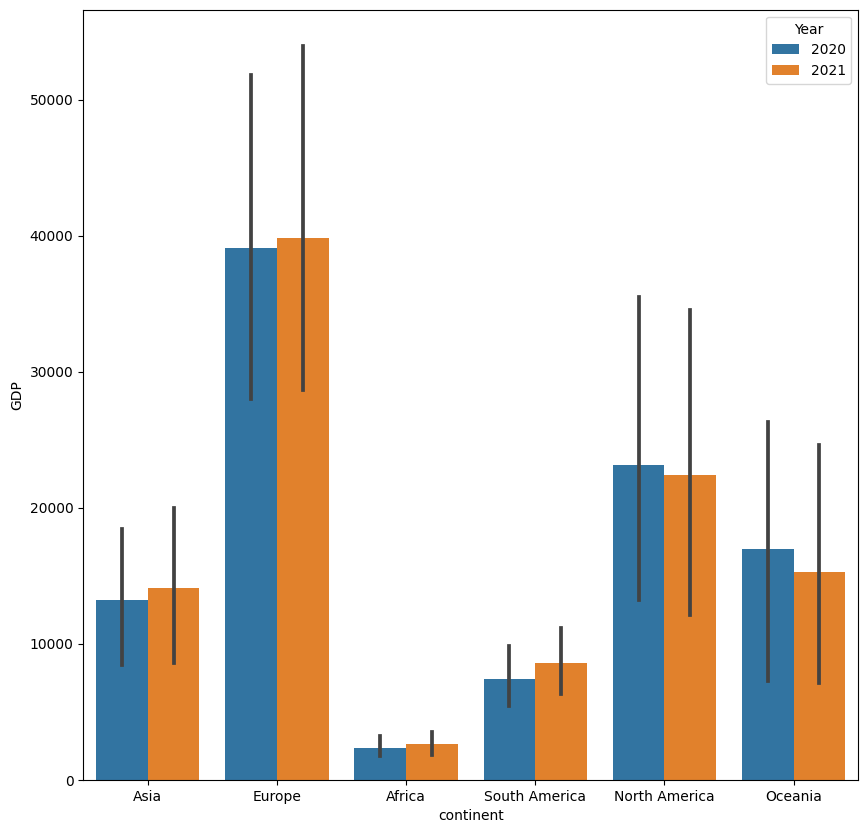

In [32]:
sns.barplot(data = df_grouped, x = 'continent', y= 'GDP' , hue='Year') # as seen in the graph below the country of africa has the lowesr gdp in 2020 and 2021 where Europe has the highest gdp in both years.In the year 2020 the GDP was lower than the GDP in 2021 because the corona cases got lower except North America and Oceania where the GDP in 2020 was higher.

# ezz yasser 206879

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import math
import requests
from bs4 import BeautifulSoup
from IPython.display import display

In [2]:
url = 'https://www.economicsobservatory.com/how-is-covid-19-affecting-international-travel-and-tourism'

tables = pd.read_html(url)

# select the first table from the list of scraped tables
table1 = tables[0]

# extract the data rows from the table (excluding the header row)
table = table1.iloc[1:]

table.columns = ['Region', '2020 Demand vs 2019', '2020 Capacity vs 2019', '2020 Profits', '2021 Demand vs 2020 (vs 2019)', '2021 Capacity vs 2020 (vs 2019)', '2021 Profits']

table.set_index('Region', inplace=True)

print(table)

#this code to extract find the first table and extract data from it.


              2020 Demand vs 2019 2020 Capacity vs 2019     2020 Profits  \
Region                                                                     
World                      -66.3%                -57.6%  -$118.5 billion   
North America              -66.0%                -51.6%   -$45.8 billion   
Europe                     -70.0%                -62.4%   -$26.9 billion   
Asia Pacific               -62.0%                -55.1%   -$31.7 billion   
Middle East                -73.0%                -64.5%    -$7.1 billion   
Latin America              -64.0%                -60.0%    -$5.0 billion   
Africa                     -72.0%                -62.8%    -$2.0 billion   

              2021 Demand vs 2020 (vs 2019) 2021 Capacity vs 2020 (vs 2019)  \
Region                                                                        
World                          50.4% (-50%)                    35.5% (-43%)   
North America                  60.5% (-45%)                    36.4% (-34%)   

In [3]:
from IPython.display import display
display(table)

#this code to show data in datafram.

,2020 Demand vs 2019,2020 Capacity vs 2019,2020 Profits,2021 Demand vs 2020 (vs 2019),2021 Capacity vs 2020 (vs 2019),2021 Profits
Region,,,,,,
World,-66.3%,-57.6%,-$118.5 billion,50.4% (-50%),35.5% (-43%),-$38.7 billion
North America,-66.0%,-51.6%,-$45.8 billion,60.5% (-45%),36.4% (-34%),-$11 billion
Europe,-70.0%,-62.4%,-$26.9 billion,47.5% (-56%),35.5% (-49%),-$11.9 billion
Asia Pacific,-62.0%,-55.1%,-$31.7 billion,50.0% (-43%),38.4% (-38%),-$7.5 billion
Middle East,-73.0%,-64.5%,-$7.1 billion,43.0% (-61%),23.6% (-56%),-$3.3 billion
Latin America,-64.0%,-60.0%,-$5.0 billion,39.0% (-50%),34.3% (-46%),-$3.3 billion
Africa,-72.0%,-62.8%,-$2.0 billion,35.0% (-62%),21.5% (-55%),-$1.7 billion


In [4]:
table.to_excel('international_travel_and_tourism1.xlsx')

#this code to extract the datafram and inserrt it in exel.


In [4]:

scraped_data = pd.read_csv('international_travel_and_tourism1.csv')
owid_data = pd.read_csv('newowid.csv')
#import 2 exel sheets to nootbook.

In [5]:
 display(scraped_data)
#display scraped data dataframe.

,Region,2020 Demand vs 2019,2020 Capacity vs 2019,2020 Profits,2021 Demand vs 2020 (vs 2019),2021 Capacity vs 2020 (vs 2019),2021 Profits
0,World,-66.3%,-57.6%,-$118.5 billion,50.4% (-50%),35.5% (-43%),-$38.7 billion
1,North America,-66.0%,-51.6%,-$45.8 billion,60.5% (-45%),36.4% (-34%),-$11 billion
2,Europe,-70.0%,-62.4%,-$26.9 billion,47.5% (-56%),35.5% (-49%),-$11.9 billion
3,Asia Pacific,-62.0%,-55.1%,-$31.7 billion,50.0% (-43%),38.4% (-38%),-$7.5 billion
4,Middle East,-73.0%,-64.5%,-$7.1 billion,43.0% (-61%),23.6% (-56%),-$3.3 billion
5,Latin America,-64.0%,-60.0%,-$5.0 billion,39.0% (-50%),34.3% (-46%),-$3.3 billion
6,Africa,-72.0%,-62.8%,-$2.0 billion,35.0% (-62%),21.5% (-55%),-$1.7 billion


In [6]:
 display(owid_data)
#display owid data datafram.

,Unnamed: 0,iso_code,continent,location,date,total_cases,new_cases,total_deaths,new_deaths,positive_rate,...,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,month,smoker_male_number,smoker_female_number,total_smokers_death,normal_deaths,deathratio
0,0,AFG,Asia,Afghanistan,2/24/2020,5,5,0,0,0.0,...,597.029,9.59,0.0,0.0,2,0.000,0.000,0.000,0.000,0.000000
1,1,AFG,Asia,Afghanistan,2/25/2020,5,0,0,0,0.0,...,597.029,9.59,0.0,0.0,2,0.000,0.000,0.000,0.000,0.000000
2,2,AFG,Asia,Afghanistan,2/26/2020,5,0,0,0,0.0,...,597.029,9.59,0.0,0.0,2,0.000,0.000,0.000,0.000,0.000000
3,3,AFG,Asia,Afghanistan,2/27/2020,5,0,0,0,0.0,...,597.029,9.59,0.0,0.0,2,0.000,0.000,0.000,0.000,0.000000
4,4,AFG,Asia,Afghanistan,2/28/2020,5,0,0,0,0.0,...,597.029,9.59,0.0,0.0,2,0.000,0.000,0.000,0.000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
245939,245939,ZWE,Africa,Zimbabwe,2/23/2023,263921,0,5663,0,0.0,...,307.846,1.82,1.6,30.7,2,1738.541,90.608,1829.149,3833.851,2.095975
245940,245940,ZWE,Africa,Zimbabwe,2/24/2023,263921,0,5663,0,0.0,...,307.846,1.82,1.6,30.7,2,1738.541,90.608,1829.149,3833.851,2.095975
245941,245941,ZWE,Africa,Zimbabwe,2/25/2023,263921,0,5663,0,0.0,...,307.846,1.82,1.6,30.7,2,1738.541,90.608,1829.149,3833.851,2.095975
245942,245942,ZWE,Africa,Zimbabwe,2/26/2023,263921,0,5663,0,0.0,...,307.846,1.82,1.6,30.7,2,1738.541,90.608,1829.149,3833.851,2.095975


In [7]:

scraped_data.loc[scraped_data['Region'].str.contains('Asia Pacific'), 'Region'] = 'Asia'
#rename Region that called Asia Pacific to Asia.

In [8]:
scraped_data.loc[scraped_data['Region'].str.contains('Latin America'), 'Region'] = 'South America'
#rename Region that called Latin America to South America.

In [9]:
display(scraped_data)


,Region,2020 Demand vs 2019,2020 Capacity vs 2019,2020 Profits,2021 Demand vs 2020 (vs 2019),2021 Capacity vs 2020 (vs 2019),2021 Profits
0,World,-66.3%,-57.6%,-$118.5 billion,50.4% (-50%),35.5% (-43%),-$38.7 billion
1,North America,-66.0%,-51.6%,-$45.8 billion,60.5% (-45%),36.4% (-34%),-$11 billion
2,Europe,-70.0%,-62.4%,-$26.9 billion,47.5% (-56%),35.5% (-49%),-$11.9 billion
3,Asia,-62.0%,-55.1%,-$31.7 billion,50.0% (-43%),38.4% (-38%),-$7.5 billion
4,Middle East,-73.0%,-64.5%,-$7.1 billion,43.0% (-61%),23.6% (-56%),-$3.3 billion
5,South America,-64.0%,-60.0%,-$5.0 billion,39.0% (-50%),34.3% (-46%),-$3.3 billion
6,Africa,-72.0%,-62.8%,-$2.0 billion,35.0% (-62%),21.5% (-55%),-$1.7 billion


In [10]:
scraped_data = scraped_data[scraped_data['Region'] != 'World']
#remove the row that has world in region.

In [11]:
display(scraped_data)

,Region,2020 Demand vs 2019,2020 Capacity vs 2019,2020 Profits,2021 Demand vs 2020 (vs 2019),2021 Capacity vs 2020 (vs 2019),2021 Profits
1,North America,-66.0%,-51.6%,-$45.8 billion,60.5% (-45%),36.4% (-34%),-$11 billion
2,Europe,-70.0%,-62.4%,-$26.9 billion,47.5% (-56%),35.5% (-49%),-$11.9 billion
3,Asia,-62.0%,-55.1%,-$31.7 billion,50.0% (-43%),38.4% (-38%),-$7.5 billion
4,Middle East,-73.0%,-64.5%,-$7.1 billion,43.0% (-61%),23.6% (-56%),-$3.3 billion
5,South America,-64.0%,-60.0%,-$5.0 billion,39.0% (-50%),34.3% (-46%),-$3.3 billion
6,Africa,-72.0%,-62.8%,-$2.0 billion,35.0% (-62%),21.5% (-55%),-$1.7 billion


In [12]:
scraped_data = scraped_data.rename(columns={'Region': 'continent'})
#change cloumn name from region to continent.

In [14]:
scraped_data.to_excel('international_travel_and_tourism(v2).xlsx', index=False)
#extract scraped data datafram to exel after modifed.

In [13]:
scraped_data2 = pd.read_csv('international_travel_and_tourism(v2).csv')

In [14]:
display(scraped_data2)

,continent,2020 Demand vs 2019,2020 Capacity vs 2019,2020 Profits,2021 Demand vs 2020 (vs 2019),2021 Capacity vs 2020 (vs 2019),2021 Profits
0,North America,-66.0%,-51.6%,-$45.8 billion,60.5% (-45%),36.4% (-34%),-$11 billion
1,Europe,-70.0%,-62.4%,-$26.9 billion,47.5% (-56%),35.5% (-49%),-$11.9 billion
2,Asia,-62.0%,-55.1%,-$31.7 billion,50.0% (-43%),38.4% (-38%),-$7.5 billion
3,Middle East,-73.0%,-64.5%,-$7.1 billion,43.0% (-61%),23.6% (-56%),-$3.3 billion
4,South America,-64.0%,-60.0%,-$5.0 billion,39.0% (-50%),34.3% (-46%),-$3.3 billion
5,Africa,-72.0%,-62.8%,-$2.0 billion,35.0% (-62%),21.5% (-55%),-$1.7 billion


In [15]:

merged_data = pd.merge(scraped_data2, owid_data, on=['continent'])
#create new datafram called mearged data and this is contain scraped data2 datafram 
#and owid data datafram together mearged by continent. 


In [16]:
display(merged_data)

,continent,2020 Demand vs 2019,2020 Capacity vs 2019,2020 Profits,2021 Demand vs 2020 (vs 2019),2021 Capacity vs 2020 (vs 2019),2021 Profits,Unnamed: 0,iso_code,location,...,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,month,smoker_male_number,smoker_female_number,total_smokers_death,normal_deaths,deathratio
0,North America,-66.0%,-51.6%,-$45.8 billion,60.5% (-45%),36.4% (-34%),-$11 billion,5466,AIA,Anguilla,...,0.000,0.00,0.0,0.0,3,0.000,0.000,0.000,0.000,0.000000
1,North America,-66.0%,-51.6%,-$45.8 billion,60.5% (-45%),36.4% (-34%),-$11 billion,5467,AIA,Anguilla,...,0.000,0.00,0.0,0.0,3,0.000,0.000,0.000,0.000,0.000000
2,North America,-66.0%,-51.6%,-$45.8 billion,60.5% (-45%),36.4% (-34%),-$11 billion,5468,AIA,Anguilla,...,0.000,0.00,0.0,0.0,3,0.000,0.000,0.000,0.000,0.000000
3,North America,-66.0%,-51.6%,-$45.8 billion,60.5% (-45%),36.4% (-34%),-$11 billion,5469,AIA,Anguilla,...,0.000,0.00,0.0,0.0,3,0.000,0.000,0.000,0.000,0.000000
4,North America,-66.0%,-51.6%,-$45.8 billion,60.5% (-45%),36.4% (-34%),-$11 billion,5470,AIA,Anguilla,...,0.000,0.00,0.0,0.0,4,0.000,0.000,0.000,0.000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
227364,Africa,-72.0%,-62.8%,-$2.0 billion,35.0% (-62%),21.5% (-55%),-$1.7 billion,245939,ZWE,Zimbabwe,...,307.846,1.82,1.6,30.7,2,1738.541,90.608,1829.149,3833.851,2.095975
227365,Africa,-72.0%,-62.8%,-$2.0 billion,35.0% (-62%),21.5% (-55%),-$1.7 billion,245940,ZWE,Zimbabwe,...,307.846,1.82,1.6,30.7,2,1738.541,90.608,1829.149,3833.851,2.095975
227366,Africa,-72.0%,-62.8%,-$2.0 billion,35.0% (-62%),21.5% (-55%),-$1.7 billion,245941,ZWE,Zimbabwe,...,307.846,1.82,1.6,30.7,2,1738.541,90.608,1829.149,3833.851,2.095975
227367,Africa,-72.0%,-62.8%,-$2.0 billion,35.0% (-62%),21.5% (-55%),-$1.7 billion,245942,ZWE,Zimbabwe,...,307.846,1.82,1.6,30.7,2,1738.541,90.608,1829.149,3833.851,2.095975


In [17]:

merged_data['year'] = pd.DatetimeIndex(merged_data['date']).year
#extract year from date..

In [18]:
display(merged_data)

,continent,2020 Demand vs 2019,2020 Capacity vs 2019,2020 Profits,2021 Demand vs 2020 (vs 2019),2021 Capacity vs 2020 (vs 2019),2021 Profits,Unnamed: 0,iso_code,location,...,diabetes_prevalence,female_smokers,male_smokers,month,smoker_male_number,smoker_female_number,total_smokers_death,normal_deaths,deathratio,year
0,North America,-66.0%,-51.6%,-$45.8 billion,60.5% (-45%),36.4% (-34%),-$11 billion,5466,AIA,Anguilla,...,0.00,0.0,0.0,3,0.000,0.000,0.000,0.000,0.000000,2020
1,North America,-66.0%,-51.6%,-$45.8 billion,60.5% (-45%),36.4% (-34%),-$11 billion,5467,AIA,Anguilla,...,0.00,0.0,0.0,3,0.000,0.000,0.000,0.000,0.000000,2020
2,North America,-66.0%,-51.6%,-$45.8 billion,60.5% (-45%),36.4% (-34%),-$11 billion,5468,AIA,Anguilla,...,0.00,0.0,0.0,3,0.000,0.000,0.000,0.000,0.000000,2020
3,North America,-66.0%,-51.6%,-$45.8 billion,60.5% (-45%),36.4% (-34%),-$11 billion,5469,AIA,Anguilla,...,0.00,0.0,0.0,3,0.000,0.000,0.000,0.000,0.000000,2020
4,North America,-66.0%,-51.6%,-$45.8 billion,60.5% (-45%),36.4% (-34%),-$11 billion,5470,AIA,Anguilla,...,0.00,0.0,0.0,4,0.000,0.000,0.000,0.000,0.000000,2020
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
227364,Africa,-72.0%,-62.8%,-$2.0 billion,35.0% (-62%),21.5% (-55%),-$1.7 billion,245939,ZWE,Zimbabwe,...,1.82,1.6,30.7,2,1738.541,90.608,1829.149,3833.851,2.095975,2023
227365,Africa,-72.0%,-62.8%,-$2.0 billion,35.0% (-62%),21.5% (-55%),-$1.7 billion,245940,ZWE,Zimbabwe,...,1.82,1.6,30.7,2,1738.541,90.608,1829.149,3833.851,2.095975,2023
227366,Africa,-72.0%,-62.8%,-$2.0 billion,35.0% (-62%),21.5% (-55%),-$1.7 billion,245941,ZWE,Zimbabwe,...,1.82,1.6,30.7,2,1738.541,90.608,1829.149,3833.851,2.095975,2023
227367,Africa,-72.0%,-62.8%,-$2.0 billion,35.0% (-62%),21.5% (-55%),-$1.7 billion,245942,ZWE,Zimbabwe,...,1.82,1.6,30.7,2,1738.541,90.608,1829.149,3833.851,2.095975,2023


In [19]:
merged_data.loc[pd.DatetimeIndex(merged_data['date']).year != 2020, ['2020 Demand vs 2019', '2020 Capacity vs 2019', '2020 Profits']] = None
#clean the data

In [20]:
display(merged_data)

,continent,2020 Demand vs 2019,2020 Capacity vs 2019,2020 Profits,2021 Demand vs 2020 (vs 2019),2021 Capacity vs 2020 (vs 2019),2021 Profits,Unnamed: 0,iso_code,location,...,diabetes_prevalence,female_smokers,male_smokers,month,smoker_male_number,smoker_female_number,total_smokers_death,normal_deaths,deathratio,year
0,North America,-66.0%,-51.6%,-$45.8 billion,60.5% (-45%),36.4% (-34%),-$11 billion,5466,AIA,Anguilla,...,0.00,0.0,0.0,3,0.000,0.000,0.000,0.000,0.000000,2020
1,North America,-66.0%,-51.6%,-$45.8 billion,60.5% (-45%),36.4% (-34%),-$11 billion,5467,AIA,Anguilla,...,0.00,0.0,0.0,3,0.000,0.000,0.000,0.000,0.000000,2020
2,North America,-66.0%,-51.6%,-$45.8 billion,60.5% (-45%),36.4% (-34%),-$11 billion,5468,AIA,Anguilla,...,0.00,0.0,0.0,3,0.000,0.000,0.000,0.000,0.000000,2020
3,North America,-66.0%,-51.6%,-$45.8 billion,60.5% (-45%),36.4% (-34%),-$11 billion,5469,AIA,Anguilla,...,0.00,0.0,0.0,3,0.000,0.000,0.000,0.000,0.000000,2020
4,North America,-66.0%,-51.6%,-$45.8 billion,60.5% (-45%),36.4% (-34%),-$11 billion,5470,AIA,Anguilla,...,0.00,0.0,0.0,4,0.000,0.000,0.000,0.000,0.000000,2020
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
227364,Africa,None,None,None,35.0% (-62%),21.5% (-55%),-$1.7 billion,245939,ZWE,Zimbabwe,...,1.82,1.6,30.7,2,1738.541,90.608,1829.149,3833.851,2.095975,2023
227365,Africa,None,None,None,35.0% (-62%),21.5% (-55%),-$1.7 billion,245940,ZWE,Zimbabwe,...,1.82,1.6,30.7,2,1738.541,90.608,1829.149,3833.851,2.095975,2023
227366,Africa,None,None,None,35.0% (-62%),21.5% (-55%),-$1.7 billion,245941,ZWE,Zimbabwe,...,1.82,1.6,30.7,2,1738.541,90.608,1829.149,3833.851,2.095975,2023
227367,Africa,None,None,None,35.0% (-62%),21.5% (-55%),-$1.7 billion,245942,ZWE,Zimbabwe,...,1.82,1.6,30.7,2,1738.541,90.608,1829.149,3833.851,2.095975,2023


In [21]:
merged_data.loc[pd.DatetimeIndex(merged_data['date']).year != 2021, ['2021 Demand vs 2020 (vs 2019)', '2021 Capacity vs 2020 (vs 2019)', '2021 Profits']] = None
#clean the data

In [22]:
display(merged_data)

,continent,2020 Demand vs 2019,2020 Capacity vs 2019,2020 Profits,2021 Demand vs 2020 (vs 2019),2021 Capacity vs 2020 (vs 2019),2021 Profits,Unnamed: 0,iso_code,location,...,diabetes_prevalence,female_smokers,male_smokers,month,smoker_male_number,smoker_female_number,total_smokers_death,normal_deaths,deathratio,year
0,North America,-66.0%,-51.6%,-$45.8 billion,None,None,None,5466,AIA,Anguilla,...,0.00,0.0,0.0,3,0.000,0.000,0.000,0.000,0.000000,2020
1,North America,-66.0%,-51.6%,-$45.8 billion,None,None,None,5467,AIA,Anguilla,...,0.00,0.0,0.0,3,0.000,0.000,0.000,0.000,0.000000,2020
2,North America,-66.0%,-51.6%,-$45.8 billion,None,None,None,5468,AIA,Anguilla,...,0.00,0.0,0.0,3,0.000,0.000,0.000,0.000,0.000000,2020
3,North America,-66.0%,-51.6%,-$45.8 billion,None,None,None,5469,AIA,Anguilla,...,0.00,0.0,0.0,3,0.000,0.000,0.000,0.000,0.000000,2020
4,North America,-66.0%,-51.6%,-$45.8 billion,None,None,None,5470,AIA,Anguilla,...,0.00,0.0,0.0,4,0.000,0.000,0.000,0.000,0.000000,2020
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
227364,Africa,None,None,None,None,None,None,245939,ZWE,Zimbabwe,...,1.82,1.6,30.7,2,1738.541,90.608,1829.149,3833.851,2.095975,2023
227365,Africa,None,None,None,None,None,None,245940,ZWE,Zimbabwe,...,1.82,1.6,30.7,2,1738.541,90.608,1829.149,3833.851,2.095975,2023
227366,Africa,None,None,None,None,None,None,245941,ZWE,Zimbabwe,...,1.82,1.6,30.7,2,1738.541,90.608,1829.149,3833.851,2.095975,2023
227367,Africa,None,None,None,None,None,None,245942,ZWE,Zimbabwe,...,1.82,1.6,30.7,2,1738.541,90.608,1829.149,3833.851,2.095975,2023


In [23]:
merged_data = merged_data.rename(columns={'2020 Demand vs 2019': 'Travel And Tourism 2020 Demand vs 2019'})
merged_data = merged_data.rename(columns={'2020 Capacity vs 2019': 'Travel And Tourism 2020 Capacity vs 2019'})
merged_data = merged_data.rename(columns={'2020 Profits': 'Travel And Tourism 2020 Profits'})

merged_data = merged_data.rename(columns={'2021 Demand vs 2020 (vs 2019)': 'Travel And Tourism 2021 Demand vs 2019'})
merged_data = merged_data.rename(columns={'2021 Capacity vs 2020 (vs 2019)': 'Travel And Tourism 2021 Capacity vs 2019'})
merged_data = merged_data.rename(columns={'2021 Profits': 'Travel And Tourism 2021 Profits'})

#rename coloums

In [24]:
display(merged_data)

,continent,Travel And Tourism 2020 Demand vs 2019,Travel And Tourism 2020 Capacity vs 2019,Travel And Tourism 2020 Profits,Travel And Tourism 2021 Demand vs 2019,Travel And Tourism 2021 Capacity vs 2019,Travel And Tourism 2021 Profits,Unnamed: 0,iso_code,location,...,diabetes_prevalence,female_smokers,male_smokers,month,smoker_male_number,smoker_female_number,total_smokers_death,normal_deaths,deathratio,year
0,North America,-66.0%,-51.6%,-$45.8 billion,None,None,None,5466,AIA,Anguilla,...,0.00,0.0,0.0,3,0.000,0.000,0.000,0.000,0.000000,2020
1,North America,-66.0%,-51.6%,-$45.8 billion,None,None,None,5467,AIA,Anguilla,...,0.00,0.0,0.0,3,0.000,0.000,0.000,0.000,0.000000,2020
2,North America,-66.0%,-51.6%,-$45.8 billion,None,None,None,5468,AIA,Anguilla,...,0.00,0.0,0.0,3,0.000,0.000,0.000,0.000,0.000000,2020
3,North America,-66.0%,-51.6%,-$45.8 billion,None,None,None,5469,AIA,Anguilla,...,0.00,0.0,0.0,3,0.000,0.000,0.000,0.000,0.000000,2020
4,North America,-66.0%,-51.6%,-$45.8 billion,None,None,None,5470,AIA,Anguilla,...,0.00,0.0,0.0,4,0.000,0.000,0.000,0.000,0.000000,2020
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
227364,Africa,None,None,None,None,None,None,245939,ZWE,Zimbabwe,...,1.82,1.6,30.7,2,1738.541,90.608,1829.149,3833.851,2.095975,2023
227365,Africa,None,None,None,None,None,None,245940,ZWE,Zimbabwe,...,1.82,1.6,30.7,2,1738.541,90.608,1829.149,3833.851,2.095975,2023
227366,Africa,None,None,None,None,None,None,245941,ZWE,Zimbabwe,...,1.82,1.6,30.7,2,1738.541,90.608,1829.149,3833.851,2.095975,2023
227367,Africa,None,None,None,None,None,None,245942,ZWE,Zimbabwe,...,1.82,1.6,30.7,2,1738.541,90.608,1829.149,3833.851,2.095975,2023


In [ ]:
merged_data.to_excel('merged_data_ezz.xlsx', index=False)

In [2]:
merged_data = pd.read_csv('merged_data_ezz.csv')

In [3]:
merged_data = merged_data.drop('Unnamed: 0', axis=1)
#drop un wanted coloums.

In [4]:
display(merged_data)

,continent,Travel And Tourism 2020 Demand vs 2019,Travel And Tourism 2020 Capacity vs 2019,Travel And Tourism 2020 Profits,Travel And Tourism 2021 Demand vs 2019,Travel And Tourism 2021 Capacity vs 2019,Travel And Tourism 2021 Profits,iso_code,location,date,...,male_smokers,month,smoker_male_number,smoker_female_number,total_smokers_death,normal_deaths,deathratio,year,2021 Demand vs 2019,2021 Capacity vs 2019
0,North America,-66.0%,-51.6%,-$45.8 billion,NaN,NaN,NaN,AIA,Anguilla,3/28/2020,...,0.0,3,0.000,0.000,0.000,0.000,0.000000,2020,NaN,NaN
1,North America,-66.0%,-51.6%,-$45.8 billion,NaN,NaN,NaN,AIA,Anguilla,3/29/2020,...,0.0,3,0.000,0.000,0.000,0.000,0.000000,2020,NaN,NaN
2,North America,-66.0%,-51.6%,-$45.8 billion,NaN,NaN,NaN,AIA,Anguilla,3/30/2020,...,0.0,3,0.000,0.000,0.000,0.000,0.000000,2020,NaN,NaN
3,North America,-66.0%,-51.6%,-$45.8 billion,NaN,NaN,NaN,AIA,Anguilla,3/31/2020,...,0.0,3,0.000,0.000,0.000,0.000,0.000000,2020,NaN,NaN
4,North America,-66.0%,-51.6%,-$45.8 billion,NaN,NaN,NaN,AIA,Anguilla,4/1/2020,...,0.0,4,0.000,0.000,0.000,0.000,0.000000,2020,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
227364,Africa,NaN,NaN,NaN,NaN,NaN,NaN,ZWE,Zimbabwe,2/23/2023,...,30.7,2,1738.541,90.608,1829.149,3833.851,2.095975,2023,NaN,NaN
227365,Africa,NaN,NaN,NaN,NaN,NaN,NaN,ZWE,Zimbabwe,2/24/2023,...,30.7,2,1738.541,90.608,1829.149,3833.851,2.095975,2023,NaN,NaN
227366,Africa,NaN,NaN,NaN,NaN,NaN,NaN,ZWE,Zimbabwe,2/25/2023,...,30.7,2,1738.541,90.608,1829.149,3833.851,2.095975,2023,NaN,NaN
227367,Africa,NaN,NaN,NaN,NaN,NaN,NaN,ZWE,Zimbabwe,2/26/2023,...,30.7,2,1738.541,90.608,1829.149,3833.851,2.095975,2023,NaN,NaN


In [5]:

extract_num = lambda x: float(re.findall('\d+\.*\d*', x)[0]) if re.findall('\d+\.*\d*', x) else 0.0

merged_data['Travel And Tourism 2020 Profits'] = merged_data['Travel And Tourism 2020 Profits'].fillna('')

merged_data['Travel And Tourism 2020 Profits'] = merged_data['Travel And Tourism 2020 Profits'].astype(str)

merged_data['Travel And Tourism 2020 Capacity vs 2019'] = merged_data['Travel And Tourism 2020 Capacity vs 2019'].fillna('')

merged_data['Travel And Tourism 2020 Capacity vs 2019'] = merged_data['Travel And Tourism 2020 Capacity vs 2019'].astype(str)

merged_data['profit_2020_num'] = merged_data['Travel And Tourism 2020 Profits'].apply(extract_num)

merged_data['2020 Capacity vs 2019'] = merged_data['Travel And Tourism 2020 Capacity vs 2019'].apply(extract_num)

merged_data['Travel And Tourism 2019 Profits'] = (merged_data['profit_2020_num'] * 100) / merged_data['2020 Capacity vs 2019']


display(merged_data)

#q4-Calculate the profit of 2019 from travel and tourism


,continent,Travel And Tourism 2020 Demand vs 2019,Travel And Tourism 2020 Capacity vs 2019,Travel And Tourism 2020 Profits,Travel And Tourism 2021 Demand vs 2019,Travel And Tourism 2021 Capacity vs 2019,Travel And Tourism 2021 Profits,iso_code,location,date,...,smoker_female_number,total_smokers_death,normal_deaths,deathratio,year,2021 Demand vs 2019,2021 Capacity vs 2019,profit_2020_num,2020 Capacity vs 2019,Travel And Tourism 2019 Profits
0,North America,-66.0%,-51.6%,-$45.8 billion,NaN,NaN,NaN,AIA,Anguilla,3/28/2020,...,0.000,0.000,0.000,0.000000,2020,NaN,NaN,45.8,51.6,88.75969
1,North America,-66.0%,-51.6%,-$45.8 billion,NaN,NaN,NaN,AIA,Anguilla,3/29/2020,...,0.000,0.000,0.000,0.000000,2020,NaN,NaN,45.8,51.6,88.75969
2,North America,-66.0%,-51.6%,-$45.8 billion,NaN,NaN,NaN,AIA,Anguilla,3/30/2020,...,0.000,0.000,0.000,0.000000,2020,NaN,NaN,45.8,51.6,88.75969
3,North America,-66.0%,-51.6%,-$45.8 billion,NaN,NaN,NaN,AIA,Anguilla,3/31/2020,...,0.000,0.000,0.000,0.000000,2020,NaN,NaN,45.8,51.6,88.75969
4,North America,-66.0%,-51.6%,-$45.8 billion,NaN,NaN,NaN,AIA,Anguilla,4/1/2020,...,0.000,0.000,0.000,0.000000,2020,NaN,NaN,45.8,51.6,88.75969
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
227364,Africa,NaN,,,NaN,NaN,NaN,ZWE,Zimbabwe,2/23/2023,...,90.608,1829.149,3833.851,2.095975,2023,NaN,NaN,0.0,0.0,NaN
227365,Africa,NaN,,,NaN,NaN,NaN,ZWE,Zimbabwe,2/24/2023,...,90.608,1829.149,3833.851,2.095975,2023,NaN,NaN,0.0,0.0,NaN
227366,Africa,NaN,,,NaN,NaN,NaN,ZWE,Zimbabwe,2/25/2023,...,90.608,1829.149,3833.851,2.095975,2023,NaN,NaN,0.0,0.0,NaN
227367,Africa,NaN,,,NaN,NaN,NaN,ZWE,Zimbabwe,2/26/2023,...,90.608,1829.149,3833.851,2.095975,2023,NaN,NaN,0.0,0.0,NaN


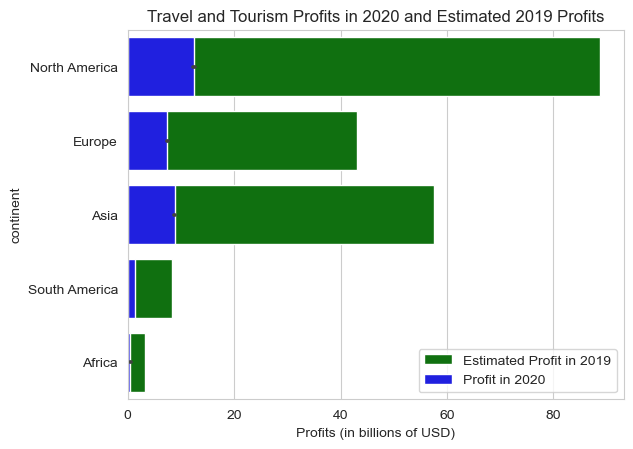

In [6]:
sns.set_style("whitegrid")

sns.barplot(data=merged_data, y='continent', x='Travel And Tourism 2019 Profits', color='green', label='Estimated Profit in 2019')

sns.barplot(data=merged_data, y='continent', x='profit_2020_num', color='blue', label='Profit in 2020')

plt.xlabel('Profits (in billions of USD)')

plt.title('Travel and Tourism Profits in 2020 and Estimated 2019 Profits')

plt.legend()

plt.show()
#show Q4 answer in chart with profit of 2020 to compare.





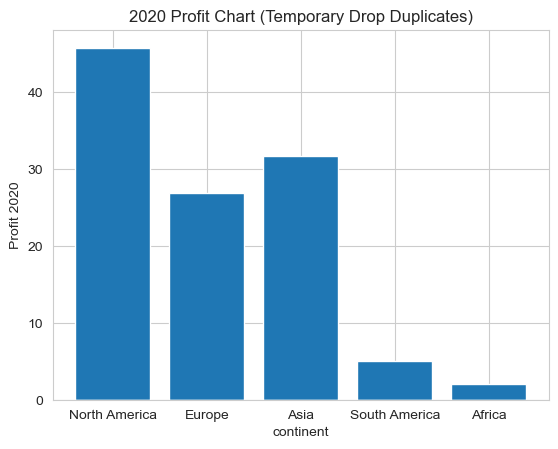

In [7]:

merged_data.drop_duplicates(subset=['profit_2020_num','continent'], inplace=True)

plt.bar(merged_data['continent'], merged_data['profit_2020_num'])

plt.xlabel('continent')

plt.ylabel('Profit 2020')

plt.title('2020 Profit Chart (Temporary Drop Duplicates)')

plt.show()
#show the content and which one has the lowest damge and which one has highest damge for 2020.  

In [8]:
merged_data['Travel And Tourism 2021 Profits'] = merged_data['Travel And Tourism 2021 Profits'].fillna('')

merged_data['Travel And Tourism 2021 Profits'] = merged_data['Travel And Tourism 2021 Profits'].astype(str)

merged_data['profit_2021_num'] = merged_data['Travel And Tourism 2021 Profits'].apply(extract_num)

#extract num from string 


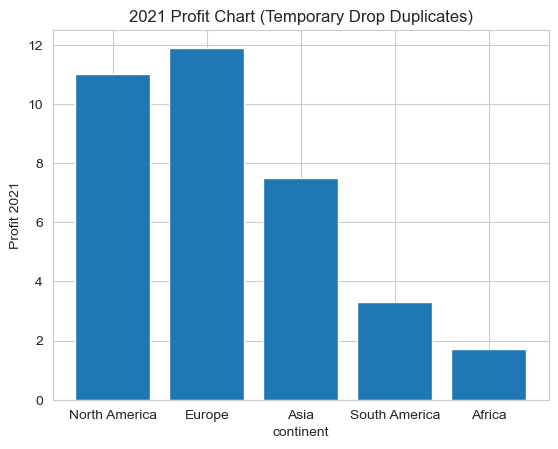

In [9]:

merged_data.drop_duplicates(subset=['profit_2021_num','continent'], inplace=True)

plt.bar(merged_data['continent'], merged_data['profit_2021_num'])

plt.xlabel('continent')

plt.ylabel('Profit 2021')

plt.title('2021 Profit Chart (Temporary Drop Duplicates)')

plt.show()

#show the content and which one has the lowest damge and which one has highest damge for 2021.  

In [10]:

format_profit = lambda x: f'${int(x)} billion' if not math.isnan(x) else ''

merged_data['Travel And Tourism 2019 Profits'] = merged_data['Travel And Tourism 2019 Profits'].apply(format_profit)



merged_data['profit_2020_num'] = merged_data['profit_2020_num'].apply(format_profit)
merged_data['profit_2021_num'] = merged_data['profit_2021_num'].apply(format_profit)

#return it to its shape by adding dollar sign and billion word at the end.


In [11]:

display(merged_data)

,continent,Travel And Tourism 2020 Demand vs 2019,Travel And Tourism 2020 Capacity vs 2019,Travel And Tourism 2020 Profits,Travel And Tourism 2021 Demand vs 2019,Travel And Tourism 2021 Capacity vs 2019,Travel And Tourism 2021 Profits,iso_code,location,date,...,total_smokers_death,normal_deaths,deathratio,year,2021 Demand vs 2019,2021 Capacity vs 2019,profit_2020_num,2020 Capacity vs 2019,Travel And Tourism 2019 Profits,profit_2021_num
0,North America,-66.0%,-51.6%,-$45.8 billion,NaN,NaN,,AIA,Anguilla,3/28/2020,...,0.000,0.000,0.000000,2020,NaN,NaN,$45 billion,51.6,$88 billion,$0 billion
279,North America,NaN,,,60.5% (-45%),36.4% (-34%),-$11 billion,AIA,Anguilla,1/1/2021,...,0.000,0.000,0.000000,2021,NaN,NaN,$0 billion,0.0,,$11 billion
39145,Europe,-70.0%,-62.4%,-$26.9 billion,NaN,NaN,,ALB,Albania,2/25/2020,...,0.000,0.000,0.000000,2020,NaN,NaN,$26 billion,62.4,$43 billion,$0 billion
39456,Europe,NaN,,,47.5% (-56%),35.5% (-49%),-$11.9 billion,ALB,Albania,1/1/2021,...,688.523,492.477,0.715266,2021,NaN,NaN,$0 billion,0.0,,$11 billion
98740,Asia,-62.0%,-55.1%,-$31.7 billion,NaN,NaN,,AFG,Afghanistan,2/24/2020,...,0.000,0.000,0.000000,2020,NaN,NaN,$31 billion,55.1,$57 billion,$0 billion
99052,Asia,NaN,,,50.0% (-43%),38.4% (-38%),-$7.5 billion,AFG,Afghanistan,1/1/2021,...,0.000,2201.000,inf,2021,NaN,NaN,$0 billion,0.0,,$7 billion
154022,South America,-64.0%,-60.0%,-$5.0 billion,NaN,NaN,,ARG,Argentina,1/1/2020,...,0.000,0.000,0.000000,2020,NaN,NaN,$5 billion,60.0,$8 billion,$0 billion
154388,South America,NaN,,,39.0% (-50%),34.3% (-46%),-$3.3 billion,ARG,Argentina,1/1/2021,...,19017.041,24301.959,1.277904,2021,NaN,NaN,$0 billion,0.0,,$3 billion
168206,Africa,-72.0%,-62.8%,-$2.0 billion,NaN,NaN,,DZA,Algeria,2/25/2020,...,0.000,0.000,0.000000,2020,NaN,NaN,$2 billion,62.8,$3 billion,$0 billion
168517,Africa,NaN,,,35.0% (-62%),21.5% (-55%),-$1.7 billion,DZA,Algeria,1/1/2021,...,858.982,1903.018,2.215434,2021,NaN,NaN,$0 billion,0.0,,$1 billion
